<div class="alert alert-block alert-info">
    <h2 align="center"style="color: black;">Machine Learning-based Algorithmic Trading</h2>
    <h3 align="center"style="color: black;">Data & Walk Forward Backtest Pipelines</h3>
    <h5 align="center"style="color: black;"><em>Alpha Hunters</em></h5>
</div>

# Kaggle services and tools

In [1]:
!pip install feature_engine
!pip install colorlog
!pip install betacal
!pip install venn_abers
!pip install cudf
!pip install arch
!pip install scikit-learn==1.5.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 91.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 92.7 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but y

In [2]:
!pip show xgboost

Name: xgboost
Version: 2.0.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, scipy
Required-by: TPOT


In [3]:
model_type = 'XGBF+' # ['XGB', 'CF-XGB', 'XGBF', 'CF-XGBF', 'XGBF+', 'CF-XGBF+', 'RF', 'CF-RF', 'LGBM', 'CF-LGBM']
symbols = [
    # "XAUUSD",
    # "US30",
    "US100",
    # "EURUSD",
    # "GBPUSD",
    # "USDJPY",
    # "BTCUSD"
]
fe_removal_list = [
    "fe_supertrend",
]
target_symbol = "US100"
MANUAL_EXP = True
use_cudf = True

In [4]:
if model_type == 'XGBF+':
    stacked_model = 'XGB' # 'XGB', 'XGBF', 'RF', 'LGBM'
else:
    stacked_model = ''

In [5]:
print(MANUAL_EXP)

True


# Weights & Biase

![ChessUrl](https://docs.wandb.ai/assets/images/wandb_demo_experiments-4797af7fe7236d6c5c42adbdc93deb4c.gif "chess")

Steps:
- Create a W&B account [wandb.ai](https://wandb.ai/)
- Read docs [W&B docs](https://docs.wandb.ai/)
- Install using pip:  `!pip install wandb`
- Get API token [link](https://wandb.ai/authorize)
- Create a secret or an env variable for the token

In [6]:
import wandb
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value = user_secrets.get_secret("wandb_token")
wandb.login(key=secret_value) 

api = wandb.Api()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: amirhosseinfarahani (alpha-hunters). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [7]:
!wandb login

wandb: Currently logged in as: amirhosseinfarahani (alpha-hunters). Use `wandb login --relogin` to force relogin


# Read functions from the GitHub repo

- GitHub account and repo
- Generate an access token on your GitHub account [Link](https://github.com/settings/tokens)
- Then make a secret or an environment variable to use it

In [8]:
import sys
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
token = user_secrets.get_secret("GITHUB_TOKEN")
branch_name = 'main' # ['main', 'm.mahdi', 'masoud']
!rm -r ./ML-Algotrading-Project &> /dev/null
!git clone -b {branch_name} https://{token}@github.com/AmirhsFar/ML-Algotrading-Project.git &> /dev/null
!pip install -r ./ML-Algotrading-Project/dataset/requirements.txt
sys.path.append("/kaggle/working/ML-Algotrading-Project")
print('All done')
# !tail -n 120 ./forex_MLOps/main_func.py
# !tail -n 120 ./forex_MLOps/select_columns.py

ERROR: Ignored the following versions that require a different python version: 9.0.0 Requires-Python >=3.11; 9.0.0b1 Requires-Python >=3.11; 9.0.0b2 Requires-Python >=3.11; 9.0.1 Requires-Python >=3.11; 9.0.2 Requires-Python >=3.11
ERROR: Could not find a version that satisfies the requirement MetaTrader5==5.0.4424 (from versions: none)
ERROR: No matching distribution found for MetaTrader5==5.0.4424
All done


In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from dataset.configs.feature_configs_general import generate_general_config
from dataset.dukascopy_func import (
    crawl_OHLCV_data_dukascopy
)
from dataset.history_data_stage_one_func import (
    history_data_stage_one
)
from dataset.realtime_candle_func import (
    historiy_realtime_candle
)
from dataset.window_agg_features_func_FREQ import (
    history_fe_WIN_features_FREQ
)
from dataset.indicator_func import history_indicator_calculator
from dataset.realtime_shift_func import history_cndl_shift
from dataset.create_basic_features_func import (
    history_basic_features,
    history_fe_market_close,
    history_fe_time
)
from dataset.window_agg_features_func import (
    history_fe_WIN_features
)
from dataset.columns_merge_func import history_columns_merge
# from dataset.data_crawlers.metatrader_func import (
#     crawl_OHLCV_data_metatrader,
# )
from main_func import main
# from forex_MLOps.utils.wandb_utils import read_obj
from ETL import read_data_manual, ETL
# from forex_MLOps.model_ensemble import QuantEnsemble
from utils.wandb_utils import fetch_artifacts, read_tracker_objects, download_wandb_artifact
########### READ DATA MANUALLY #########
# df_all = read_data_manual()
# !tail -n 120 ./forex_MLOps/ETL.py  

# 0. Data Fetching & Preprocessing

## Features' Config

In [10]:
config_general = generate_general_config(symbols)

## Dukascopy

In [11]:
# failed_dates_dict = await crawl_OHLCV_data_dukascopy(
#     feature_config = config_general 
# )

In [12]:
# import pandas as pd

# pd.set_option('display.max_columns', None)
# df = pd.read_parquet(
#     f"/kaggle/working/ML-Algotrading-Project/dataset/data/raw_data/dukascopy/EURUSD_dukascopy.parquet"
# )
# df.iloc[[1000, 1006, 11012]]

## Metatrader 5

Do this section in your system and place the `.parquet` file in *dataset\data\raw_data\metatrader*, then reclone the repository and proceed for the furthur steps.

## Creating Stage-One Data

In [13]:
# history_data_stage_one(config_general)

In [14]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/stage_one_data/{target_symbol}_stage_one.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 120000]]

,_time,_date,open,high,low,close,tick_volume,spread,was_ffilled
1,2017-04-06 00:05:00,2017-04-06,5408.3,5410.9,5408.3,5409.9,48.0,0.0,False
5,2017-04-06 00:25:00,2017-04-06,5409.8,5410.0,5409.0,5410.0,18.0,0.0,False
1000,2017-04-11 14:20:00,2017-04-11,5414.5,5414.9,5412.9,5413.3,79.0,0.0,False
2006,2017-04-18 06:10:00,2017-04-18,5396.8,5396.8,5396.3,5396.3,8.0,0.0,False
11012,2017-06-01 20:40:00,2017-06-01,5803.3,5804.6,5802.5,5803.1,176.0,100.0,False
120000,2018-12-11 18:00:00,2018-12-11,6744.5,6744.5,6718.2,6720.4,1037.0,100.0,False


In [15]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/stage_one_data/{symbols[1]}_stage_one.parquet"
    )

df.iloc[[1, 5, 1000, 2006, 11012, 120000]]

,_time,_date,open,high,low,close,tick_volume,spread,was_ffilled
1,2017-04-06 00:05:00,2017-04-06,5408.3,5410.9,5408.3,5409.9,48.0,0.0,False
5,2017-04-06 00:25:00,2017-04-06,5409.8,5410.0,5409.0,5410.0,18.0,0.0,False
1000,2017-04-11 14:20:00,2017-04-11,5414.5,5414.9,5412.9,5413.3,79.0,0.0,False
2006,2017-04-18 06:10:00,2017-04-18,5396.8,5396.8,5396.3,5396.3,8.0,0.0,False
11012,2017-06-01 20:40:00,2017-06-01,5803.3,5804.6,5802.5,5803.1,176.0,100.0,False
120000,2018-12-11 18:00:00,2018-12-11,6744.5,6744.5,6718.2,6720.4,1037.0,100.0,False


In [16]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/stage_one_data/{symbols[2]}_stage_one.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 120000]]

,_time,_date,open,high,low,close,tick_volume,spread,was_ffilled
1,2017-04-06 00:05:00,2017-04-06,5408.3,5410.9,5408.3,5409.9,48.0,0.0,False
5,2017-04-06 00:25:00,2017-04-06,5409.8,5410.0,5409.0,5410.0,18.0,0.0,False
1000,2017-04-11 14:20:00,2017-04-11,5414.5,5414.9,5412.9,5413.3,79.0,0.0,False
2006,2017-04-18 06:10:00,2017-04-18,5396.8,5396.8,5396.3,5396.3,8.0,0.0,False
11012,2017-06-01 20:40:00,2017-06-01,5803.3,5804.6,5802.5,5803.1,176.0,100.0,False
120000,2018-12-11 18:00:00,2018-12-11,6744.5,6744.5,6718.2,6720.4,1037.0,100.0,False


In [17]:
df.tail(10)

,_time,_date,open,high,low,close,tick_volume,spread,was_ffilled
569929,2025-04-04 22:05:00,2025-04-04,17305.80,17379.40,17305.80,17354.60,2129.0,90.0,False
569930,2025-04-04 22:10:00,2025-04-04,17354.60,17366.15,17303.00,17355.55,2170.0,90.0,False
569931,2025-04-04 22:15:00,2025-04-04,17354.55,17355.40,17304.00,17313.45,1921.0,90.0,False
569932,2025-04-04 22:20:00,2025-04-04,17313.45,17327.15,17241.55,17257.50,2055.0,90.0,False
569933,2025-04-04 22:25:00,2025-04-04,17256.95,17260.10,17220.15,17251.70,2009.0,90.0,False
569934,2025-04-04 22:30:00,2025-04-04,17251.75,17290.15,17245.20,17288.40,1852.0,90.0,False
569935,2025-04-04 22:35:00,2025-04-04,17288.40,17331.60,17284.85,17316.45,1904.0,90.0,False
569936,2025-04-04 22:40:00,2025-04-04,17316.65,17348.15,17307.90,17348.05,1636.0,90.0,False
569937,2025-04-04 22:45:00,2025-04-04,17348.05,17361.05,17325.70,17329.70,1657.0,90.0,False
569938,2025-04-04 22:50:00,2025-04-04,17330.15,17339.50,17323.05,17331.50,1320.0,90.0,False


## Creating Real-Time Candles

In [18]:
historiy_realtime_candle(config_general)

  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> start historiy_realtime_candle fumc:
  [test run][INFO]:= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
  [test run][INFO]:symbol: US100
  [test run][INFO]:--> US100 saved.
  [test run][INFO]:--> historiy_realtime_candle run successfully.


In [19]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/realtime_candle/{target_symbol}_realtime_candle.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,index,M5_OPEN,M5_CLOSE,M5_LOW,M5_HIGH,M5_VOLUME,_date,minutesPassed,isFirst,...,M720_HIGH,M720_LOW,M720_CLOSE,M720_VOLUME,M1380_OPEN,M1380_HIGH,M1380_LOW,M1380_CLOSE,M1380_VOLUME,symbol
1,2017-04-06 00:05:00,1,5408.3,5409.9,5408.3,5410.9,48.0,2017-04-06,5,0,...,5412.8,5408.3,5409.9,126.0,5412.3,5412.8,5408.3,5409.9,126.0,US100
5,2017-04-06 00:25:00,5,5409.8,5410.0,5409.0,5410.0,18.0,2017-04-06,25,0,...,5412.8,5408.3,5410.0,262.0,5412.3,5412.8,5408.3,5410.0,262.0,US100
1000,2017-04-11 14:20:00,1000,5414.5,5413.3,5412.9,5414.9,79.0,2017-04-11,860,0,...,5421.9,5412.9,5413.3,1701.0,5424.1,5426.6,5408.8,5413.3,12870.0,US100
2006,2017-04-18 06:10:00,2006,5396.8,5396.3,5396.3,5396.8,8.0,2017-04-18,370,0,...,5402.0,5392.3,5396.3,3322.0,5395.8,5402.0,5392.3,5396.3,3322.0,US100
11012,2017-06-01 20:40:00,11012,5803.3,5803.1,5802.5,5804.6,176.0,2017-06-01,1240,0,...,5809.9,5777.6,5803.1,22946.0,5800.8,5809.9,5777.6,5803.1,29837.0,US100
20000,2017-07-18 10:40:00,20000,5855.1,5854.6,5854.1,5856.0,188.0,2017-07-18,640,0,...,5858.0,5843.3,5854.6,11675.0,5855.4,5858.0,5843.3,5854.6,11675.0,US100


In [20]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/realtime_candle/{symbols[1]}_realtime_candle.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,index,M5_OPEN,M5_CLOSE,M5_LOW,M5_HIGH,M5_VOLUME,_date,minutesPassed,isFirst,...,M720_HIGH,M720_LOW,M720_CLOSE,M720_VOLUME,M1380_OPEN,M1380_HIGH,M1380_LOW,M1380_CLOSE,M1380_VOLUME,symbol
1,2017-04-06 00:05:00,1,5408.3,5409.9,5408.3,5410.9,48.0,2017-04-06,5,0,...,5412.8,5408.3,5409.9,126.0,5412.3,5412.8,5408.3,5409.9,126.0,US100
5,2017-04-06 00:25:00,5,5409.8,5410.0,5409.0,5410.0,18.0,2017-04-06,25,0,...,5412.8,5408.3,5410.0,262.0,5412.3,5412.8,5408.3,5410.0,262.0,US100
1000,2017-04-11 14:20:00,1000,5414.5,5413.3,5412.9,5414.9,79.0,2017-04-11,860,0,...,5421.9,5412.9,5413.3,1701.0,5424.1,5426.6,5408.8,5413.3,12870.0,US100
2006,2017-04-18 06:10:00,2006,5396.8,5396.3,5396.3,5396.8,8.0,2017-04-18,370,0,...,5402.0,5392.3,5396.3,3322.0,5395.8,5402.0,5392.3,5396.3,3322.0,US100
11012,2017-06-01 20:40:00,11012,5803.3,5803.1,5802.5,5804.6,176.0,2017-06-01,1240,0,...,5809.9,5777.6,5803.1,22946.0,5800.8,5809.9,5777.6,5803.1,29837.0,US100
20000,2017-07-18 10:40:00,20000,5855.1,5854.6,5854.1,5856.0,188.0,2017-07-18,640,0,...,5858.0,5843.3,5854.6,11675.0,5855.4,5858.0,5843.3,5854.6,11675.0,US100


In [21]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/realtime_candle/{symbols[2]}_realtime_candle.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,index,M5_OPEN,M5_CLOSE,M5_LOW,M5_HIGH,M5_VOLUME,_date,minutesPassed,isFirst,...,M720_HIGH,M720_LOW,M720_CLOSE,M720_VOLUME,M1380_OPEN,M1380_HIGH,M1380_LOW,M1380_CLOSE,M1380_VOLUME,symbol
1,2017-04-06 00:05:00,1,5408.3,5409.9,5408.3,5410.9,48.0,2017-04-06,5,0,...,5412.8,5408.3,5409.9,126.0,5412.3,5412.8,5408.3,5409.9,126.0,US100
5,2017-04-06 00:25:00,5,5409.8,5410.0,5409.0,5410.0,18.0,2017-04-06,25,0,...,5412.8,5408.3,5410.0,262.0,5412.3,5412.8,5408.3,5410.0,262.0,US100
1000,2017-04-11 14:20:00,1000,5414.5,5413.3,5412.9,5414.9,79.0,2017-04-11,860,0,...,5421.9,5412.9,5413.3,1701.0,5424.1,5426.6,5408.8,5413.3,12870.0,US100
2006,2017-04-18 06:10:00,2006,5396.8,5396.3,5396.3,5396.8,8.0,2017-04-18,370,0,...,5402.0,5392.3,5396.3,3322.0,5395.8,5402.0,5392.3,5396.3,3322.0,US100
11012,2017-06-01 20:40:00,11012,5803.3,5803.1,5802.5,5804.6,176.0,2017-06-01,1240,0,...,5809.9,5777.6,5803.1,22946.0,5800.8,5809.9,5777.6,5803.1,29837.0,US100
20000,2017-07-18 10:40:00,20000,5855.1,5854.6,5854.1,5856.0,188.0,2017-07-18,640,0,...,5858.0,5843.3,5854.6,11675.0,5855.4,5858.0,5843.3,5854.6,11675.0,US100


In [22]:
df.head(10)

,_time,index,M5_OPEN,M5_CLOSE,M5_LOW,M5_HIGH,M5_VOLUME,_date,minutesPassed,isFirst,...,M720_HIGH,M720_LOW,M720_CLOSE,M720_VOLUME,M1380_OPEN,M1380_HIGH,M1380_LOW,M1380_CLOSE,M1380_VOLUME,symbol
0,2017-04-06 00:00:00,0,5412.3,5408.5,5408.5,5412.8,78.0,2017-04-06,0,1,...,5412.8,5408.5,5408.5,78.0,5412.3,5412.8,5408.5,5408.5,78.0,US100
1,2017-04-06 00:05:00,1,5408.3,5409.9,5408.3,5410.9,48.0,2017-04-06,5,0,...,5412.8,5408.3,5409.9,126.0,5412.3,5412.8,5408.3,5409.9,126.0,US100
2,2017-04-06 00:10:00,2,5409.8,5409.8,5409.0,5409.8,37.0,2017-04-06,10,0,...,5412.8,5408.3,5409.8,163.0,5412.3,5412.8,5408.3,5409.8,163.0,US100
3,2017-04-06 00:15:00,3,5409.9,5410.5,5409.8,5410.9,46.0,2017-04-06,15,0,...,5412.8,5408.3,5410.5,209.0,5412.3,5412.8,5408.3,5410.5,209.0,US100
4,2017-04-06 00:20:00,4,5410.8,5409.5,5409.5,5410.8,35.0,2017-04-06,20,0,...,5412.8,5408.3,5409.5,244.0,5412.3,5412.8,5408.3,5409.5,244.0,US100
5,2017-04-06 00:25:00,5,5409.8,5410.0,5409.0,5410.0,18.0,2017-04-06,25,0,...,5412.8,5408.3,5410.0,262.0,5412.3,5412.8,5408.3,5410.0,262.0,US100
6,2017-04-06 00:30:00,6,5409.9,5411.3,5409.8,5411.5,34.0,2017-04-06,30,0,...,5412.8,5408.3,5411.3,296.0,5412.3,5412.8,5408.3,5411.3,296.0,US100
7,2017-04-06 00:35:00,7,5411.0,5412.0,5410.8,5412.8,60.0,2017-04-06,35,0,...,5412.8,5408.3,5412.0,356.0,5412.3,5412.8,5408.3,5412.0,356.0,US100
8,2017-04-06 00:40:00,8,5412.2,5414.3,5412.2,5414.5,42.0,2017-04-06,40,0,...,5414.5,5408.3,5414.3,398.0,5412.3,5414.5,5408.3,5414.3,398.0,US100
9,2017-04-06 00:45:00,9,5414.0,5414.3,5413.7,5414.5,27.0,2017-04-06,45,0,...,5414.5,5408.3,5414.3,425.0,5412.3,5414.5,5408.3,5414.3,425.0,US100


## Adding Features

### A) Indicators

In [23]:
history_indicator_calculator(config_general)

  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> start history_indicator_calculator fumc:
  [test run][INFO]:* * * * * * * * * * * * * * * * * * * * * * * * * 
  [test run][INFO]:--------------------------------------------------
  [test run][INFO]:--> symbol:US100 | fe_prefix:fe_RSI
  [test run][INFO]:--> max_candle_timeframe:240 | max_window_size:30| drop_rows:1487.0
  [test run][INFO]:--> fe_RSI_US100 done.
  [test run][INFO]:--------------------------------------------------
  [test run][INFO]:--> symbol:US100 | fe_prefix:fe_EMA
  [test run][INFO]:--> max_candle_timeframe:5 | max_window_size:1380| drop_rows:1380.0
  [test run][INFO]:--> fe_EMA_US100 done.
  [test run][INFO]:--------------------------------------------------
  [test run][INFO]:--> symbol:US100 | fe_prefix:fe_SMA
  [test run][INFO]:--> max_candle_timeframe:5 | max_window_size:720| drop_rows:720.0
  [test run][INFO]:--> fe_SMA_US100 done.
  [test run][INFO]:-----------------

M5_CLOSE_5 : best_d = 0.3 | corr : 0.9966032423384904


  [test run][INFO]:--> max_candle_timeframe:240 | max_window_size:43| drop_rows:2111.0
  [test run][INFO]:--> fe_GMA_US100 done.
  [test run][INFO]:--------------------------------------------------
  [test run][INFO]:--> symbol:US100 | fe_prefix:fe_OL
  [test run][INFO]:--> max_candle_timeframe:240 | max_window_size:33| drop_rows:1631.0
  [test run][INFO]:--> fe_OL_US100 done.
  [test run][INFO]:--> fe_ratio_US100 saved.
  [test run][INFO]:--> history_indicator_calculator run successfully.


**GMA**

In [24]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_GMA/fe_GMA_{target_symbol}.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_GMA_GMAClose_W5_diff_cndl_M5,fe_GMA_GMAHigh_W5_diff_cndl_M5,fe_GMA_GMALow_W5_diff_cndl_M5,fe_GMA_M5_HIGH-GMAClose_W5_cndl_M5_norm,fe_GMA_M5_HIGH-GMAHigh_W5_cndl_M5_norm,fe_GMA_M5_HIGH-GMALow_W5_cndl_M5_norm,fe_GMA_UGBBClose1.0-LGBBClose1.0_W5_cndl_M5,fe_GMA_UGBBHigh1.0-LGBBHigh1.0_W5_cndl_M5,fe_GMA_UGBBLow1.0-LGBBLow1.0_W5_cndl_M5,...,fe_GMA_M240_CLOSE-LGBBHigh1.9_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-UGBBLow1.9_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-LGBBLow1.9_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-UGBBClose2.0_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-LGBBClose2.0_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-UGBBHigh2.0_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-LGBBHigh2.0_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-UGBBLow2.0_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-LGBBLow2.0_W5_cndl_M240_norm,symbol
1,2017-04-19 16:00:00,1.292411,1.762442,1.805161,669.774029,434.045717,932.652719,825.223044,897.899562,789.354738,...,4155.468311,1767.846974,5552.553576,-453.269610,5332.454460,-347.067771,4270.917954,1668.249432,5652.151118,US100
5,2017-04-19 16:20:00,-0.192229,-0.579751,-0.036765,-47.038300,-233.577117,106.255896,401.694222,483.490080,368.326882,...,4155.468311,1767.846974,5552.553576,-453.269610,5332.454460,-347.067771,4270.917954,1668.249432,5652.151118,US100
1000,2017-04-25 07:15:00,0.209934,0.182022,0.151394,73.125331,55.798786,104.143026,86.093913,74.099846,79.709651,...,4236.746660,-1384.662793,5868.569468,-2534.995684,5239.254490,-2503.244759,4409.566953,-1575.537327,6059.444001,US100
2006,2017-04-28 22:05:00,0.337141,0.583148,0.496530,288.165976,128.441391,439.498645,324.241610,314.184152,212.415998,...,2081.918255,-2345.714059,3494.880138,-2783.177089,2774.352978,-3575.261525,2226.974147,-2499.413906,3648.579985,US100
11012,2017-06-14 13:35:00,0.247127,0.181979,0.225682,83.139581,26.452997,167.378530,141.523532,138.497631,121.652690,...,3614.539194,-444.340478,7033.498487,-1556.095743,5265.351956,-1656.640670,3749.697652,-641.125714,7230.283722,US100
20000,2017-07-31 03:35:00,0.545504,0.400952,0.566097,240.230688,159.001072,373.142813,338.823934,256.954978,309.773219,...,7468.823049,-3129.018839,10683.342101,-5033.112714,8833.389651,-8445.119041,7876.872846,-3492.502021,11046.825284,US100


In [25]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_GMA/fe_GMA_{symbols[1]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_GMA_GMAClose_W5_diff_cndl_M5,fe_GMA_GMAHigh_W5_diff_cndl_M5,fe_GMA_GMALow_W5_diff_cndl_M5,fe_GMA_M5_HIGH-GMAClose_W5_cndl_M5_norm,fe_GMA_M5_HIGH-GMAHigh_W5_cndl_M5_norm,fe_GMA_M5_HIGH-GMALow_W5_cndl_M5_norm,fe_GMA_UGBBClose1.0-LGBBClose1.0_W5_cndl_M5,fe_GMA_UGBBHigh1.0-LGBBHigh1.0_W5_cndl_M5,fe_GMA_UGBBLow1.0-LGBBLow1.0_W5_cndl_M5,...,fe_GMA_M240_CLOSE-LGBBHigh1.9_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-UGBBLow1.9_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-LGBBLow1.9_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-UGBBClose2.0_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-LGBBClose2.0_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-UGBBHigh2.0_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-LGBBHigh2.0_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-UGBBLow2.0_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-LGBBLow2.0_W5_cndl_M240_norm,symbol
1,2017-04-19 16:00:00,1.292411,1.762442,1.805161,669.774029,434.045717,932.652719,825.223044,897.899562,789.354738,...,4155.468311,1767.846974,5552.553576,-453.269610,5332.454460,-347.067771,4270.917954,1668.249432,5652.151118,US100
5,2017-04-19 16:20:00,-0.192229,-0.579751,-0.036765,-47.038300,-233.577117,106.255896,401.694222,483.490080,368.326882,...,4155.468311,1767.846974,5552.553576,-453.269610,5332.454460,-347.067771,4270.917954,1668.249432,5652.151118,US100
1000,2017-04-25 07:15:00,0.209934,0.182022,0.151394,73.125331,55.798786,104.143026,86.093913,74.099846,79.709651,...,4236.746660,-1384.662793,5868.569468,-2534.995684,5239.254490,-2503.244759,4409.566953,-1575.537327,6059.444001,US100
2006,2017-04-28 22:05:00,0.337141,0.583148,0.496530,288.165976,128.441391,439.498645,324.241610,314.184152,212.415998,...,2081.918255,-2345.714059,3494.880138,-2783.177089,2774.352978,-3575.261525,2226.974147,-2499.413906,3648.579985,US100
11012,2017-06-14 13:35:00,0.247127,0.181979,0.225682,83.139581,26.452997,167.378530,141.523532,138.497631,121.652690,...,3614.539194,-444.340478,7033.498487,-1556.095743,5265.351956,-1656.640670,3749.697652,-641.125714,7230.283722,US100
20000,2017-07-31 03:35:00,0.545504,0.400952,0.566097,240.230688,159.001072,373.142813,338.823934,256.954978,309.773219,...,7468.823049,-3129.018839,10683.342101,-5033.112714,8833.389651,-8445.119041,7876.872846,-3492.502021,11046.825284,US100


In [26]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_GMA/fe_GMA_{symbols[2]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_GMA_GMAClose_W5_diff_cndl_M5,fe_GMA_GMAHigh_W5_diff_cndl_M5,fe_GMA_GMALow_W5_diff_cndl_M5,fe_GMA_M5_HIGH-GMAClose_W5_cndl_M5_norm,fe_GMA_M5_HIGH-GMAHigh_W5_cndl_M5_norm,fe_GMA_M5_HIGH-GMALow_W5_cndl_M5_norm,fe_GMA_UGBBClose1.0-LGBBClose1.0_W5_cndl_M5,fe_GMA_UGBBHigh1.0-LGBBHigh1.0_W5_cndl_M5,fe_GMA_UGBBLow1.0-LGBBLow1.0_W5_cndl_M5,...,fe_GMA_M240_CLOSE-LGBBHigh1.9_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-UGBBLow1.9_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-LGBBLow1.9_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-UGBBClose2.0_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-LGBBClose2.0_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-UGBBHigh2.0_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-LGBBHigh2.0_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-UGBBLow2.0_W5_cndl_M240_norm,fe_GMA_M240_CLOSE-LGBBLow2.0_W5_cndl_M240_norm,symbol
1,2017-04-19 16:00:00,1.292411,1.762442,1.805161,669.774029,434.045717,932.652719,825.223044,897.899562,789.354738,...,4155.468311,1767.846974,5552.553576,-453.269610,5332.454460,-347.067771,4270.917954,1668.249432,5652.151118,US100
5,2017-04-19 16:20:00,-0.192229,-0.579751,-0.036765,-47.038300,-233.577117,106.255896,401.694222,483.490080,368.326882,...,4155.468311,1767.846974,5552.553576,-453.269610,5332.454460,-347.067771,4270.917954,1668.249432,5652.151118,US100
1000,2017-04-25 07:15:00,0.209934,0.182022,0.151394,73.125331,55.798786,104.143026,86.093913,74.099846,79.709651,...,4236.746660,-1384.662793,5868.569468,-2534.995684,5239.254490,-2503.244759,4409.566953,-1575.537327,6059.444001,US100
2006,2017-04-28 22:05:00,0.337141,0.583148,0.496530,288.165976,128.441391,439.498645,324.241610,314.184152,212.415998,...,2081.918255,-2345.714059,3494.880138,-2783.177089,2774.352978,-3575.261525,2226.974147,-2499.413906,3648.579985,US100
11012,2017-06-14 13:35:00,0.247127,0.181979,0.225682,83.139581,26.452997,167.378530,141.523532,138.497631,121.652690,...,3614.539194,-444.340478,7033.498487,-1556.095743,5265.351956,-1656.640670,3749.697652,-641.125714,7230.283722,US100
20000,2017-07-31 03:35:00,0.545504,0.400952,0.566097,240.230688,159.001072,373.142813,338.823934,256.954978,309.773219,...,7468.823049,-3129.018839,10683.342101,-5033.112714,8833.389651,-8445.119041,7876.872846,-3492.502021,11046.825284,US100


**Overlap**

In [27]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_OL/fe_OL_{target_symbol}.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_OL_W33_cndl_M5,fe_OL_W33_SMA5_cndl_M5,fe_OL_W33_SMA15_cndl_M5,fe_OL_W33_SMA21_cndl_M5,fe_OL_W33_SMA55_cndl_M5,fe_OL_W7_cndl_M5,fe_OL_W7_SMA5_cndl_M5,fe_OL_W7_SMA15_cndl_M5,fe_OL_W7_SMA21_cndl_M5,...,fe_OL_W21_SMA5_cndl_M240,fe_OL_W21_SMA15_cndl_M240,fe_OL_W21_SMA21_cndl_M240,fe_OL_W21_SMA55_cndl_M240,fe_OL_W33_cndl_M60,fe_OL_W33_SMA5_cndl_M60,fe_OL_W33_SMA15_cndl_M60,fe_OL_W33_SMA21_cndl_M60,fe_OL_W33_SMA55_cndl_M60,symbol
1,2017-05-02 08:00:00,73.684211,74.345479,86.141615,90.101153,82.347518,100.000000,62.714734,61.111982,59.509169,...,10.199584,10.613958,12.567839,48.842330,39.596273,40.624422,43.899747,58.257281,45.761233,US100
5,2017-05-02 08:20:00,80.769231,78.877868,80.855290,86.325207,80.905793,47.619048,64.081454,57.055800,59.092055,...,10.199584,10.613958,12.567839,48.842330,39.596273,40.624422,43.899747,58.257281,45.761233,US100
1000,2017-05-05 22:15:00,12.440191,12.664817,38.025904,55.607475,69.453553,7.042254,13.756860,54.529055,61.912288,...,18.954526,21.459862,20.008515,25.369005,57.739558,75.616679,86.439987,84.818517,82.933493,US100
2006,2017-05-11 14:05:00,14.473684,14.767353,25.440970,27.779473,28.671986,14.736842,15.246264,67.910371,60.408642,...,41.955238,52.466762,47.555231,28.468349,100.000000,100.000000,79.421373,60.228955,49.768207,US100
11012,2017-06-27 05:35:00,82.222222,85.555556,87.037037,90.740741,88.601944,57.142857,62.096359,71.881872,75.021443,...,59.773095,71.656542,79.671771,66.067252,52.625298,50.125904,50.892555,57.769717,66.743396,US100
20000,2017-08-10 18:35:00,15.373353,13.963618,14.055521,15.293046,31.798731,35.483871,33.514448,39.758145,55.158494,...,75.775763,86.651822,90.465587,72.897766,39.552964,55.104783,52.248134,47.076194,46.601882,US100


In [28]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_OL/fe_OL_{symbols[1]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_OL_W33_cndl_M5,fe_OL_W33_SMA5_cndl_M5,fe_OL_W33_SMA15_cndl_M5,fe_OL_W33_SMA21_cndl_M5,fe_OL_W33_SMA55_cndl_M5,fe_OL_W7_cndl_M5,fe_OL_W7_SMA5_cndl_M5,fe_OL_W7_SMA15_cndl_M5,fe_OL_W7_SMA21_cndl_M5,...,fe_OL_W21_SMA5_cndl_M240,fe_OL_W21_SMA15_cndl_M240,fe_OL_W21_SMA21_cndl_M240,fe_OL_W21_SMA55_cndl_M240,fe_OL_W33_cndl_M60,fe_OL_W33_SMA5_cndl_M60,fe_OL_W33_SMA15_cndl_M60,fe_OL_W33_SMA21_cndl_M60,fe_OL_W33_SMA55_cndl_M60,symbol
1,2017-05-02 08:00:00,73.684211,74.345479,86.141615,90.101153,82.347518,100.000000,62.714734,61.111982,59.509169,...,10.199584,10.613958,12.567839,48.842330,39.596273,40.624422,43.899747,58.257281,45.761233,US100
5,2017-05-02 08:20:00,80.769231,78.877868,80.855290,86.325207,80.905793,47.619048,64.081454,57.055800,59.092055,...,10.199584,10.613958,12.567839,48.842330,39.596273,40.624422,43.899747,58.257281,45.761233,US100
1000,2017-05-05 22:15:00,12.440191,12.664817,38.025904,55.607475,69.453553,7.042254,13.756860,54.529055,61.912288,...,18.954526,21.459862,20.008515,25.369005,57.739558,75.616679,86.439987,84.818517,82.933493,US100
2006,2017-05-11 14:05:00,14.473684,14.767353,25.440970,27.779473,28.671986,14.736842,15.246264,67.910371,60.408642,...,41.955238,52.466762,47.555231,28.468349,100.000000,100.000000,79.421373,60.228955,49.768207,US100
11012,2017-06-27 05:35:00,82.222222,85.555556,87.037037,90.740741,88.601944,57.142857,62.096359,71.881872,75.021443,...,59.773095,71.656542,79.671771,66.067252,52.625298,50.125904,50.892555,57.769717,66.743396,US100
20000,2017-08-10 18:35:00,15.373353,13.963618,14.055521,15.293046,31.798731,35.483871,33.514448,39.758145,55.158494,...,75.775763,86.651822,90.465587,72.897766,39.552964,55.104783,52.248134,47.076194,46.601882,US100


In [29]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_OL/fe_OL_{symbols[2]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_OL_W33_cndl_M5,fe_OL_W33_SMA5_cndl_M5,fe_OL_W33_SMA15_cndl_M5,fe_OL_W33_SMA21_cndl_M5,fe_OL_W33_SMA55_cndl_M5,fe_OL_W7_cndl_M5,fe_OL_W7_SMA5_cndl_M5,fe_OL_W7_SMA15_cndl_M5,fe_OL_W7_SMA21_cndl_M5,...,fe_OL_W21_SMA5_cndl_M240,fe_OL_W21_SMA15_cndl_M240,fe_OL_W21_SMA21_cndl_M240,fe_OL_W21_SMA55_cndl_M240,fe_OL_W33_cndl_M60,fe_OL_W33_SMA5_cndl_M60,fe_OL_W33_SMA15_cndl_M60,fe_OL_W33_SMA21_cndl_M60,fe_OL_W33_SMA55_cndl_M60,symbol
1,2017-05-02 08:00:00,73.684211,74.345479,86.141615,90.101153,82.347518,100.000000,62.714734,61.111982,59.509169,...,10.199584,10.613958,12.567839,48.842330,39.596273,40.624422,43.899747,58.257281,45.761233,US100
5,2017-05-02 08:20:00,80.769231,78.877868,80.855290,86.325207,80.905793,47.619048,64.081454,57.055800,59.092055,...,10.199584,10.613958,12.567839,48.842330,39.596273,40.624422,43.899747,58.257281,45.761233,US100
1000,2017-05-05 22:15:00,12.440191,12.664817,38.025904,55.607475,69.453553,7.042254,13.756860,54.529055,61.912288,...,18.954526,21.459862,20.008515,25.369005,57.739558,75.616679,86.439987,84.818517,82.933493,US100
2006,2017-05-11 14:05:00,14.473684,14.767353,25.440970,27.779473,28.671986,14.736842,15.246264,67.910371,60.408642,...,41.955238,52.466762,47.555231,28.468349,100.000000,100.000000,79.421373,60.228955,49.768207,US100
11012,2017-06-27 05:35:00,82.222222,85.555556,87.037037,90.740741,88.601944,57.142857,62.096359,71.881872,75.021443,...,59.773095,71.656542,79.671771,66.067252,52.625298,50.125904,50.892555,57.769717,66.743396,US100
20000,2017-08-10 18:35:00,15.373353,13.963618,14.055521,15.293046,31.798731,35.483871,33.514448,39.758145,55.158494,...,75.775763,86.651822,90.465587,72.897766,39.552964,55.104783,52.248134,47.076194,46.601882,US100


**FFD**

In [30]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_FFD/fe_FFD_{target_symbol}.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_FFD-M5_CLOSE_0.3,symbol
1,2017-04-19 05:35:00,409.021798,US100
5,2017-04-19 05:55:00,409.996297,US100
1000,2017-04-24 19:50:00,424.164811,US100
2006,2017-04-28 11:40:00,429.619942,US100
11012,2017-06-14 03:10:00,431.232690,US100
20000,2017-07-28 16:10:00,456.510247,US100


In [31]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_FFD/fe_FFD_{symbols[1]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_FFD-M5_CLOSE_0.3,symbol
1,2017-04-19 05:35:00,409.021798,US100
5,2017-04-19 05:55:00,409.996297,US100
1000,2017-04-24 19:50:00,424.164811,US100
2006,2017-04-28 11:40:00,429.619942,US100
11012,2017-06-14 03:10:00,431.232690,US100
20000,2017-07-28 16:10:00,456.510247,US100


In [32]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_FFD/fe_FFD_{symbols[2]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_FFD-M5_CLOSE_0.3,symbol
1,2017-04-19 05:35:00,409.021798,US100
5,2017-04-19 05:55:00,409.996297,US100
1000,2017-04-24 19:50:00,424.164811,US100
2006,2017-04-28 11:40:00,429.619942,US100
11012,2017-06-14 03:10:00,431.232690,US100
20000,2017-07-28 16:10:00,456.510247,US100


**Supertrend**

In [33]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_supertrend/fe_supertrend_{target_symbol}.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_supertrend_trend_direction_tf15_w14_mp1.0,fe_supertrend_trend_direction_tf15_w14_mp3.0,fe_supertrend_trend_direction_tf5_w14_mp1.0,fe_supertrend_trend_direction_tf5_w14_mp3.0,symbol
1,2017-04-06 03:45:00,1.0,1.0,1.0,0.0,US100
5,2017-04-06 04:05:00,1.0,1.0,1.0,0.0,US100
1000,2017-04-11 18:00:00,1.0,0.0,0.0,0.0,US100
2006,2017-04-18 09:50:00,0.0,0.0,0.0,1.0,US100
11012,2017-06-02 01:20:00,1.0,1.0,0.0,0.0,US100
20000,2017-07-18 14:20:00,1.0,1.0,0.0,1.0,US100


In [34]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_supertrend/fe_supertrend_{symbols[1]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_supertrend_trend_direction_tf15_w14_mp1.0,fe_supertrend_trend_direction_tf15_w14_mp3.0,fe_supertrend_trend_direction_tf5_w14_mp1.0,fe_supertrend_trend_direction_tf5_w14_mp3.0,symbol
1,2017-04-06 03:45:00,1.0,1.0,1.0,0.0,US100
5,2017-04-06 04:05:00,1.0,1.0,1.0,0.0,US100
1000,2017-04-11 18:00:00,1.0,0.0,0.0,0.0,US100
2006,2017-04-18 09:50:00,0.0,0.0,0.0,1.0,US100
11012,2017-06-02 01:20:00,1.0,1.0,0.0,0.0,US100
20000,2017-07-18 14:20:00,1.0,1.0,0.0,1.0,US100


In [35]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_supertrend/fe_supertrend_{symbols[2]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_supertrend_trend_direction_tf15_w14_mp1.0,fe_supertrend_trend_direction_tf15_w14_mp3.0,fe_supertrend_trend_direction_tf5_w14_mp1.0,fe_supertrend_trend_direction_tf5_w14_mp3.0,symbol
1,2017-04-06 03:45:00,1.0,1.0,1.0,0.0,US100
5,2017-04-06 04:05:00,1.0,1.0,1.0,0.0,US100
1000,2017-04-11 18:00:00,1.0,0.0,0.0,0.0,US100
2006,2017-04-18 09:50:00,0.0,0.0,0.0,1.0,US100
11012,2017-06-02 01:20:00,1.0,1.0,0.0,0.0,US100
20000,2017-07-18 14:20:00,1.0,1.0,0.0,1.0,US100


**Leg**

In [36]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_leg/fe_leg_{target_symbol}.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_leg_blsh_high_dist_M5_th_34_pct,fe_leg_blsh_low_dist_M5_th_34_pct,fe_leg_brsh_high_dist_M5_th_34_pct,fe_leg_brsh_low_dist_M5_th_34_pct,fe_leg_blsh_high_dist_M60_th_114_pct,fe_leg_blsh_low_dist_M60_th_114_pct,fe_leg_brsh_high_dist_M60_th_114_pct,fe_leg_brsh_low_dist_M60_th_114_pct,fe_leg_blsh_high_dist_M5_th_24_pct,...,fe_leg_brsh_low_dist_M15_th_47.5_pct,fe_leg_blsh_high_dist_M60_th_204_pct,fe_leg_blsh_low_dist_M60_th_204_pct,fe_leg_brsh_high_dist_M60_th_204_pct,fe_leg_brsh_low_dist_M60_th_204_pct,fe_leg_blsh_high_dist_M15_th_85.0_pct,fe_leg_blsh_low_dist_M15_th_85.0_pct,fe_leg_brsh_high_dist_M15_th_85.0_pct,fe_leg_brsh_low_dist_M15_th_85.0_pct,symbol
1,2017-04-06 01:00:00,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,US100
5,2017-04-06 01:20:00,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,US100
1000,2017-04-11 15:15:00,53,46,150,150,150,150,150,150,53,...,150,150,150,150,150,68,31,150,150,US100
2006,2017-04-18 07:05:00,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,50,49,150,150,US100
11012,2017-06-01 21:35:00,150,150,1,98,150,150,150,150,150,...,150,150,150,150,150,150,150,23,76,US100
20000,2017-07-18 11:35:00,150,150,12,87,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,US100


In [37]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_leg/fe_leg_{symbols[1]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_leg_blsh_high_dist_M5_th_34_pct,fe_leg_blsh_low_dist_M5_th_34_pct,fe_leg_brsh_high_dist_M5_th_34_pct,fe_leg_brsh_low_dist_M5_th_34_pct,fe_leg_blsh_high_dist_M60_th_114_pct,fe_leg_blsh_low_dist_M60_th_114_pct,fe_leg_brsh_high_dist_M60_th_114_pct,fe_leg_brsh_low_dist_M60_th_114_pct,fe_leg_blsh_high_dist_M5_th_24_pct,...,fe_leg_brsh_low_dist_M15_th_47.5_pct,fe_leg_blsh_high_dist_M60_th_204_pct,fe_leg_blsh_low_dist_M60_th_204_pct,fe_leg_brsh_high_dist_M60_th_204_pct,fe_leg_brsh_low_dist_M60_th_204_pct,fe_leg_blsh_high_dist_M15_th_85.0_pct,fe_leg_blsh_low_dist_M15_th_85.0_pct,fe_leg_brsh_high_dist_M15_th_85.0_pct,fe_leg_brsh_low_dist_M15_th_85.0_pct,symbol
1,2017-04-06 01:00:00,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,US100
5,2017-04-06 01:20:00,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,US100
1000,2017-04-11 15:15:00,53,46,150,150,150,150,150,150,53,...,150,150,150,150,150,68,31,150,150,US100
2006,2017-04-18 07:05:00,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,50,49,150,150,US100
11012,2017-06-01 21:35:00,150,150,1,98,150,150,150,150,150,...,150,150,150,150,150,150,150,23,76,US100
20000,2017-07-18 11:35:00,150,150,12,87,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,US100


In [38]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_leg/fe_leg_{symbols[2]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_leg_blsh_high_dist_M5_th_34_pct,fe_leg_blsh_low_dist_M5_th_34_pct,fe_leg_brsh_high_dist_M5_th_34_pct,fe_leg_brsh_low_dist_M5_th_34_pct,fe_leg_blsh_high_dist_M60_th_114_pct,fe_leg_blsh_low_dist_M60_th_114_pct,fe_leg_brsh_high_dist_M60_th_114_pct,fe_leg_brsh_low_dist_M60_th_114_pct,fe_leg_blsh_high_dist_M5_th_24_pct,...,fe_leg_brsh_low_dist_M15_th_47.5_pct,fe_leg_blsh_high_dist_M60_th_204_pct,fe_leg_blsh_low_dist_M60_th_204_pct,fe_leg_brsh_high_dist_M60_th_204_pct,fe_leg_brsh_low_dist_M60_th_204_pct,fe_leg_blsh_high_dist_M15_th_85.0_pct,fe_leg_blsh_low_dist_M15_th_85.0_pct,fe_leg_brsh_high_dist_M15_th_85.0_pct,fe_leg_brsh_low_dist_M15_th_85.0_pct,symbol
1,2017-04-06 01:00:00,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,US100
5,2017-04-06 01:20:00,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,US100
1000,2017-04-11 15:15:00,53,46,150,150,150,150,150,150,53,...,150,150,150,150,150,68,31,150,150,US100
2006,2017-04-18 07:05:00,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,50,49,150,150,US100
11012,2017-06-01 21:35:00,150,150,1,98,150,150,150,150,150,...,150,150,150,150,150,150,150,23,76,US100
20000,2017-07-18 11:35:00,150,150,12,87,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,US100


**Candle Shape & Context**

In [39]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_cndl_shape_n_cntxt/fe_cndl_shape_n_cntxt_{target_symbol}.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_cndl_shape_n_cntxt_is_bullish_pin_bar_M15,fe_cndl_shape_n_cntxt_is_bearish_pin_bar_M15,fe_cndl_shape_n_cntxt_return_M15_norm_rolling_mean,fe_cndl_shape_n_cntxt_return_M15_norm_rolling_median,fe_cndl_shape_n_cntxt_return_M15_norm_rolling_range,fe_cndl_shape_n_cntxt_return_M15_norm_rolling_iqr,fe_cndl_shape_n_cntxt_return_M15_norm_ema,fe_cndl_shape_n_cntxt_up_shadow_M15_norm_rolling_mean,fe_cndl_shape_n_cntxt_up_shadow_M15_norm_rolling_median,...,fe_cndl_shape_n_cntxt_body_length_M5_norm_rolling_median,fe_cndl_shape_n_cntxt_body_length_M5_norm_rolling_std,fe_cndl_shape_n_cntxt_body_length_M5_norm_rolling_range,fe_cndl_shape_n_cntxt_body_length_M5_norm_rolling_iqr,fe_cndl_shape_n_cntxt_body_length_M5_norm_ema,fe_cndl_shape_n_cntxt_dist_up_round_2_M5,fe_cndl_shape_n_cntxt_dist_down_round_2_M5,fe_cndl_shape_n_cntxt_dist_up_round_3_M5,fe_cndl_shape_n_cntxt_dist_down_round_3_M5,symbol
1,2017-04-06 13:00:00,0,1,26.036406,20.330652,138.555334,31.433666,25.147911,28.335125,24.019910,...,15.702801,15.395999,44.304963,31.349315,21.967437,81.0,19.0,1.0,9.0,US100
5,2017-04-06 13:20:00,0,0,19.709638,12.001516,138.555334,29.575193,22.981824,28.026547,24.019910,...,17.529345,16.508004,48.002840,31.352381,20.431046,81.5,18.5,1.5,8.5,US100
1000,2017-04-12 04:15:00,0,0,-17.608360,-23.190665,133.544461,48.181027,-13.490406,15.147918,13.905889,...,14.848878,13.152812,38.974054,24.120287,14.320451,13.0,87.0,3.0,7.0,US100
2006,2017-04-18 19:05:00,0,0,-35.494117,-4.645977,320.956293,94.567650,-11.935731,26.620984,18.553297,...,29.738655,19.493464,61.373826,35.338451,33.484376,21.2,78.8,1.2,8.8,US100
11012,2017-06-02 10:35:00,0,0,-7.280167,-10.277052,77.087501,22.274536,-8.537774,15.847413,13.704966,...,15.423330,8.487212,27.438544,11.997659,13.155769,67.7,32.3,7.7,2.3,US100
20000,2017-07-19 00:35:00,0,0,24.406214,37.440890,198.757759,110.674266,17.832171,15.020336,11.914590,...,22.081617,13.255315,47.509996,13.581131,19.381646,12.2,87.8,2.2,7.8,US100


In [40]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_cndl_shape_n_cntxt/fe_cndl_shape_n_cntxt_{symbols[1]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_cndl_shape_n_cntxt_is_bullish_pin_bar_M15,fe_cndl_shape_n_cntxt_is_bearish_pin_bar_M15,fe_cndl_shape_n_cntxt_return_M15_norm_rolling_mean,fe_cndl_shape_n_cntxt_return_M15_norm_rolling_median,fe_cndl_shape_n_cntxt_return_M15_norm_rolling_range,fe_cndl_shape_n_cntxt_return_M15_norm_rolling_iqr,fe_cndl_shape_n_cntxt_return_M15_norm_ema,fe_cndl_shape_n_cntxt_up_shadow_M15_norm_rolling_mean,fe_cndl_shape_n_cntxt_up_shadow_M15_norm_rolling_median,...,fe_cndl_shape_n_cntxt_body_length_M5_norm_rolling_median,fe_cndl_shape_n_cntxt_body_length_M5_norm_rolling_std,fe_cndl_shape_n_cntxt_body_length_M5_norm_rolling_range,fe_cndl_shape_n_cntxt_body_length_M5_norm_rolling_iqr,fe_cndl_shape_n_cntxt_body_length_M5_norm_ema,fe_cndl_shape_n_cntxt_dist_up_round_2_M5,fe_cndl_shape_n_cntxt_dist_down_round_2_M5,fe_cndl_shape_n_cntxt_dist_up_round_3_M5,fe_cndl_shape_n_cntxt_dist_down_round_3_M5,symbol
1,2017-04-06 13:00:00,0,1,26.036406,20.330652,138.555334,31.433666,25.147911,28.335125,24.019910,...,15.702801,15.395999,44.304963,31.349315,21.967437,81.0,19.0,1.0,9.0,US100
5,2017-04-06 13:20:00,0,0,19.709638,12.001516,138.555334,29.575193,22.981824,28.026547,24.019910,...,17.529345,16.508004,48.002840,31.352381,20.431046,81.5,18.5,1.5,8.5,US100
1000,2017-04-12 04:15:00,0,0,-17.608360,-23.190665,133.544461,48.181027,-13.490406,15.147918,13.905889,...,14.848878,13.152812,38.974054,24.120287,14.320451,13.0,87.0,3.0,7.0,US100
2006,2017-04-18 19:05:00,0,0,-35.494117,-4.645977,320.956293,94.567650,-11.935731,26.620984,18.553297,...,29.738655,19.493464,61.373826,35.338451,33.484376,21.2,78.8,1.2,8.8,US100
11012,2017-06-02 10:35:00,0,0,-7.280167,-10.277052,77.087501,22.274536,-8.537774,15.847413,13.704966,...,15.423330,8.487212,27.438544,11.997659,13.155769,67.7,32.3,7.7,2.3,US100
20000,2017-07-19 00:35:00,0,0,24.406214,37.440890,198.757759,110.674266,17.832171,15.020336,11.914590,...,22.081617,13.255315,47.509996,13.581131,19.381646,12.2,87.8,2.2,7.8,US100


In [41]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_cndl_shape_n_cntxt/fe_cndl_shape_n_cntxt_{symbols[2]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_cndl_shape_n_cntxt_is_bullish_pin_bar_M15,fe_cndl_shape_n_cntxt_is_bearish_pin_bar_M15,fe_cndl_shape_n_cntxt_return_M15_norm_rolling_mean,fe_cndl_shape_n_cntxt_return_M15_norm_rolling_median,fe_cndl_shape_n_cntxt_return_M15_norm_rolling_range,fe_cndl_shape_n_cntxt_return_M15_norm_rolling_iqr,fe_cndl_shape_n_cntxt_return_M15_norm_ema,fe_cndl_shape_n_cntxt_up_shadow_M15_norm_rolling_mean,fe_cndl_shape_n_cntxt_up_shadow_M15_norm_rolling_median,...,fe_cndl_shape_n_cntxt_body_length_M5_norm_rolling_median,fe_cndl_shape_n_cntxt_body_length_M5_norm_rolling_std,fe_cndl_shape_n_cntxt_body_length_M5_norm_rolling_range,fe_cndl_shape_n_cntxt_body_length_M5_norm_rolling_iqr,fe_cndl_shape_n_cntxt_body_length_M5_norm_ema,fe_cndl_shape_n_cntxt_dist_up_round_2_M5,fe_cndl_shape_n_cntxt_dist_down_round_2_M5,fe_cndl_shape_n_cntxt_dist_up_round_3_M5,fe_cndl_shape_n_cntxt_dist_down_round_3_M5,symbol
1,2017-04-06 13:00:00,0,1,26.036406,20.330652,138.555334,31.433666,25.147911,28.335125,24.019910,...,15.702801,15.395999,44.304963,31.349315,21.967437,81.0,19.0,1.0,9.0,US100
5,2017-04-06 13:20:00,0,0,19.709638,12.001516,138.555334,29.575193,22.981824,28.026547,24.019910,...,17.529345,16.508004,48.002840,31.352381,20.431046,81.5,18.5,1.5,8.5,US100
1000,2017-04-12 04:15:00,0,0,-17.608360,-23.190665,133.544461,48.181027,-13.490406,15.147918,13.905889,...,14.848878,13.152812,38.974054,24.120287,14.320451,13.0,87.0,3.0,7.0,US100
2006,2017-04-18 19:05:00,0,0,-35.494117,-4.645977,320.956293,94.567650,-11.935731,26.620984,18.553297,...,29.738655,19.493464,61.373826,35.338451,33.484376,21.2,78.8,1.2,8.8,US100
11012,2017-06-02 10:35:00,0,0,-7.280167,-10.277052,77.087501,22.274536,-8.537774,15.847413,13.704966,...,15.423330,8.487212,27.438544,11.997659,13.155769,67.7,32.3,7.7,2.3,US100
20000,2017-07-19 00:35:00,0,0,24.406214,37.440890,198.757759,110.674266,17.832171,15.020336,11.914590,...,22.081617,13.255315,47.509996,13.581131,19.381646,12.2,87.8,2.2,7.8,US100


**ATR**

In [42]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_ATR/fe_ATR_{target_symbol}.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_ATR_W30_M60,fe_ATR_W7_M240,fe_ATR_W7_M60,fe_ATR_W30_M5,fe_ATR_W7_M5,fe_ATR_W14_M240,fe_ATR_W30_M240,fe_ATR_W14_M5,fe_ATR_W14_M60,symbol
1,2017-04-13 20:00:00,1075.000000,2632.857143,1334.285714,398.666667,415.714286,2438.571429,2329.666667,455.000000,1039.285714,US100
5,2017-04-13 20:20:00,1075.000000,2632.857143,1334.285714,424.333333,447.142857,2438.571429,2329.666667,417.857143,1039.285714,US100
1000,2017-04-20 11:15:00,696.666667,1461.428571,498.571429,234.333333,231.428571,1805.000000,2051.666667,219.285714,697.142857,US100
2006,2017-04-26 03:05:00,555.666667,1418.571429,544.285714,97.666667,110.000000,1654.285714,1747.333333,110.000000,661.428571,US100
11012,2017-06-09 17:35:00,1010.000000,1825.714286,857.142857,502.333333,650.000000,1652.142857,1653.333333,485.714286,747.857143,US100
20000,2017-07-26 07:35:00,689.333333,1601.428571,407.142857,90.333333,102.857143,1673.571429,1750.000000,80.000000,771.428571,US100


In [43]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_ATR/fe_ATR_{symbols[1]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_ATR_W30_M60,fe_ATR_W7_M240,fe_ATR_W7_M60,fe_ATR_W30_M5,fe_ATR_W7_M5,fe_ATR_W14_M240,fe_ATR_W30_M240,fe_ATR_W14_M5,fe_ATR_W14_M60,symbol
1,2017-04-13 20:00:00,1075.000000,2632.857143,1334.285714,398.666667,415.714286,2438.571429,2329.666667,455.000000,1039.285714,US100
5,2017-04-13 20:20:00,1075.000000,2632.857143,1334.285714,424.333333,447.142857,2438.571429,2329.666667,417.857143,1039.285714,US100
1000,2017-04-20 11:15:00,696.666667,1461.428571,498.571429,234.333333,231.428571,1805.000000,2051.666667,219.285714,697.142857,US100
2006,2017-04-26 03:05:00,555.666667,1418.571429,544.285714,97.666667,110.000000,1654.285714,1747.333333,110.000000,661.428571,US100
11012,2017-06-09 17:35:00,1010.000000,1825.714286,857.142857,502.333333,650.000000,1652.142857,1653.333333,485.714286,747.857143,US100
20000,2017-07-26 07:35:00,689.333333,1601.428571,407.142857,90.333333,102.857143,1673.571429,1750.000000,80.000000,771.428571,US100


In [44]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_ATR/fe_ATR_{symbols[2]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_ATR_W30_M60,fe_ATR_W7_M240,fe_ATR_W7_M60,fe_ATR_W30_M5,fe_ATR_W7_M5,fe_ATR_W14_M240,fe_ATR_W30_M240,fe_ATR_W14_M5,fe_ATR_W14_M60,symbol
1,2017-04-13 20:00:00,1075.000000,2632.857143,1334.285714,398.666667,415.714286,2438.571429,2329.666667,455.000000,1039.285714,US100
5,2017-04-13 20:20:00,1075.000000,2632.857143,1334.285714,424.333333,447.142857,2438.571429,2329.666667,417.857143,1039.285714,US100
1000,2017-04-20 11:15:00,696.666667,1461.428571,498.571429,234.333333,231.428571,1805.000000,2051.666667,219.285714,697.142857,US100
2006,2017-04-26 03:05:00,555.666667,1418.571429,544.285714,97.666667,110.000000,1654.285714,1747.333333,110.000000,661.428571,US100
11012,2017-06-09 17:35:00,1010.000000,1825.714286,857.142857,502.333333,650.000000,1652.142857,1653.333333,485.714286,747.857143,US100
20000,2017-07-26 07:35:00,689.333333,1601.428571,407.142857,90.333333,102.857143,1673.571429,1750.000000,80.000000,771.428571,US100


**RSTD**

In [45]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_RSTD/fe_RSTD_{target_symbol}.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_RSTD_M240_CLOSE_W7_cndl_M240,fe_RSTD_M240_CLOSE_W30_cndl_M240,fe_RSTD_M240_CLOSE_W14_cndl_M240,symbol
1,2017-04-17 04:00:00,0.318306,0.274190,0.272186,US100
5,2017-04-17 04:20:00,0.318306,0.274190,0.272186,US100
1000,2017-04-20 18:15:00,0.241725,0.252381,0.264617,US100
2006,2017-04-26 10:05:00,0.158131,0.275427,0.249750,US100
11012,2017-06-12 01:35:00,0.880119,0.465612,0.630665,US100
20000,2017-07-26 14:35:00,0.123856,0.180715,0.120735,US100


In [46]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_RSTD/fe_RSTD_{symbols[1]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_RSTD_M240_CLOSE_W7_cndl_M240,fe_RSTD_M240_CLOSE_W30_cndl_M240,fe_RSTD_M240_CLOSE_W14_cndl_M240,symbol
1,2017-04-17 04:00:00,0.318306,0.274190,0.272186,US100
5,2017-04-17 04:20:00,0.318306,0.274190,0.272186,US100
1000,2017-04-20 18:15:00,0.241725,0.252381,0.264617,US100
2006,2017-04-26 10:05:00,0.158131,0.275427,0.249750,US100
11012,2017-06-12 01:35:00,0.880119,0.465612,0.630665,US100
20000,2017-07-26 14:35:00,0.123856,0.180715,0.120735,US100


In [47]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_RSTD/fe_RSTD_{symbols[2]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_RSTD_M240_CLOSE_W7_cndl_M240,fe_RSTD_M240_CLOSE_W30_cndl_M240,fe_RSTD_M240_CLOSE_W14_cndl_M240,symbol
1,2017-04-17 04:00:00,0.318306,0.274190,0.272186,US100
5,2017-04-17 04:20:00,0.318306,0.274190,0.272186,US100
1000,2017-04-20 18:15:00,0.241725,0.252381,0.264617,US100
2006,2017-04-26 10:05:00,0.158131,0.275427,0.249750,US100
11012,2017-06-12 01:35:00,0.880119,0.465612,0.630665,US100
20000,2017-07-26 14:35:00,0.123856,0.180715,0.120735,US100


**ratio**

In [48]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_ratio/fe_ratio_{target_symbol}.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_ratio_RSI_M5_CLOSE_W7_W14_cndl_M5,fe_ratio_RSI_M5_CLOSE_W7_W30_cndl_M5,fe_ratio_RSI_M60_CLOSE_W7_W14_cndl_M60,fe_ratio_RSI_M60_CLOSE_W7_W30_cndl_M60,fe_ratio_RSI_M240_CLOSE_W7_W14_cndl_M240,fe_ratio_RSI_M240_CLOSE_W7_W30_cndl_M240,fe_ratio_EMA_M5_CLOSE_W7_W60_cndl_M5,fe_ratio_EMA_M5_CLOSE_W60_W336_cndl_M5,fe_ratio_EMA_M5_CLOSE_W60_W1380_cndl_M5,fe_ratio_SMA_M5_CLOSE_W240_W720_cndl_M5,fe_ratio_SMA_M5_CLOSE_W360_W720_cndl_M5,fe_ratio_ATR_M60_CLOSE_W7_W14_cndl_M60,fe_ratio_ATR_M60_CLOSE_W7_W30_cndl_M60,fe_ratio_ATR_M240_CLOSE_W7_W14_cndl_M240,fe_ratio_ATR_M240_CLOSE_W7_W30_cndl_M240,fe_ratio_RSTD_M240_CLOSE_W7_W14_cndl_M240,fe_ratio_RSTD_M240_CLOSE_W7_W30_cndl_M240,symbol
1,2017-04-17 04:00:00,0.81693,0.75232,0.89385,0.84262,0.89138,0.81539,0.19657,0.27612,0.13480,0.55883,0.61112,0.84477,0.98790,1.05496,1.12465,1.16944,1.16089,US100
5,2017-04-17 04:20:00,1.09676,1.13551,0.89385,0.84262,0.89138,0.81539,-0.14383,0.22430,0.10628,0.54623,0.60087,0.84477,0.98790,1.05496,1.12465,1.16944,1.16089,US100
1000,2017-04-20 18:15:00,1.09250,1.22175,1.14974,1.31628,1.05595,1.10970,0.22520,0.59722,0.43616,0.83187,0.79549,1.30959,1.14447,0.97010,0.84271,0.91349,0.95778,US100
2006,2017-04-26 10:05:00,0.97746,0.90948,0.84573,0.84027,1.12171,1.27909,0.37316,-0.05921,-0.01234,0.15386,0.42783,0.78855,0.68001,0.72246,0.69564,0.63316,0.57413,US100
11012,2017-06-12 01:35:00,0.83174,0.81973,0.92118,0.73547,0.53065,0.32630,0.03319,0.20786,0.17311,0.83894,0.92012,1.69333,2.57875,1.48696,1.86323,1.39554,1.89024,US100
20000,2017-07-26 14:35:00,1.08257,1.19274,1.17515,1.25148,0.94532,0.94854,0.23675,0.67948,0.29321,0.66003,0.69594,1.14925,0.74864,0.95326,0.80578,1.02586,0.68537,US100


In [49]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_ratio/fe_ratio_{symbols[1]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_ratio_RSI_M5_CLOSE_W7_W14_cndl_M5,fe_ratio_RSI_M5_CLOSE_W7_W30_cndl_M5,fe_ratio_RSI_M60_CLOSE_W7_W14_cndl_M60,fe_ratio_RSI_M60_CLOSE_W7_W30_cndl_M60,fe_ratio_RSI_M240_CLOSE_W7_W14_cndl_M240,fe_ratio_RSI_M240_CLOSE_W7_W30_cndl_M240,fe_ratio_EMA_M5_CLOSE_W7_W60_cndl_M5,fe_ratio_EMA_M5_CLOSE_W60_W336_cndl_M5,fe_ratio_EMA_M5_CLOSE_W60_W1380_cndl_M5,fe_ratio_SMA_M5_CLOSE_W240_W720_cndl_M5,fe_ratio_SMA_M5_CLOSE_W360_W720_cndl_M5,fe_ratio_ATR_M60_CLOSE_W7_W14_cndl_M60,fe_ratio_ATR_M60_CLOSE_W7_W30_cndl_M60,fe_ratio_ATR_M240_CLOSE_W7_W14_cndl_M240,fe_ratio_ATR_M240_CLOSE_W7_W30_cndl_M240,fe_ratio_RSTD_M240_CLOSE_W7_W14_cndl_M240,fe_ratio_RSTD_M240_CLOSE_W7_W30_cndl_M240,symbol
1,2017-04-17 04:00:00,0.81693,0.75232,0.89385,0.84262,0.89138,0.81539,0.19657,0.27612,0.13480,0.55883,0.61112,0.84477,0.98790,1.05496,1.12465,1.16944,1.16089,US100
5,2017-04-17 04:20:00,1.09676,1.13551,0.89385,0.84262,0.89138,0.81539,-0.14383,0.22430,0.10628,0.54623,0.60087,0.84477,0.98790,1.05496,1.12465,1.16944,1.16089,US100
1000,2017-04-20 18:15:00,1.09250,1.22175,1.14974,1.31628,1.05595,1.10970,0.22520,0.59722,0.43616,0.83187,0.79549,1.30959,1.14447,0.97010,0.84271,0.91349,0.95778,US100
2006,2017-04-26 10:05:00,0.97746,0.90948,0.84573,0.84027,1.12171,1.27909,0.37316,-0.05921,-0.01234,0.15386,0.42783,0.78855,0.68001,0.72246,0.69564,0.63316,0.57413,US100
11012,2017-06-12 01:35:00,0.83174,0.81973,0.92118,0.73547,0.53065,0.32630,0.03319,0.20786,0.17311,0.83894,0.92012,1.69333,2.57875,1.48696,1.86323,1.39554,1.89024,US100
20000,2017-07-26 14:35:00,1.08257,1.19274,1.17515,1.25148,0.94532,0.94854,0.23675,0.67948,0.29321,0.66003,0.69594,1.14925,0.74864,0.95326,0.80578,1.02586,0.68537,US100


In [50]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_ratio/fe_ratio_{symbols[2]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_ratio_RSI_M5_CLOSE_W7_W14_cndl_M5,fe_ratio_RSI_M5_CLOSE_W7_W30_cndl_M5,fe_ratio_RSI_M60_CLOSE_W7_W14_cndl_M60,fe_ratio_RSI_M60_CLOSE_W7_W30_cndl_M60,fe_ratio_RSI_M240_CLOSE_W7_W14_cndl_M240,fe_ratio_RSI_M240_CLOSE_W7_W30_cndl_M240,fe_ratio_EMA_M5_CLOSE_W7_W60_cndl_M5,fe_ratio_EMA_M5_CLOSE_W60_W336_cndl_M5,fe_ratio_EMA_M5_CLOSE_W60_W1380_cndl_M5,fe_ratio_SMA_M5_CLOSE_W240_W720_cndl_M5,fe_ratio_SMA_M5_CLOSE_W360_W720_cndl_M5,fe_ratio_ATR_M60_CLOSE_W7_W14_cndl_M60,fe_ratio_ATR_M60_CLOSE_W7_W30_cndl_M60,fe_ratio_ATR_M240_CLOSE_W7_W14_cndl_M240,fe_ratio_ATR_M240_CLOSE_W7_W30_cndl_M240,fe_ratio_RSTD_M240_CLOSE_W7_W14_cndl_M240,fe_ratio_RSTD_M240_CLOSE_W7_W30_cndl_M240,symbol
1,2017-04-17 04:00:00,0.81693,0.75232,0.89385,0.84262,0.89138,0.81539,0.19657,0.27612,0.13480,0.55883,0.61112,0.84477,0.98790,1.05496,1.12465,1.16944,1.16089,US100
5,2017-04-17 04:20:00,1.09676,1.13551,0.89385,0.84262,0.89138,0.81539,-0.14383,0.22430,0.10628,0.54623,0.60087,0.84477,0.98790,1.05496,1.12465,1.16944,1.16089,US100
1000,2017-04-20 18:15:00,1.09250,1.22175,1.14974,1.31628,1.05595,1.10970,0.22520,0.59722,0.43616,0.83187,0.79549,1.30959,1.14447,0.97010,0.84271,0.91349,0.95778,US100
2006,2017-04-26 10:05:00,0.97746,0.90948,0.84573,0.84027,1.12171,1.27909,0.37316,-0.05921,-0.01234,0.15386,0.42783,0.78855,0.68001,0.72246,0.69564,0.63316,0.57413,US100
11012,2017-06-12 01:35:00,0.83174,0.81973,0.92118,0.73547,0.53065,0.32630,0.03319,0.20786,0.17311,0.83894,0.92012,1.69333,2.57875,1.48696,1.86323,1.39554,1.89024,US100
20000,2017-07-26 14:35:00,1.08257,1.19274,1.17515,1.25148,0.94532,0.94854,0.23675,0.67948,0.29321,0.66003,0.69594,1.14925,0.74864,0.95326,0.80578,1.02586,0.68537,US100


**SMA**

In [51]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_SMA/fe_SMA_{target_symbol}.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_SMA_M5_CLOSE_W720_cndl_M5_norm,fe_SMA_M5_CLOSE_W240_cndl_M5_norm,fe_SMA_M5_CLOSE_W20_cndl_M5_norm,fe_SMA_M5_CLOSE_W60_cndl_M5_norm,fe_SMA_M5_CLOSE_W360_cndl_M5_norm,symbol
1,2017-04-10 14:05:00,-595.166667,121.333333,-71.5,-103.000000,-207.555556,US100
5,2017-04-10 14:25:00,-628.347222,91.458333,-39.0,-148.500000,-231.527778,US100
1000,2017-04-17 05:20:00,2684.569444,1270.000000,-212.5,-88.666667,1479.333333,US100
2006,2017-04-20 20:10:00,-4892.111111,-3825.666667,-227.0,-1734.500000,-3891.611111,US100
11012,2017-06-06 11:40:00,-1524.250000,-12.208333,-87.0,-294.000000,7.277778,US100
20000,2017-07-21 01:40:00,-1630.055556,324.708333,76.5,352.833333,251.416667,US100


In [52]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_SMA/fe_SMA_{symbols[1]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_SMA_M5_CLOSE_W720_cndl_M5_norm,fe_SMA_M5_CLOSE_W240_cndl_M5_norm,fe_SMA_M5_CLOSE_W20_cndl_M5_norm,fe_SMA_M5_CLOSE_W60_cndl_M5_norm,fe_SMA_M5_CLOSE_W360_cndl_M5_norm,symbol
1,2017-04-10 14:05:00,-595.166667,121.333333,-71.5,-103.000000,-207.555556,US100
5,2017-04-10 14:25:00,-628.347222,91.458333,-39.0,-148.500000,-231.527778,US100
1000,2017-04-17 05:20:00,2684.569444,1270.000000,-212.5,-88.666667,1479.333333,US100
2006,2017-04-20 20:10:00,-4892.111111,-3825.666667,-227.0,-1734.500000,-3891.611111,US100
11012,2017-06-06 11:40:00,-1524.250000,-12.208333,-87.0,-294.000000,7.277778,US100
20000,2017-07-21 01:40:00,-1630.055556,324.708333,76.5,352.833333,251.416667,US100


In [53]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_SMA/fe_SMA_{symbols[2]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_SMA_M5_CLOSE_W720_cndl_M5_norm,fe_SMA_M5_CLOSE_W240_cndl_M5_norm,fe_SMA_M5_CLOSE_W20_cndl_M5_norm,fe_SMA_M5_CLOSE_W60_cndl_M5_norm,fe_SMA_M5_CLOSE_W360_cndl_M5_norm,symbol
1,2017-04-10 14:05:00,-595.166667,121.333333,-71.5,-103.000000,-207.555556,US100
5,2017-04-10 14:25:00,-628.347222,91.458333,-39.0,-148.500000,-231.527778,US100
1000,2017-04-17 05:20:00,2684.569444,1270.000000,-212.5,-88.666667,1479.333333,US100
2006,2017-04-20 20:10:00,-4892.111111,-3825.666667,-227.0,-1734.500000,-3891.611111,US100
11012,2017-06-06 11:40:00,-1524.250000,-12.208333,-87.0,-294.000000,7.277778,US100
20000,2017-07-21 01:40:00,-1630.055556,324.708333,76.5,352.833333,251.416667,US100


**RSI**

In [54]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_RSI/fe_RSI_{target_symbol}.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_RSI_M60_CLOSE_W7_cndl_M60,fe_RSI_M60_CLOSE_W7_gte_70_cndl_M60,fe_RSI_M60_CLOSE_W7_lte_30_cndl_M60,fe_RSI_M240_CLOSE_W14_cndl_M240,fe_RSI_M240_CLOSE_W14_gte_70_cndl_M240,fe_RSI_M240_CLOSE_W14_lte_30_cndl_M240,fe_RSI_M60_CLOSE_W14_cndl_M60,fe_RSI_M60_CLOSE_W14_gte_70_cndl_M60,fe_RSI_M60_CLOSE_W14_lte_30_cndl_M60,...,fe_RSI_M240_CLOSE_W30_cndl_M240,fe_RSI_M240_CLOSE_W30_gte_70_cndl_M240,fe_RSI_M240_CLOSE_W30_lte_30_cndl_M240,fe_RSI_M60_CLOSE_W30_cndl_M60,fe_RSI_M60_CLOSE_W30_gte_70_cndl_M60,fe_RSI_M60_CLOSE_W30_lte_30_cndl_M60,fe_RSI_M240_CLOSE_W7_cndl_M240,fe_RSI_M240_CLOSE_W7_gte_70_cndl_M240,fe_RSI_M240_CLOSE_W7_lte_30_cndl_M240,symbol
1,2017-04-17 04:00:00,34.787874,False,False,35.770429,False,False,38.919189,False,False,...,39.103929,False,False,41.285146,False,False,31.885142,False,False,US100
5,2017-04-17 04:20:00,34.787874,False,False,35.770429,False,False,38.919189,False,False,...,39.103929,False,False,41.285146,False,False,31.885142,False,False,US100
1000,2017-04-20 18:15:00,84.179649,True,False,55.560328,False,False,73.216117,True,False,...,52.869441,False,False,63.952859,False,False,58.669169,False,False,US100
2006,2017-04-26 10:05:00,61.451315,False,False,79.542878,True,False,72.660826,True,False,...,69.755903,False,False,73.132827,True,False,89.224014,True,False,US100
11012,2017-06-12 01:35:00,20.103821,False,True,24.438768,False,True,21.823972,False,True,...,39.744051,False,False,27.334656,False,True,12.968459,False,True,US100
20000,2017-07-26 14:35:00,70.901544,True,False,64.694098,False,False,60.333886,False,False,...,64.474459,False,False,56.654354,False,False,61.156344,False,False,US100


In [55]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_RSI/fe_RSI_{symbols[1]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_RSI_M60_CLOSE_W7_cndl_M60,fe_RSI_M60_CLOSE_W7_gte_70_cndl_M60,fe_RSI_M60_CLOSE_W7_lte_30_cndl_M60,fe_RSI_M240_CLOSE_W14_cndl_M240,fe_RSI_M240_CLOSE_W14_gte_70_cndl_M240,fe_RSI_M240_CLOSE_W14_lte_30_cndl_M240,fe_RSI_M60_CLOSE_W14_cndl_M60,fe_RSI_M60_CLOSE_W14_gte_70_cndl_M60,fe_RSI_M60_CLOSE_W14_lte_30_cndl_M60,...,fe_RSI_M240_CLOSE_W30_cndl_M240,fe_RSI_M240_CLOSE_W30_gte_70_cndl_M240,fe_RSI_M240_CLOSE_W30_lte_30_cndl_M240,fe_RSI_M60_CLOSE_W30_cndl_M60,fe_RSI_M60_CLOSE_W30_gte_70_cndl_M60,fe_RSI_M60_CLOSE_W30_lte_30_cndl_M60,fe_RSI_M240_CLOSE_W7_cndl_M240,fe_RSI_M240_CLOSE_W7_gte_70_cndl_M240,fe_RSI_M240_CLOSE_W7_lte_30_cndl_M240,symbol
1,2017-04-17 04:00:00,34.787874,False,False,35.770429,False,False,38.919189,False,False,...,39.103929,False,False,41.285146,False,False,31.885142,False,False,US100
5,2017-04-17 04:20:00,34.787874,False,False,35.770429,False,False,38.919189,False,False,...,39.103929,False,False,41.285146,False,False,31.885142,False,False,US100
1000,2017-04-20 18:15:00,84.179649,True,False,55.560328,False,False,73.216117,True,False,...,52.869441,False,False,63.952859,False,False,58.669169,False,False,US100
2006,2017-04-26 10:05:00,61.451315,False,False,79.542878,True,False,72.660826,True,False,...,69.755903,False,False,73.132827,True,False,89.224014,True,False,US100
11012,2017-06-12 01:35:00,20.103821,False,True,24.438768,False,True,21.823972,False,True,...,39.744051,False,False,27.334656,False,True,12.968459,False,True,US100
20000,2017-07-26 14:35:00,70.901544,True,False,64.694098,False,False,60.333886,False,False,...,64.474459,False,False,56.654354,False,False,61.156344,False,False,US100


In [56]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_RSI/fe_RSI_{symbols[2]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_RSI_M60_CLOSE_W7_cndl_M60,fe_RSI_M60_CLOSE_W7_gte_70_cndl_M60,fe_RSI_M60_CLOSE_W7_lte_30_cndl_M60,fe_RSI_M240_CLOSE_W14_cndl_M240,fe_RSI_M240_CLOSE_W14_gte_70_cndl_M240,fe_RSI_M240_CLOSE_W14_lte_30_cndl_M240,fe_RSI_M60_CLOSE_W14_cndl_M60,fe_RSI_M60_CLOSE_W14_gte_70_cndl_M60,fe_RSI_M60_CLOSE_W14_lte_30_cndl_M60,...,fe_RSI_M240_CLOSE_W30_cndl_M240,fe_RSI_M240_CLOSE_W30_gte_70_cndl_M240,fe_RSI_M240_CLOSE_W30_lte_30_cndl_M240,fe_RSI_M60_CLOSE_W30_cndl_M60,fe_RSI_M60_CLOSE_W30_gte_70_cndl_M60,fe_RSI_M60_CLOSE_W30_lte_30_cndl_M60,fe_RSI_M240_CLOSE_W7_cndl_M240,fe_RSI_M240_CLOSE_W7_gte_70_cndl_M240,fe_RSI_M240_CLOSE_W7_lte_30_cndl_M240,symbol
1,2017-04-17 04:00:00,34.787874,False,False,35.770429,False,False,38.919189,False,False,...,39.103929,False,False,41.285146,False,False,31.885142,False,False,US100
5,2017-04-17 04:20:00,34.787874,False,False,35.770429,False,False,38.919189,False,False,...,39.103929,False,False,41.285146,False,False,31.885142,False,False,US100
1000,2017-04-20 18:15:00,84.179649,True,False,55.560328,False,False,73.216117,True,False,...,52.869441,False,False,63.952859,False,False,58.669169,False,False,US100
2006,2017-04-26 10:05:00,61.451315,False,False,79.542878,True,False,72.660826,True,False,...,69.755903,False,False,73.132827,True,False,89.224014,True,False,US100
11012,2017-06-12 01:35:00,20.103821,False,True,24.438768,False,True,21.823972,False,True,...,39.744051,False,False,27.334656,False,True,12.968459,False,True,US100
20000,2017-07-26 14:35:00,70.901544,True,False,64.694098,False,False,60.333886,False,False,...,64.474459,False,False,56.654354,False,False,61.156344,False,False,US100


**EMA**

In [57]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_EMA/fe_EMA_{target_symbol}.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_EMA_M5_CLOSE_W336_cndl_M5_norm,fe_EMA_M5_CLOSE_W7_cndl_M5_norm,fe_EMA_M5_CLOSE_W1380_cndl_M5_norm,fe_EMA_M5_CLOSE_W60_cndl_M5_norm,symbol
1,2017-04-13 00:05:00,1988.208161,-60.146236,3364.492667,614.158147,US100
5,2017-04-13 00:25:00,1733.662907,-149.343145,3132.666232,339.660483,US100
1000,2017-04-19 14:20:00,-1887.989670,-383.742879,-2439.507825,-952.602913,US100
2006,2017-04-25 06:10:00,-1736.119845,-12.765808,-6228.212664,-337.585884,US100
11012,2017-06-08 20:40:00,945.274577,80.431290,-743.818118,641.800583,US100
20000,2017-07-25 10:40:00,-628.243868,40.213129,-3162.658863,-149.898317,US100


In [58]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_EMA/fe_EMA_{symbols[1]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_EMA_M5_CLOSE_W336_cndl_M5_norm,fe_EMA_M5_CLOSE_W7_cndl_M5_norm,fe_EMA_M5_CLOSE_W1380_cndl_M5_norm,fe_EMA_M5_CLOSE_W60_cndl_M5_norm,symbol
1,2017-04-13 00:05:00,1988.208161,-60.146236,3364.492667,614.158147,US100
5,2017-04-13 00:25:00,1733.662907,-149.343145,3132.666232,339.660483,US100
1000,2017-04-19 14:20:00,-1887.989670,-383.742879,-2439.507825,-952.602913,US100
2006,2017-04-25 06:10:00,-1736.119845,-12.765808,-6228.212664,-337.585884,US100
11012,2017-06-08 20:40:00,945.274577,80.431290,-743.818118,641.800583,US100
20000,2017-07-25 10:40:00,-628.243868,40.213129,-3162.658863,-149.898317,US100


In [59]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_EMA/fe_EMA_{symbols[2]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_EMA_M5_CLOSE_W336_cndl_M5_norm,fe_EMA_M5_CLOSE_W7_cndl_M5_norm,fe_EMA_M5_CLOSE_W1380_cndl_M5_norm,fe_EMA_M5_CLOSE_W60_cndl_M5_norm,symbol
1,2017-04-13 00:05:00,1988.208161,-60.146236,3364.492667,614.158147,US100
5,2017-04-13 00:25:00,1733.662907,-149.343145,3132.666232,339.660483,US100
1000,2017-04-19 14:20:00,-1887.989670,-383.742879,-2439.507825,-952.602913,US100
2006,2017-04-25 06:10:00,-1736.119845,-12.765808,-6228.212664,-337.585884,US100
11012,2017-06-08 20:40:00,945.274577,80.431290,-743.818118,641.800583,US100
20000,2017-07-25 10:40:00,-628.243868,40.213129,-3162.658863,-149.898317,US100


### B) Frequency Features

In [60]:
# history_fe_WIN_features_FREQ(config_general)

In [61]:
# for i in range(10):
#     col_name = f"fe_WIN_FREQ_fft_mag_W240_M5_Top{i+1}"
#     print(f"The Top{i+1} maximum: {df[col_name].max()}")
#     print(f"The Top{i+1} minimum: {df[col_name].min()}")

In [62]:
# for i in range(10):
#     col_name = f"fe_WIN_FREQ_fft_freq_W240_M5_Top{i+1}"
#     print(f"The Top{i+1} maximum: {df[col_name].max()}")
#     print(f"The Top{i+1} minimum: {df[col_name].min()}")

In [63]:
# df = pd.read_parquet(
#     f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_WIN_FREQ/fe_WIN_FREQ_{target_symbol}.parquet"
# )
# df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

In [64]:
# if len(symbols) >= 2:
#     df = pd.read_parquet(
#         f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_WIN_FREQ/fe_WIN_FREQ_{symbols[1]}.parquet"
#     )
# df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

In [65]:
# if len(symbols) >= 3:
#     df = pd.read_parquet(
#         f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_WIN_FREQ/fe_WIN_FREQ_{symbols[2]}.parquet"
#     )
# df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

### C) Shift Features

In [66]:
history_cndl_shift(config_general)

  [test run][INFO]:= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
  [test run][INFO]:--> start history_cndl_shift fumc:
  [test run][INFO]:-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  
  [test run][INFO]:--> fe_cndl_shift | US100 saved.
  [test run][INFO]:--> history_cndl_shift run successfully.


In [67]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_cndl_shift_raw/fe_cndl_shift_{target_symbol}.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,M5_OPEN_-1,M5_HIGH_-1,M5_LOW_-1,M5_CLOSE_-1,M15_OPEN_-1,M15_HIGH_-1,M15_LOW_-1,M15_CLOSE_-1,M30_OPEN_-1,...,M60_CLOSE_-1,M240_OPEN_-1,M240_HIGH_-1,M240_LOW_-1,M240_CLOSE_-1,M1380_OPEN_-1,M1380_HIGH_-1,M1380_LOW_-1,M1380_CLOSE_-1,symbol
1,2017-04-06 00:05:00,5412.3,5412.8,5408.5,5408.5,5412.3,5412.8,5408.5,5408.5,5412.3,...,5408.5,5412.3,5412.8,5408.5,5408.5,5412.3,5412.8,5408.5,5408.5,US100
5,2017-04-06 00:25:00,5410.8,5410.8,5409.5,5409.5,5412.3,5412.8,5408.3,5409.8,5412.3,...,5408.5,5412.3,5412.8,5408.5,5408.5,5412.3,5412.8,5408.5,5408.5,US100
1000,2017-04-11 14:20:00,5414.8,5415.9,5414.4,5414.6,5414.4,5417.1,5414.4,5414.9,5417.3,...,5414.5,5414.6,5420.6,5408.9,5419.1,5416.8,5442.1,5404.4,5423.9,US100
2006,2017-04-18 06:10:00,5396.8,5397.0,5396.5,5396.5,5396.7,5397.5,5395.7,5396.2,5396.8,...,5396.2,5395.8,5402.0,5392.3,5395.0,5350.8,5398.8,5346.4,5395.9,US100
11012,2017-06-01 20:40:00,5804.3,5805.3,5801.8,5803.2,5805.8,5807.3,5804.8,5805.3,5803.2,...,5803.3,5798.1,5807.8,5777.6,5803.3,5790.1,5815.3,5760.9,5800.6,US100
20000,2017-07-18 10:40:00,5852.3,5858.0,5851.9,5855.1,5850.8,5853.9,5850.4,5851.9,5847.0,...,5847.0,5846.3,5851.0,5844.9,5850.4,5840.4,5860.1,5828.9,5855.4,US100
35000,2017-10-02 18:40:00,5970.4,5972.8,5970.0,5970.0,5960.3,5972.3,5959.0,5970.3,5961.8,...,5961.8,5985.2,5999.2,5982.5,5998.9,5935.3,5980.5,5929.2,5973.1,US100
70000,2018-04-02 14:20:00,6535.7,6537.1,6534.9,6535.9,6527.6,6536.5,6520.8,6535.6,6525.3,...,6527.6,6549.0,6549.0,6527.3,6544.4,6471.5,6642.2,6431.5,6555.7,US100
120000,2018-12-11 18:00:00,6744.7,6749.6,6736.0,6744.5,6728.8,6749.6,6722.2,6744.5,6741.1,...,6744.5,6734.3,6804.5,6731.5,6767.5,6603.7,6711.0,6532.4,6690.4,US100


In [68]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_cndl_shift_raw/fe_cndl_shift_{symbols[1]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,M5_OPEN_-1,M5_HIGH_-1,M5_LOW_-1,M5_CLOSE_-1,M15_OPEN_-1,M15_HIGH_-1,M15_LOW_-1,M15_CLOSE_-1,M30_OPEN_-1,...,M60_CLOSE_-1,M240_OPEN_-1,M240_HIGH_-1,M240_LOW_-1,M240_CLOSE_-1,M1380_OPEN_-1,M1380_HIGH_-1,M1380_LOW_-1,M1380_CLOSE_-1,symbol
1,2017-04-06 00:05:00,5412.3,5412.8,5408.5,5408.5,5412.3,5412.8,5408.5,5408.5,5412.3,...,5408.5,5412.3,5412.8,5408.5,5408.5,5412.3,5412.8,5408.5,5408.5,US100
5,2017-04-06 00:25:00,5410.8,5410.8,5409.5,5409.5,5412.3,5412.8,5408.3,5409.8,5412.3,...,5408.5,5412.3,5412.8,5408.5,5408.5,5412.3,5412.8,5408.5,5408.5,US100
1000,2017-04-11 14:20:00,5414.8,5415.9,5414.4,5414.6,5414.4,5417.1,5414.4,5414.9,5417.3,...,5414.5,5414.6,5420.6,5408.9,5419.1,5416.8,5442.1,5404.4,5423.9,US100
2006,2017-04-18 06:10:00,5396.8,5397.0,5396.5,5396.5,5396.7,5397.5,5395.7,5396.2,5396.8,...,5396.2,5395.8,5402.0,5392.3,5395.0,5350.8,5398.8,5346.4,5395.9,US100
11012,2017-06-01 20:40:00,5804.3,5805.3,5801.8,5803.2,5805.8,5807.3,5804.8,5805.3,5803.2,...,5803.3,5798.1,5807.8,5777.6,5803.3,5790.1,5815.3,5760.9,5800.6,US100
20000,2017-07-18 10:40:00,5852.3,5858.0,5851.9,5855.1,5850.8,5853.9,5850.4,5851.9,5847.0,...,5847.0,5846.3,5851.0,5844.9,5850.4,5840.4,5860.1,5828.9,5855.4,US100
35000,2017-10-02 18:40:00,5970.4,5972.8,5970.0,5970.0,5960.3,5972.3,5959.0,5970.3,5961.8,...,5961.8,5985.2,5999.2,5982.5,5998.9,5935.3,5980.5,5929.2,5973.1,US100
70000,2018-04-02 14:20:00,6535.7,6537.1,6534.9,6535.9,6527.6,6536.5,6520.8,6535.6,6525.3,...,6527.6,6549.0,6549.0,6527.3,6544.4,6471.5,6642.2,6431.5,6555.7,US100
120000,2018-12-11 18:00:00,6744.7,6749.6,6736.0,6744.5,6728.8,6749.6,6722.2,6744.5,6741.1,...,6744.5,6734.3,6804.5,6731.5,6767.5,6603.7,6711.0,6532.4,6690.4,US100


In [69]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_cndl_shift_raw/fe_cndl_shift_{symbols[2]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,M5_OPEN_-1,M5_HIGH_-1,M5_LOW_-1,M5_CLOSE_-1,M15_OPEN_-1,M15_HIGH_-1,M15_LOW_-1,M15_CLOSE_-1,M30_OPEN_-1,...,M60_CLOSE_-1,M240_OPEN_-1,M240_HIGH_-1,M240_LOW_-1,M240_CLOSE_-1,M1380_OPEN_-1,M1380_HIGH_-1,M1380_LOW_-1,M1380_CLOSE_-1,symbol
1,2017-04-06 00:05:00,5412.3,5412.8,5408.5,5408.5,5412.3,5412.8,5408.5,5408.5,5412.3,...,5408.5,5412.3,5412.8,5408.5,5408.5,5412.3,5412.8,5408.5,5408.5,US100
5,2017-04-06 00:25:00,5410.8,5410.8,5409.5,5409.5,5412.3,5412.8,5408.3,5409.8,5412.3,...,5408.5,5412.3,5412.8,5408.5,5408.5,5412.3,5412.8,5408.5,5408.5,US100
1000,2017-04-11 14:20:00,5414.8,5415.9,5414.4,5414.6,5414.4,5417.1,5414.4,5414.9,5417.3,...,5414.5,5414.6,5420.6,5408.9,5419.1,5416.8,5442.1,5404.4,5423.9,US100
2006,2017-04-18 06:10:00,5396.8,5397.0,5396.5,5396.5,5396.7,5397.5,5395.7,5396.2,5396.8,...,5396.2,5395.8,5402.0,5392.3,5395.0,5350.8,5398.8,5346.4,5395.9,US100
11012,2017-06-01 20:40:00,5804.3,5805.3,5801.8,5803.2,5805.8,5807.3,5804.8,5805.3,5803.2,...,5803.3,5798.1,5807.8,5777.6,5803.3,5790.1,5815.3,5760.9,5800.6,US100
20000,2017-07-18 10:40:00,5852.3,5858.0,5851.9,5855.1,5850.8,5853.9,5850.4,5851.9,5847.0,...,5847.0,5846.3,5851.0,5844.9,5850.4,5840.4,5860.1,5828.9,5855.4,US100
35000,2017-10-02 18:40:00,5970.4,5972.8,5970.0,5970.0,5960.3,5972.3,5959.0,5970.3,5961.8,...,5961.8,5985.2,5999.2,5982.5,5998.9,5935.3,5980.5,5929.2,5973.1,US100
70000,2018-04-02 14:20:00,6535.7,6537.1,6534.9,6535.9,6527.6,6536.5,6520.8,6535.6,6525.3,...,6527.6,6549.0,6549.0,6527.3,6544.4,6471.5,6642.2,6431.5,6555.7,US100
120000,2018-12-11 18:00:00,6744.7,6749.6,6736.0,6744.5,6728.8,6749.6,6722.2,6744.5,6741.1,...,6744.5,6734.3,6804.5,6731.5,6767.5,6603.7,6711.0,6532.4,6690.4,US100


### D) Candle & Time Features

In [70]:
history_basic_features(config_general)
history_fe_market_close(config_general)
history_fe_time(config_general)

  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> start history_basic_features fumc:
  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> fe_cndl, US100:
  [test run][INFO]:--> fe_cndl US100 saved.
  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> fe_cndl_shift, US100 :
  [test run][INFO]:--> fe_cndl_shift_stage_2 US100 saved.
  [test run][INFO]:--> history_basic_features run successfully.
  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> start history_fe_market_close fumc:
  [test run][INFO]:-->US100
  [test run][INFO]:= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
  [test run][INFO]:--> history_fe_market_close run successfully.
  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> start history_fe_time fumc:
  [test run][INFO]

**Candle**

In [71]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_cndl/fe_cndl_{target_symbol}.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,fe_cndl_M5_CLOSE_to_OPEN,fe_cndl_M5_HIGH_to_LOW,fe_cndl_M5_HIGH_to_CLOSE,fe_cndl_M5_HIGH_to_OPEN,fe_cndl_M5_OPEN_to_LOW,fe_cndl_M5_CLOSE_to_LOW,fe_cndl_M15_CLOSE_to_OPEN,fe_cndl_M15_HIGH_to_LOW,fe_cndl_M15_HIGH_to_CLOSE,...,fe_cndl_M240_HIGH_to_OPEN,fe_cndl_M240_OPEN_to_LOW,fe_cndl_M240_CLOSE_to_LOW,fe_cndl_M1380_CLOSE_to_OPEN,fe_cndl_M1380_HIGH_to_LOW,fe_cndl_M1380_HIGH_to_CLOSE,fe_cndl_M1380_HIGH_to_OPEN,fe_cndl_M1380_OPEN_to_LOW,fe_cndl_M1380_CLOSE_to_LOW,symbol
1,2017-04-06 00:05:00,160.0,260.0,100.0,260.0,0.0,160.0,-240.0,450.0,290.0,...,50.0,400.0,160.0,-240.0,450.0,290.0,50.0,400.0,160.0,US100
5,2017-04-06 00:25:00,20.0,100.0,0.0,20.0,80.0,100.0,10.0,190.0,90.0,...,50.0,400.0,170.0,-230.0,450.0,280.0,50.0,400.0,170.0,US100
1000,2017-04-11 14:20:00,-120.0,200.0,160.0,40.0,160.0,40.0,-150.0,300.0,260.0,...,290.0,610.0,40.0,-1080.0,1780.0,1330.0,250.0,1530.0,450.0,US100
2006,2017-04-18 06:10:00,-50.0,50.0,50.0,0.0,50.0,0.0,0.0,100.0,70.0,...,260.0,40.0,180.0,50.0,970.0,570.0,620.0,350.0,400.0,US100
11012,2017-06-01 20:40:00,-20.0,210.0,150.0,130.0,80.0,60.0,-250.0,440.0,310.0,...,460.0,140.0,130.0,230.0,3230.0,680.0,910.0,2320.0,2550.0,US100
20000,2017-07-18 10:40:00,-50.0,190.0,140.0,90.0,100.0,50.0,270.0,610.0,340.0,...,760.0,650.0,1070.0,-80.0,1470.0,340.0,260.0,1210.0,1130.0,US100
35000,2017-10-02 18:40:00,250.0,400.0,30.0,280.0,120.0,370.0,220.0,450.0,80.0,...,580.0,4500.0,1860.0,-60.0,5080.0,3220.0,3160.0,1920.0,1860.0,US100
70000,2018-04-02 14:20:00,-650.0,930.0,670.0,20.0,910.0,260.0,-620.0,1020.0,760.0,...,910.0,2790.0,1290.0,-2340.0,6010.0,4720.0,2380.0,3630.0,1290.0,US100
120000,2018-12-11 18:00:00,-2410.0,2630.0,2410.0,0.0,2630.0,220.0,-2410.0,2630.0,2410.0,...,2170.0,5110.0,370.0,2940.0,15280.0,8410.0,11350.0,3930.0,6870.0,US100


In [72]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_cndl/fe_cndl_{symbols[1]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,fe_cndl_M5_CLOSE_to_OPEN,fe_cndl_M5_HIGH_to_LOW,fe_cndl_M5_HIGH_to_CLOSE,fe_cndl_M5_HIGH_to_OPEN,fe_cndl_M5_OPEN_to_LOW,fe_cndl_M5_CLOSE_to_LOW,fe_cndl_M15_CLOSE_to_OPEN,fe_cndl_M15_HIGH_to_LOW,fe_cndl_M15_HIGH_to_CLOSE,...,fe_cndl_M240_HIGH_to_OPEN,fe_cndl_M240_OPEN_to_LOW,fe_cndl_M240_CLOSE_to_LOW,fe_cndl_M1380_CLOSE_to_OPEN,fe_cndl_M1380_HIGH_to_LOW,fe_cndl_M1380_HIGH_to_CLOSE,fe_cndl_M1380_HIGH_to_OPEN,fe_cndl_M1380_OPEN_to_LOW,fe_cndl_M1380_CLOSE_to_LOW,symbol
1,2017-04-06 00:05:00,160.0,260.0,100.0,260.0,0.0,160.0,-240.0,450.0,290.0,...,50.0,400.0,160.0,-240.0,450.0,290.0,50.0,400.0,160.0,US100
5,2017-04-06 00:25:00,20.0,100.0,0.0,20.0,80.0,100.0,10.0,190.0,90.0,...,50.0,400.0,170.0,-230.0,450.0,280.0,50.0,400.0,170.0,US100
1000,2017-04-11 14:20:00,-120.0,200.0,160.0,40.0,160.0,40.0,-150.0,300.0,260.0,...,290.0,610.0,40.0,-1080.0,1780.0,1330.0,250.0,1530.0,450.0,US100
2006,2017-04-18 06:10:00,-50.0,50.0,50.0,0.0,50.0,0.0,0.0,100.0,70.0,...,260.0,40.0,180.0,50.0,970.0,570.0,620.0,350.0,400.0,US100
11012,2017-06-01 20:40:00,-20.0,210.0,150.0,130.0,80.0,60.0,-250.0,440.0,310.0,...,460.0,140.0,130.0,230.0,3230.0,680.0,910.0,2320.0,2550.0,US100
20000,2017-07-18 10:40:00,-50.0,190.0,140.0,90.0,100.0,50.0,270.0,610.0,340.0,...,760.0,650.0,1070.0,-80.0,1470.0,340.0,260.0,1210.0,1130.0,US100
35000,2017-10-02 18:40:00,250.0,400.0,30.0,280.0,120.0,370.0,220.0,450.0,80.0,...,580.0,4500.0,1860.0,-60.0,5080.0,3220.0,3160.0,1920.0,1860.0,US100
70000,2018-04-02 14:20:00,-650.0,930.0,670.0,20.0,910.0,260.0,-620.0,1020.0,760.0,...,910.0,2790.0,1290.0,-2340.0,6010.0,4720.0,2380.0,3630.0,1290.0,US100
120000,2018-12-11 18:00:00,-2410.0,2630.0,2410.0,0.0,2630.0,220.0,-2410.0,2630.0,2410.0,...,2170.0,5110.0,370.0,2940.0,15280.0,8410.0,11350.0,3930.0,6870.0,US100


In [73]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_cndl/fe_cndl_{symbols[2]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,fe_cndl_M5_CLOSE_to_OPEN,fe_cndl_M5_HIGH_to_LOW,fe_cndl_M5_HIGH_to_CLOSE,fe_cndl_M5_HIGH_to_OPEN,fe_cndl_M5_OPEN_to_LOW,fe_cndl_M5_CLOSE_to_LOW,fe_cndl_M15_CLOSE_to_OPEN,fe_cndl_M15_HIGH_to_LOW,fe_cndl_M15_HIGH_to_CLOSE,...,fe_cndl_M240_HIGH_to_OPEN,fe_cndl_M240_OPEN_to_LOW,fe_cndl_M240_CLOSE_to_LOW,fe_cndl_M1380_CLOSE_to_OPEN,fe_cndl_M1380_HIGH_to_LOW,fe_cndl_M1380_HIGH_to_CLOSE,fe_cndl_M1380_HIGH_to_OPEN,fe_cndl_M1380_OPEN_to_LOW,fe_cndl_M1380_CLOSE_to_LOW,symbol
1,2017-04-06 00:05:00,160.0,260.0,100.0,260.0,0.0,160.0,-240.0,450.0,290.0,...,50.0,400.0,160.0,-240.0,450.0,290.0,50.0,400.0,160.0,US100
5,2017-04-06 00:25:00,20.0,100.0,0.0,20.0,80.0,100.0,10.0,190.0,90.0,...,50.0,400.0,170.0,-230.0,450.0,280.0,50.0,400.0,170.0,US100
1000,2017-04-11 14:20:00,-120.0,200.0,160.0,40.0,160.0,40.0,-150.0,300.0,260.0,...,290.0,610.0,40.0,-1080.0,1780.0,1330.0,250.0,1530.0,450.0,US100
2006,2017-04-18 06:10:00,-50.0,50.0,50.0,0.0,50.0,0.0,0.0,100.0,70.0,...,260.0,40.0,180.0,50.0,970.0,570.0,620.0,350.0,400.0,US100
11012,2017-06-01 20:40:00,-20.0,210.0,150.0,130.0,80.0,60.0,-250.0,440.0,310.0,...,460.0,140.0,130.0,230.0,3230.0,680.0,910.0,2320.0,2550.0,US100
20000,2017-07-18 10:40:00,-50.0,190.0,140.0,90.0,100.0,50.0,270.0,610.0,340.0,...,760.0,650.0,1070.0,-80.0,1470.0,340.0,260.0,1210.0,1130.0,US100
35000,2017-10-02 18:40:00,250.0,400.0,30.0,280.0,120.0,370.0,220.0,450.0,80.0,...,580.0,4500.0,1860.0,-60.0,5080.0,3220.0,3160.0,1920.0,1860.0,US100
70000,2018-04-02 14:20:00,-650.0,930.0,670.0,20.0,910.0,260.0,-620.0,1020.0,760.0,...,910.0,2790.0,1290.0,-2340.0,6010.0,4720.0,2380.0,3630.0,1290.0,US100
120000,2018-12-11 18:00:00,-2410.0,2630.0,2410.0,0.0,2630.0,220.0,-2410.0,2630.0,2410.0,...,2170.0,5110.0,370.0,2940.0,15280.0,8410.0,11350.0,3930.0,6870.0,US100


**Candle Shift**

In [74]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_cndl_shift/fe_cndl_shift_{target_symbol}.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,fe_cndl_shift_M5_CLOSE_to_OPEN_-1,fe_cndl_shift_M5_HIGH_to_LOW_-1,fe_cndl_shift_M5_HIGH_to_CLOSE_-1,fe_cndl_shift_M5_HIGH_to_OPEN_-1,fe_cndl_shift_M5_OPEN_to_LOW_-1,fe_cndl_shift_M5_CLOSE_to_LOW_-1,fe_cndl_shift_M15_CLOSE_to_OPEN_-1,fe_cndl_shift_M15_HIGH_to_LOW_-1,fe_cndl_shift_M15_HIGH_to_CLOSE_-1,...,fe_cndl_shift_M240_HIGH_to_OPEN_-1,fe_cndl_shift_M240_OPEN_to_LOW_-1,fe_cndl_shift_M240_CLOSE_to_LOW_-1,fe_cndl_shift_M1380_CLOSE_to_OPEN_-1,fe_cndl_shift_M1380_HIGH_to_LOW_-1,fe_cndl_shift_M1380_HIGH_to_CLOSE_-1,fe_cndl_shift_M1380_HIGH_to_OPEN_-1,fe_cndl_shift_M1380_OPEN_to_LOW_-1,fe_cndl_shift_M1380_CLOSE_to_LOW_-1,symbol
1,2017-04-06 00:05:00,-3.8,4.3,4.3,0.5,3.8,0.0,-3.8,4.3,4.3,...,0.5,3.8,0.0,-3.8,4.3,4.3,0.5,3.8,0.0,US100
5,2017-04-06 00:25:00,-1.3,1.3,1.3,0.0,1.3,0.0,-2.5,4.5,3.0,...,0.5,3.8,0.0,-3.8,4.3,4.3,0.5,3.8,0.0,US100
1000,2017-04-11 14:20:00,-0.2,1.5,1.3,1.1,0.4,0.2,0.5,2.7,2.2,...,6.0,5.7,10.2,7.1,37.7,18.2,25.3,12.4,19.5,US100
2006,2017-04-18 06:10:00,-0.3,0.5,0.5,0.2,0.3,0.0,-0.5,1.8,1.3,...,6.2,3.5,2.7,45.1,52.4,2.9,48.0,4.4,49.5,US100
11012,2017-06-01 20:40:00,-1.1,3.5,2.1,1.0,2.5,1.4,-0.5,2.5,2.0,...,9.7,20.5,25.7,10.5,54.4,14.7,25.2,29.2,39.7,US100
20000,2017-07-18 10:40:00,2.8,6.1,2.9,5.7,0.4,3.2,1.1,3.5,2.0,...,4.7,1.4,5.5,15.0,31.2,4.7,19.7,11.5,26.5,US100
35000,2017-10-02 18:40:00,-0.4,2.8,2.8,2.4,0.4,0.0,10.0,13.3,2.0,...,14.0,2.7,16.4,37.8,51.3,7.4,45.2,6.1,43.9,US100
70000,2018-04-02 14:20:00,0.2,2.2,1.2,1.4,0.8,1.0,8.0,15.7,0.9,...,0.0,21.7,17.1,84.2,210.7,86.5,170.7,40.0,124.2,US100
120000,2018-12-11 18:00:00,-0.2,13.6,5.1,4.9,8.7,8.5,15.7,27.4,5.1,...,70.2,2.8,36.0,86.7,178.6,20.6,107.3,71.3,158.0,US100


In [75]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_cndl_shift/fe_cndl_shift_{symbols[1]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,fe_cndl_shift_M5_CLOSE_to_OPEN_-1,fe_cndl_shift_M5_HIGH_to_LOW_-1,fe_cndl_shift_M5_HIGH_to_CLOSE_-1,fe_cndl_shift_M5_HIGH_to_OPEN_-1,fe_cndl_shift_M5_OPEN_to_LOW_-1,fe_cndl_shift_M5_CLOSE_to_LOW_-1,fe_cndl_shift_M15_CLOSE_to_OPEN_-1,fe_cndl_shift_M15_HIGH_to_LOW_-1,fe_cndl_shift_M15_HIGH_to_CLOSE_-1,...,fe_cndl_shift_M240_HIGH_to_OPEN_-1,fe_cndl_shift_M240_OPEN_to_LOW_-1,fe_cndl_shift_M240_CLOSE_to_LOW_-1,fe_cndl_shift_M1380_CLOSE_to_OPEN_-1,fe_cndl_shift_M1380_HIGH_to_LOW_-1,fe_cndl_shift_M1380_HIGH_to_CLOSE_-1,fe_cndl_shift_M1380_HIGH_to_OPEN_-1,fe_cndl_shift_M1380_OPEN_to_LOW_-1,fe_cndl_shift_M1380_CLOSE_to_LOW_-1,symbol
1,2017-04-06 00:05:00,-3.8,4.3,4.3,0.5,3.8,0.0,-3.8,4.3,4.3,...,0.5,3.8,0.0,-3.8,4.3,4.3,0.5,3.8,0.0,US100
5,2017-04-06 00:25:00,-1.3,1.3,1.3,0.0,1.3,0.0,-2.5,4.5,3.0,...,0.5,3.8,0.0,-3.8,4.3,4.3,0.5,3.8,0.0,US100
1000,2017-04-11 14:20:00,-0.2,1.5,1.3,1.1,0.4,0.2,0.5,2.7,2.2,...,6.0,5.7,10.2,7.1,37.7,18.2,25.3,12.4,19.5,US100
2006,2017-04-18 06:10:00,-0.3,0.5,0.5,0.2,0.3,0.0,-0.5,1.8,1.3,...,6.2,3.5,2.7,45.1,52.4,2.9,48.0,4.4,49.5,US100
11012,2017-06-01 20:40:00,-1.1,3.5,2.1,1.0,2.5,1.4,-0.5,2.5,2.0,...,9.7,20.5,25.7,10.5,54.4,14.7,25.2,29.2,39.7,US100
20000,2017-07-18 10:40:00,2.8,6.1,2.9,5.7,0.4,3.2,1.1,3.5,2.0,...,4.7,1.4,5.5,15.0,31.2,4.7,19.7,11.5,26.5,US100
35000,2017-10-02 18:40:00,-0.4,2.8,2.8,2.4,0.4,0.0,10.0,13.3,2.0,...,14.0,2.7,16.4,37.8,51.3,7.4,45.2,6.1,43.9,US100
70000,2018-04-02 14:20:00,0.2,2.2,1.2,1.4,0.8,1.0,8.0,15.7,0.9,...,0.0,21.7,17.1,84.2,210.7,86.5,170.7,40.0,124.2,US100
120000,2018-12-11 18:00:00,-0.2,13.6,5.1,4.9,8.7,8.5,15.7,27.4,5.1,...,70.2,2.8,36.0,86.7,178.6,20.6,107.3,71.3,158.0,US100


In [76]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_cndl_shift/fe_cndl_shift_{symbols[2]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,fe_cndl_shift_M5_CLOSE_to_OPEN_-1,fe_cndl_shift_M5_HIGH_to_LOW_-1,fe_cndl_shift_M5_HIGH_to_CLOSE_-1,fe_cndl_shift_M5_HIGH_to_OPEN_-1,fe_cndl_shift_M5_OPEN_to_LOW_-1,fe_cndl_shift_M5_CLOSE_to_LOW_-1,fe_cndl_shift_M15_CLOSE_to_OPEN_-1,fe_cndl_shift_M15_HIGH_to_LOW_-1,fe_cndl_shift_M15_HIGH_to_CLOSE_-1,...,fe_cndl_shift_M240_HIGH_to_OPEN_-1,fe_cndl_shift_M240_OPEN_to_LOW_-1,fe_cndl_shift_M240_CLOSE_to_LOW_-1,fe_cndl_shift_M1380_CLOSE_to_OPEN_-1,fe_cndl_shift_M1380_HIGH_to_LOW_-1,fe_cndl_shift_M1380_HIGH_to_CLOSE_-1,fe_cndl_shift_M1380_HIGH_to_OPEN_-1,fe_cndl_shift_M1380_OPEN_to_LOW_-1,fe_cndl_shift_M1380_CLOSE_to_LOW_-1,symbol
1,2017-04-06 00:05:00,-3.8,4.3,4.3,0.5,3.8,0.0,-3.8,4.3,4.3,...,0.5,3.8,0.0,-3.8,4.3,4.3,0.5,3.8,0.0,US100
5,2017-04-06 00:25:00,-1.3,1.3,1.3,0.0,1.3,0.0,-2.5,4.5,3.0,...,0.5,3.8,0.0,-3.8,4.3,4.3,0.5,3.8,0.0,US100
1000,2017-04-11 14:20:00,-0.2,1.5,1.3,1.1,0.4,0.2,0.5,2.7,2.2,...,6.0,5.7,10.2,7.1,37.7,18.2,25.3,12.4,19.5,US100
2006,2017-04-18 06:10:00,-0.3,0.5,0.5,0.2,0.3,0.0,-0.5,1.8,1.3,...,6.2,3.5,2.7,45.1,52.4,2.9,48.0,4.4,49.5,US100
11012,2017-06-01 20:40:00,-1.1,3.5,2.1,1.0,2.5,1.4,-0.5,2.5,2.0,...,9.7,20.5,25.7,10.5,54.4,14.7,25.2,29.2,39.7,US100
20000,2017-07-18 10:40:00,2.8,6.1,2.9,5.7,0.4,3.2,1.1,3.5,2.0,...,4.7,1.4,5.5,15.0,31.2,4.7,19.7,11.5,26.5,US100
35000,2017-10-02 18:40:00,-0.4,2.8,2.8,2.4,0.4,0.0,10.0,13.3,2.0,...,14.0,2.7,16.4,37.8,51.3,7.4,45.2,6.1,43.9,US100
70000,2018-04-02 14:20:00,0.2,2.2,1.2,1.4,0.8,1.0,8.0,15.7,0.9,...,0.0,21.7,17.1,84.2,210.7,86.5,170.7,40.0,124.2,US100
120000,2018-12-11 18:00:00,-0.2,13.6,5.1,4.9,8.7,8.5,15.7,27.4,5.1,...,70.2,2.8,36.0,86.7,178.6,20.6,107.3,71.3,158.0,US100


**Market Close**

In [77]:
if target_symbol != 'BTCUSD':
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_market_close/fe_market_close_{target_symbol}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,fe_market_close_New_York,fe_market_close_New_York_time,symbol
1,2017-04-06 22:00:00,-30.0,5.0,US100
5,2017-04-06 22:20:00,70.0,25.0,US100
1000,2017-04-12 13:15:00,-310.0,920.0,US100
2006,2017-04-19 05:05:00,430.0,430.0,US100
11012,2017-06-02 19:35:00,5710.0,1300.0,US100
20000,2017-07-19 09:35:00,1830.0,700.0,US100
35000,2017-10-03 17:35:00,800.0,1180.0,US100
70000,2018-04-03 13:15:00,2700.0,920.0,US100
120000,2018-12-12 16:55:00,13560.0,1140.0,US100


In [78]:
if len(symbols) >= 2:
    if symbols[1] != 'BTCUSD':
        df = pd.read_parquet(
            f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_market_close/fe_market_close_{symbols[1]}.parquet"
        )
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,fe_market_close_New_York,fe_market_close_New_York_time,symbol
1,2017-04-06 22:00:00,-30.0,5.0,US100
5,2017-04-06 22:20:00,70.0,25.0,US100
1000,2017-04-12 13:15:00,-310.0,920.0,US100
2006,2017-04-19 05:05:00,430.0,430.0,US100
11012,2017-06-02 19:35:00,5710.0,1300.0,US100
20000,2017-07-19 09:35:00,1830.0,700.0,US100
35000,2017-10-03 17:35:00,800.0,1180.0,US100
70000,2018-04-03 13:15:00,2700.0,920.0,US100
120000,2018-12-12 16:55:00,13560.0,1140.0,US100


In [79]:
if len(symbols) >= 3:
    if symbols[2] != 'BTCUSD':
        df = pd.read_parquet(
            f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_market_close/fe_market_close_{symbols[2]}.parquet"
        )
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,fe_market_close_New_York,fe_market_close_New_York_time,symbol
1,2017-04-06 22:00:00,-30.0,5.0,US100
5,2017-04-06 22:20:00,70.0,25.0,US100
1000,2017-04-12 13:15:00,-310.0,920.0,US100
2006,2017-04-19 05:05:00,430.0,430.0,US100
11012,2017-06-02 19:35:00,5710.0,1300.0,US100
20000,2017-07-19 09:35:00,1830.0,700.0,US100
35000,2017-10-03 17:35:00,800.0,1180.0,US100
70000,2018-04-03 13:15:00,2700.0,920.0,US100
120000,2018-12-12 16:55:00,13560.0,1140.0,US100


**Time**

In [80]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_time/fe_time.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,fe_time_month,fe_time_quarter,fe_time_semester,fe_time_week,fe_time_day_of_week,fe_time_day_of_month,fe_time_day_of_year,fe_time_hour,fe_time_minute,fe_time_isin_New_York,symbol
1,2017-04-06 00:05:00,4,2,1,14,3,6,96,0,5,0,US100
5,2017-04-06 00:25:00,4,2,1,14,3,6,96,0,25,0,US100
1000,2017-04-11 14:20:00,4,2,1,15,1,11,101,14,20,0,US100
2006,2017-04-18 06:10:00,4,2,1,16,1,18,108,6,10,0,US100
11012,2017-06-01 20:40:00,6,2,1,22,3,1,152,20,40,1,US100
20000,2017-07-18 10:40:00,7,3,2,29,1,18,199,10,40,0,US100
35000,2017-10-02 18:40:00,10,4,2,40,0,2,275,18,40,1,US100
70000,2018-04-02 14:20:00,4,2,1,14,0,2,92,14,20,0,US100
120000,2018-12-11 18:00:00,12,4,2,50,1,11,345,18,0,1,US100


### E) Window Features

In [81]:
history_fe_WIN_features(config_general)

  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> start history_fe_WIN_features fumc:
  [test run][INFO]:---> symbol: US100
  [test run][INFO]:= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
  [test run][INFO]:--> history_fe_WIN_features run successfully.


In [ ]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_WIN/fe_WIN_{target_symbol}.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

In [ ]:
if len(symbols) >= 2:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_WIN/fe_WIN_{symbols[1]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

In [ ]:
if len(symbols) >= 3:
    df = pd.read_parquet(
        f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_WIN/fe_WIN_{symbols[2]}.parquet"
    )
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

## Integrating All Features

In [ ]:
history_columns_merge(config_general, fe_removal_list, general_mode=True)

In [ ]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/dataset/dataset.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

In [ ]:
with pd.option_context('display.max_rows', None):
    print(df.columns[:100])

In [ ]:
with pd.option_context('display.max_rows', None):
    print(df.columns[100:200])

In [ ]:
with pd.option_context('display.max_rows', None):
    print(df.columns[200:300])

In [ ]:
with pd.option_context('display.max_rows', None):
    print(df.columns[300:400])

In [ ]:
with pd.option_context('display.max_rows', None):
    print(df.columns[400:])

## Feature Correlations

In [ ]:
# Correlation between two columns
first_col = f'fe_RSI_{target_symbol}_M5_CLOSE_W14_gte_70_cndl_M5'
second_col = f'fe_RSI_{target_symbol}_M5_CLOSE_W14_lte_30_cndl_M5'
corr_a_b = df[first_col].corr(df[second_col])
print(f"Correlation between A and B: {corr_a_b}")

In [ ]:
if f'fe_ATR_{target_symbol}_W14_M5' in df.columns:
    print("We are all set!")
else:
    print("We have a problem!")

# 1. Single Experiment (Manual)

In [ ]:
print('MANUAL_EXP:',MANUAL_EXP)
man_params = {
    'RF':None, 'XGB':None, 'XGBF':None,
    'CF-RF':None, 'CF-XGB':None, 'CF-XGBF':None
}

In [ ]:
man_params['RF'] = {
    'model_name': 'RF',

    'target_symbol': target_symbol,
    'trade_mode': 'long', # "long", "short"
    'trg_look_ahead': 300,
    'trg_take_profit': 40,
    'trg_stop_loss': 15,

    'strg_look_ahead': 300,
    'strg_take_profit': 40,
    'strg_stop_loss': 15,
    'use_dynamic_sl': False,
    'dynamic_sl_scale_type': 'second_tercile', # `third_quartile`, `second_tercile`, `median`
    'rstd_window_size': 12,
    'confidence_levels': None,

    'n_rand_features': None,
    'save_model_mode': None, # None, 'sample_train_size', 'last_train_size', 'all_data',
    'use_cudf': use_cudf,
    'n_splits': 18,
    'max_train_size': 500*288,
    'test_size': 30*288,
    'train_test_gap': 30*288,

    'parameters':
        {
            'bootstrap': True,
            'n_estimators': 40,
            'max_depth': 7,
            'max_features': 250,
            'max_samples': 0.5,
            'class_weight': 'balanced_subsample',
            'random_state': 42,
            'n_jobs': -1
        }
}

In [ ]:
man_params['XGB'] = {
    'model_name': 'XGB',

    'target_symbol': target_symbol,
    'trade_mode': 'long', # "long", "short"
    'trg_look_ahead': 400,
    'trg_take_profit': 30,
    'trg_stop_loss': 7,
    'trg_take_profit_perc': 0.15, # 0.3 for XAUUSD, 0.15 for USDJPY, US100 and EURUSD
    'trg_stop_loss_perc': 0.05, # 0.1 for XAUUSD, 0.05 for USDJPY, US100 and EURUSD

    'strg_look_ahead': 300,
    'strg_take_profit': 600,
    'strg_stop_loss': 400,
    'strg_take_profit_perc': 0.15, # 0.3 for XAUUSD, 0.15 for USDJPY, US100 and EURUSD
    'strg_stop_loss_perc': 0.1, # 0.2 for XAUUSD, 0.1 for USDJPY, US100 and EURUSD
    'use_perc_levels': True,
    'use_dynamic_sl': True,
    'max_strg_sl_dynamic_perc': 0.15, # 0.3 for XAUUSD, 0.15 for USDJPY, US100 and EURUSD
    'apply_static_sl_trg': True,
    'dynamic_sl_type': 'atr', # `atr`, `etr`, `rstd`
    'atr_window_size': 14,
    'atr_level_multiplication': 1.5,
    'trg_sl_exponent': 0.5,
    'dynamic_sl_scale_type': 'second_tercile', # `third_quartile`, `second_tercile`, `median`
    'rstd_window_size': 12,
    'confidence_levels': [0.9, 0.8, 0.7, 0.6, 0.5],
    'use_money_management': True,
    'initial_balance': 25000,
    'accounts_leverage': 100,
    'default_volume': 0.1,
    'default_spread': 100,
    'n_max_OP': 40,
    'max_floating_dd': 0.02,
    'max_daily_dd': 0.04,
    'use_floating_risk': False,
    'close_positions_at_midnight': True,

    'n_rand_features': None,
    'save_model_mode': None, # None, 'sample_train_size', 'last_train_size', 'all_data'
    'use_cudf': use_cudf,
    'n_splits': 12,
    'max_train_size': 1900*276,
    'test_size': 21*276,
    'train_test_gap': 21*276,
    'eval_set_ratio': 0.4,

    "parameters": {
        'tree_method': 'hist', # None, hist
        'device': 'cuda', # None, 'cuda'
        "objective": "binary:logistic",
        "max_depth": 7,
        "learning_rate": 0.15,
        "n_estimators": 30,
        "nthread": -1,
#         "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
        "early_stopping_rounds": None,
        "gamma": 7, #? float
        "min_child_weight": 13,
        # Used to control over-fitting.
#         "max_delta_step": 2, #?float
        "subsample": 0.7,
        "colsample_bytree": 0.8,
        "reg_lambda": 2.0,
        "reg_alpha": 0.1,
        "scale_pos_weight": 3,
        'random_state': 0,
    },
}

In [ ]:
man_params['XGBF'] = {
    'model_name': 'XGBF',

    'target_symbol': target_symbol,
    'trade_mode': 'long', # "long", "short"
    'trg_look_ahead': 400,
    'trg_take_profit': 30,
    'trg_stop_loss': 7,

    'strg_look_ahead': 300,
    'strg_take_profit': 30,
    'strg_stop_loss': 20,
    'use_dynamic_sl': False,
    'dynamic_sl_scale_type': 'second_tercile', # `third_quartile`, `second_tercile`, `median`
    'rstd_window_size': 12,
    'confidence_levels': None,

    'n_rand_features': None,
    'save_model_mode': None, # None, 'sample_train_size', 'last_train_size', 'all_data'
    'use_cudf': use_cudf,
    'n_splits': 3,
    'max_train_size': 900*288,
    'test_size': 30*288,
    'train_test_gap': 30*288,

    "parameters": {
        'bootstrap': True,
        'n_estimators': 40,
        'max_samples': 0.5,
        'class_weight': 'balanced_subsample',
        'n_jobs': 1,
        'tree_method': 'hist', # None, hist
        'device': 'cuda', # None,'cuda'
        "objective": "binary:logistic",
        "max_depth": 7,
        "learning_rate": 0.15,
        "xgb_n_estimators": 30,
        "nthread": -1,
#         "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
        "early_stopping_rounds" :None,

#         "gamma": 7, #? float
#         "min_child_weight": 1,
        # Used to control over-fitting.
#         "max_delta_step": 2, #?float
        "subsample": 0.5,
        "colsample_bytree": 0.8,
        "reg_lambda": 0.01,
        "reg_alpha": 0.01,
        "scale_pos_weight": 1,
        'random_state': 0,
    },
}

In [ ]:
# US100 Config
if stacked_model == 'XGB':
    man_params['XGBF+'] = {
        'model_name': 'XGBF+',

        'target_symbol': target_symbol,
        'trade_mode': 'long', # "long", "short"
        'trg_look_ahead': 400,
        'trg_take_profit': 600,
        'trg_stop_loss': 200,
        'trg_take_profit_perc': 0.15, # 0.3 for XAUUSD, 0.15 for USDJPY, US100 and EURUSD
        'trg_stop_loss_perc': 0.05, # 0.1 for XAUUSD, 0.05 for USDJPY, US100 and EURUSD

        'strg_look_ahead': 300,
        'strg_take_profit': 600,
        'strg_stop_loss': 400,
        'strg_take_profit_perc': 0.15, # 0.3 for XAUUSD, 0.15 for USDJPY, US100 and EURUSD
        'strg_stop_loss_perc': 0.1, # 0.2 for XAUUSD, 0.1 for USDJPY, US100 and EURUSD
        'use_perc_levels': True,
        'use_dynamic_sl': True,
        'max_strg_sl_dynamic_perc': 0.15, # 0.3 for XAUUSD, 0.15 for USDJPY, US100 and EURUSD
        'apply_static_sl_trg': True,
        'dynamic_sl_type': 'atr', # `atr`, `etr`, `rstd`
        'atr_window_size': 14,
        'atr_level_multiplication': 1.5,
        'trg_sl_exponent': 0.5,
        'dynamic_sl_scale_type': 'second_tercile', # `third_quartile`, `second_tercile`, `median`
        'rstd_window_size': 12,
        'confidence_levels': [0.9, 0.8, 0.7, 0.6, 0.5],
        'use_money_management': True,
        'initial_balance': 25000,
        'accounts_leverage': 100,
        'default_volume': 0.1,
        'default_spread': 100,
        'n_max_OP': 40,
        'max_floating_dd': 0.02,
        'max_daily_dd': 0.04,
        'use_floating_risk': False,
        'close_positions_at_midnight': True,

        'n_rand_features': None,
        'save_model_mode': 'all_data', # None, 'sample_train_size', 'last_train_size', 'all_data'
        'use_cudf': use_cudf,
        'n_splits': 20,
        'max_train_size': 1900*276,
        'test_size': 10*276,
        'train_test_gap': 10*276,
        'eval_set_ratio': 0.4,

        "parameters": {
            'stacked_model': 'XGB', # 'RF', 'XGB', 'XGBF', 'LGBM'
            'stacked_models_params': {
                'tree_method': 'hist', # None, hist
                'device': 'cuda', # None, 'cuda'
                "objective": "binary:logistic",
                "max_depth": 7,
                "learning_rate": 0.15,
                "n_estimators": 30,
                "nthread": -1,
                # "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
                "early_stopping_rounds": None,
                "gamma": 7, #? float
                "min_child_weight": 13,
                # "max_delta_step": 2, #?float
                "subsample": 0.7,
                "colsample_bytree": 0.8,
                "reg_lambda": 2.0,
                "reg_alpha": 0.1,
                "scale_pos_weight": 3,
                'random_state': 0,
            },
            'stacked_model_n_top_features': 430,
            'use_pca_stacked_model': True,
            'pca_n_components': 3,
            'bootstrap': True,
            'n_estimators': 40,
            'max_samples': 0.5,
            'class_weight': 'balanced_subsample',
            'n_jobs': 1,
            'tree_method': 'hist', # None, hist
            'device': 'cuda', # None,'cuda'
            "objective": "binary:logistic",
            "max_depth": 7,
            "learning_rate": 0.15,
            "xgb_n_estimators": 30,
            "nthread": -1,
            # "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
            "early_stopping_rounds" :None,
            # "gamma": 7, #? float
            "min_child_weight": 12,
            # Used to control over-fitting.
            # "max_delta_step": 2, #?float
            "subsample": 0.5,
            "colsample_bytree": 0.8,
            "reg_lambda": 0.01,
            "reg_alpha": 0.01,
            "scale_pos_weight": 2,
            'random_state': 0,
        },
    }

In [ ]:
# XAUUSD Config
# man_params['XGBF+'] = {
#     'model_name': 'XGBF+',

#     'target_symbol': target_symbol,
#     'trade_mode': 'long', # "long", "short"
#     'trg_look_ahead': 400,
#     'trg_take_profit': 600,
#     'trg_stop_loss': 200,
#     'trg_take_profit_perc': 0.3, # 0.3 for XAUUSD, 0.15 for USDJPY, US100 and EURUSD
#     'trg_stop_loss_perc': 0.1, # 0.1 for XAUUSD, 0.05 for USDJPY, US100 and EURUSD

#     'strg_look_ahead': 300,
#     'strg_take_profit': 600,
#     'strg_stop_loss': 400,
#     'strg_take_profit_perc': 0.3, # 0.3 for XAUUSD, 0.15 for USDJPY, US100 and EURUSD
#     'strg_stop_loss_perc': 0.2, # 0.2 for XAUUSD, 0.1 for USDJPY, US100 and EURUSD
#     'use_perc_levels': True,
#     'use_dynamic_sl': True,
#     'max_strg_sl_dynamic_perc': 0.3, # 0.3 for XAUUSD, 0.15 for USDJPY, US100 and EURUSD
#     'apply_static_sl_trg': True,
#     'dynamic_sl_type': 'atr', # atr, etr, rstd
#     'atr_window_size': 14,
#     'atr_level_multiplication': 1.5,
#     'trg_sl_exponent': 0.5,
#     'dynamic_sl_scale_type': 'second_tercile', # third_quartile, second_tercile, median
#     'rstd_window_size': 12,
#     'confidence_levels': [0.9, 0.8, 0.7, 0.6, 0.5],
#     'use_money_management': True,
#     'initial_balance': 25000,
#     'accounts_leverage': 100,
#     'default_volume': 0.1,
#     'default_spread': 20,
#     'n_max_OP': 40,
#     'max_floating_dd': 0.02,
#     'max_daily_dd': 0.04,
#     'use_floating_risk': False,
#     'close_positions_at_midnight': True,

#     'n_rand_features': 3,
#     'save_model_mode': 'all_data', # None, 'sample_train_size', 'last_train_size', 'all_data'
#     'use_cudf': use_cudf,
#     'n_splits': 12,
#     'max_train_size': 1900*276,
#     'test_size': 21*276,
#     'train_test_gap': 21*276,
#     'eval_set_ratio': 0.4,

#     "parameters": {
#         'stacked_model': 'XGB', # 'RF', 'XGB', 'XGBF', 'LGBM'
#         'stacked_models_params': {
#             'tree_method': 'hist', # None, hist
#             'device': 'cuda', # None, 'cuda'
#             "objective": "binary:logistic",
#             "max_depth": 4,
#             "learning_rate": 0.15,
#             "n_estimators": 100,
#             "nthread": -1,
#             # "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
#             "early_stopping_rounds": None,
#             "gamma": 3, #? float
#             "min_child_weight": 13,
#             # "max_delta_step": 2, #?float
#             "subsample": 0.7,
#             "colsample_bytree": 0.8,
#             "reg_lambda": 1,
#             "reg_alpha": 0.2,
#             "scale_pos_weight": 3,
#             'random_state': 0,
#         },
#         'stacked_model_n_top_features': 300,
#         'use_pca_stacked_model': True,
#         'pca_n_components': 3,
#         'bootstrap': True,
#         'n_estimators': 15,
#         'max_samples': 0.5,
#         'class_weight': 'balanced_subsample',
#         'n_jobs': 1,
#         'tree_method': 'hist', # None, hist
#         'device': 'cuda', # None,'cuda'
#         "objective": "binary:logistic",
#         "max_depth": 3,
#         "learning_rate": 0.1,
#         "xgb_n_estimators": 100,
#         "nthread": -1,
#         # "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
#         "early_stopping_rounds" :None,
#         # "gamma": 7, #? float
#         "min_child_weight": 12,
#         # Used to control over-fitting.
#         # "max_delta_step": 2, #?float
#         "subsample": 0.7,
#         "colsample_bytree": 0.8,
#         "reg_lambda": 0.7,
#         "reg_alpha": 0.1,
#         "scale_pos_weight": 2,
#         'random_state': 0,
#     },
# }

In [ ]:
# US100 Config
# With stacked_model = XGBF
if stacked_model == 'XGBF':
    man_params['XGBF+'] = {
        'model_name': 'XGBF+',

        'target_symbol': target_symbol,
        'trade_mode': 'long', # "long", "short"
        'trg_look_ahead': 400,
        'trg_take_profit': 600,
        'trg_stop_loss': 200,
        'trg_take_profit_perc': 0.15, # 0.3 for XAUUSD, 0.15 for USDJPY, US100 and EURUSD
        'trg_stop_loss_perc': 0.05, # 0.1 for XAUUSD, 0.05 for USDJPY, US100 and EURUSD

        'strg_look_ahead': 300,
        'strg_take_profit': 600,
        'strg_stop_loss': 400,
        'strg_take_profit_perc': 0.15, # 0.3 for XAUUSD, 0.15 for USDJPY, US100 and EURUSD
        'strg_stop_loss_perc': 0.1, # 0.2 for XAUUSD, 0.1 for USDJPY, US100 and EURUSD
        'use_perc_levels': True,
        'use_dynamic_sl': True,
        'max_strg_sl_dynamic_perc': 0.15, # 0.3 for XAUUSD, 0.15 for USDJPY, US100 and EURUSD
        'apply_static_sl_trg': True,
        'dynamic_sl_type': 'atr', # `atr`, `etr`, `rstd`
        'atr_window_size': 14,
        'atr_level_multiplication': 1.5,
        'trg_sl_exponent': 0.5,
        'dynamic_sl_scale_type': 'second_tercile', # `third_quartile`, `second_tercile`, `median`
        'rstd_window_size': 12,
        'confidence_levels': [0.9, 0.8, 0.7, 0.6, 0.5],
        'use_money_management': True,
        'initial_balance': 25000,
        'accounts_leverage': 100,
        'default_volume': 0.1,
        'default_spread': 100,
        'n_max_OP': 40,
        'max_floating_dd': 0.02,
        'max_daily_dd': 0.04,
        'use_floating_risk': False,
        'close_positions_at_midnight': True,

        'n_rand_features': None,
        'save_model_mode': 'all_data', # None, 'sample_train_size', 'last_train_size', 'all_data'
        'use_cudf': use_cudf,
        'n_splits': 12,
        'max_train_size': 1900*276,
        'test_size': 21*276,
        'train_test_gap': 21*276,
        'eval_set_ratio': 0.4,

        "parameters": {
            'stacked_model': 'XGBF', # 'RF', 'XGB', 'XGBF', 'LGBM'
            'stacked_models_params': {
                'bootstrap': True,
                'n_estimators': 40,
                'max_samples': 0.5,
                'class_weight': 'balanced_subsample',
                'n_jobs': 1,
                'tree_method': 'hist', # None, hist
                'device': 'cuda', # None,'cuda'
                "objective": "binary:logistic",
                "max_depth": 7,
                "learning_rate": 0.15,
                "xgb_n_estimators": 30,
                "nthread": -1,
                # "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
                "early_stopping_rounds" :None,
                # "gamma": 7, #? float
                "min_child_weight": 13,
                # Used to control over-fitting.
                # "max_delta_step": 2, #?float
                "subsample": 0.7,
                "colsample_bytree": 0.8,
                "reg_lambda": 2.0,
                "reg_alpha": 0.01,
                "scale_pos_weight": 1,
                'random_state': 0,
            },
            'stacked_model_n_top_features': 430,
            'use_pca_stacked_model': True,
            'pca_n_components': 3,
            'bootstrap': True,
            'n_estimators': 40,
            'max_samples': 0.5,
            'class_weight': 'balanced_subsample',
            'n_jobs': 1,
            'tree_method': 'hist', # None, hist
            'device': 'cuda', # None,'cuda'
            "objective": "binary:logistic",
            "max_depth": 7,
            "learning_rate": 0.15,
            "xgb_n_estimators": 30,
            "nthread": -1,
            # "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
            "early_stopping_rounds" :None,
            # "gamma": 7, #? float
            "min_child_weight": 12,
            # Used to control over-fitting.
            # "max_delta_step": 2, #?float
            "subsample": 0.5,
            "colsample_bytree": 0.8,
            "reg_lambda": 0.01,
            "reg_alpha": 0.01,
            "scale_pos_weight": 2,
            'random_state': 0,
        },
    }

In [ ]:
man_params['CF-RF'] = {
    'model_name': 'CF-RF',

    'target_symbol': target_symbol,
    'trade_mode': 'long', # "long", "short"
    'trg_look_ahead': 400,
    'trg_take_profit': 30,
    'trg_stop_loss': 10,

    'strg_look_ahead': 300,
    'strg_take_profit': 30,
    'strg_stop_loss': 20,
    'use_dynamic_sl': False,
    'dynamic_sl_scale_type': 'second_tercile', # `third_quartile`, `second_tercile`, `median`
    'rstd_window_size': 12,
    'confidence_levels': [0.9, 0.8, 0.7, 0.6],

    'n_rand_features': None,
    'save_model_mode': None, # None, 'sample_train_size', 'last_train_size', 'all_data'
    'use_cudf': use_cudf,
    'n_splits': 3,
    'max_train_size': 900*288,
    'test_size': 30*288,
    'train_test_gap': 30*288,

    'parameters':
        {
            'meta_model': 'XGB', # 'RF', 'XGB', 'XGBF', 'LGBM'
            'meta_models_params': {
                'tree_method': 'hist', # None, hist
                'device': 'cpu', # None, 'cuda'
                "objective": "binary:logistic",
                "max_depth": 7,
                "learning_rate": 0.15,
                "n_estimators": 30,
                # "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
                "early_stopping_rounds": None,
                # "gamma": 7, #? float
                "min_child_weight": 8,
                # "max_delta_step": 2, #?float
                "subsample": 0.5,
                "colsample_bytree": 0.8,
                "reg_lambda": 0.1,
                "reg_alpha": 0.1,
                "scale_pos_weight": 1,
                'random_state': 0,
            },
            'calibrate_meta': True,
            'n_top_features': 50,
            'use_valid_as_calib': True,
            'prob_estimator': 'meta', # 'meta', None
            'retrain': True,
            'use_cv': False,
            'n_folds': 1,
            'calibration_size': 0.2,
            'calibration_method': 'temperature_scaling', # 'temperature_scaling', 'beta_calibration', 'venn_abers', None
            'zero_cls_scale': 1,
            'apply_calibs': False,
            'bootstrap': True,
            'n_estimators': 40,
            'max_depth': 7,
            'max_features': 250,
            'max_samples': 0.5,
            'class_weight': 'balanced_subsample',
            'random_state': 42,
            'n_jobs': -1
        }
}

In [ ]:
man_params['CF-XGB'] = {
    'model_name': 'CF-XGB',

    'target_symbol': target_symbol,
    'trade_mode': 'long', # "long", "short"
    'trg_look_ahead': 400,
    'trg_take_profit': 30,
    'trg_stop_loss': 10,

    'strg_look_ahead': 300,
    'strg_take_profit': 30,
    'strg_stop_loss': 20,
    'use_dynamic_sl': True,
    'dynamic_sl_scale_type': 'median', # `third_quartile`, `second_tercile`, `median`
    'rstd_window_size': 12,
    'confidence_levels': [0.9, 0.8, 0.7, 0.6],

    'n_rand_features': None,
    'save_model_mode': None, # None, 'sample_train_size', 'last_train_size', 'all_data'
    'use_cudf': use_cudf,
    'n_splits': 12,
    'max_train_size': 900*288,
    'test_size': 30*288,
    'train_test_gap': 30*288,

    "parameters": {
        'meta_model': 'XGB', # 'RF', 'XGB', 'XGBF', 'LGBM'
        'meta_models_params': {
            'tree_method': 'hist', # None, hist
            'device': 'cuda', # None, 'cuda'
            "objective": "binary:logistic",
            "max_depth": 7,
            "learning_rate": 0.15,
            "n_estimators": 30,
            # "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
            "early_stopping_rounds": None,
            # "gamma": 7, #? float
            "min_child_weight": 8,
            # "max_delta_step": 2, #?float
            "subsample": 0.5,
            "colsample_bytree": 0.8,
            "reg_lambda": 0.1,
            "reg_alpha": 0.1,
            "scale_pos_weight": 1,
            'random_state': 0,
        },
        'calibrate_meta': True,
        'n_top_features': 5,
        'use_valid_as_calib': True,
        'prob_estimator': 'meta', # 'meta', None
        'retrain': True,
        'use_cv': False,
        'n_folds': 1,
        'calibration_size': 0.2,
        'calibration_method': 'venn_abers', # 'temperature_scaling', 'beta_calibration', 'venn_abers', None
        'zero_cls_scale': 1,
        'apply_calibs': False,
        'tree_method': 'hist', # None, hist
        'device': 'cuda', # None, 'cuda'
        "objective": "binary:logistic",
        "max_depth": 7,
        "learning_rate": 0.15,
        "n_estimators": 30,
#         "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
        "early_stopping_rounds": None,

#         "gamma": 7, #? float
        "min_child_weight": 12,
        # Used to control over-fitting.
#         "max_delta_step": 2, #?float
        "subsample": 0.5,
        "colsample_bytree": 0.8,
        "reg_lambda": 0.1,
        "reg_alpha": 0.1,
        "scale_pos_weight": 5,
        'random_state': 0,
    },
}

In [ ]:
man_params['CF-XGBF'] = {
    'model_name': 'CF-XGBF',

    'target_symbol': target_symbol,
    'trade_mode': 'long', # "long", "short"
    'trg_look_ahead': 400,
    'trg_take_profit': 600,
    'trg_stop_loss': 200,

    'strg_look_ahead': 300,
    'strg_take_profit': 600,
    'strg_stop_loss': 400,
    'use_dynamic_sl': False,
    'dynamic_sl_scale_type': 'second_tercile', # `third_quartile`, `second_tercile`, `median`
    'rstd_window_size': 12,
    'confidence_levels': [0.9, 0.8, 0.7, 0.6, 0.5],
    'use_money_management': False,
    'initial_balance': 25000,
    'default_volume': 0.01,
    'default_spread': 5,
    'n_max_OP': 59,
    'max_floating_dd': 0.02,
    'max_daily_dd': 0.04,
    'use_floating_risk': False,
    'close_positions_at_midnight': False,

    'n_rand_features': None,
    'save_model_mode': None, # None, 'sample_train_size', 'last_train_size', 'all_data'
    'use_cudf': use_cudf,
    'n_splits': 12,
    'max_train_size': 1800*276,
    'test_size': 63*276,
    'train_test_gap': 63*276,

    "parameters": {
        'meta_model': 'XGB', # 'RF', 'XGB', 'XGBF', 'LGBM'
        'meta_models_params': {
            'tree_method': 'hist', # None, hist
            'device': 'cuda', # None, 'cuda'
            "objective": "binary:logistic",
            "max_depth": 7,
            "learning_rate": 0.15,
            "n_estimators": 30,
            "nthread": -1,
            # "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
            "early_stopping_rounds": None,
            # "gamma": 7, #? float
            "min_child_weight": 8,
            # "max_delta_step": 2, #?float
            "subsample": 0.7,
            "colsample_bytree": 0.8,
            "reg_lambda": 0.1,
            "reg_alpha": 0.1,
            "scale_pos_weight": 1,
            'random_state': 0,
        },
        'calibrate_meta': False,
        'n_top_features': 300,
        'use_valid_as_calib': True,
        'prob_estimator': 'meta', # 'meta', None
        'retrain': True,
        'use_cv': False,
        'n_folds': 3,
        'calibration_size': 0.2,
        'calibration_method': 'beta_calibration', # 'temperature_scaling', 'beta_calibration', 'venn_abers', None
        'zero_cls_scale': 1,
        'apply_calibs': False,
        'bootstrap': True,
        'n_estimators': 40,
        'max_samples': 0.5,
        'class_weight': 'balanced_subsample',
        'n_jobs': 1,
        'tree_method': 'hist', # None, hist
        'device': 'cuda', # None,'cuda'
        "objective": "binary:logistic",
        "max_depth": 7,
        "learning_rate": 0.15,
        "xgb_n_estimators": 30,
        "nthread": -1,
#         "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
        "early_stopping_rounds" :None,

#         "gamma": 7, #? float
        "min_child_weight": 12,
        # Used to control over-fitting.
#         "max_delta_step": 2, #?float
        "subsample": 0.5,
        "colsample_bytree": 0.8,
        "reg_lambda": 0.01,
        "reg_alpha": 0.01,
        "scale_pos_weight": 5,
        'random_state': 0,
    },
}

In [ ]:
# The `meta_model=XGBF` config
man_params['CF-XGBF'] = {
    'model_name': 'CF-XGBF',

    'target_symbol': target_symbol,
    'trade_mode': 'long', # "long", "short"
    'trg_look_ahead': 400,
    'trg_take_profit': 600,
    'trg_stop_loss': 200,
    'trg_take_profit_perc': 0.3,
    'trg_stop_loss_perc': 0.1,

    'strg_look_ahead': 300,
    'strg_take_profit': 600,
    'strg_stop_loss': 400,
    'strg_take_profit_perc': 0.3,
    'strg_stop_loss_perc': 0.2,
    'use_perc_levels': True,
    'use_dynamic_sl': False,
    'dynamic_sl_scale_type': 'second_tercile', # `third_quartile`, `second_tercile`, `median`
    'rstd_window_size': 12,
    'confidence_levels': [0.9, 0.8, 0.7, 0.6, 0.5],
    'use_money_management': True,
    'initial_balance': 25000,
    'default_volume': 0.01,
    'default_spread': 5,
    'n_max_OP': 59,
    'max_floating_dd': 0.02,
    'max_daily_dd': 0.04,
    'use_floating_risk': False,
    'close_positions_at_midnight': False,

    'n_rand_features': None,
    'save_model_mode': None, # None, 'sample_train_size', 'last_train_size', 'all_data'
    'use_cudf': use_cudf,
    'n_splits': 12,
    'max_train_size': 1800*276,
    'test_size': 42*276,
    'train_test_gap': 42*276,

    "parameters": {
        'meta_model': 'XGBF', # 'RF', 'XGB', 'XGBF', 'LGBM'
        'meta_models_params': {
            'bootstrap': True,
            'n_estimators': 40,
            'max_samples': 0.5,
            'class_weight': 'balanced_subsample',
            'n_jobs': 1,
            'tree_method': 'hist', # None, hist
            'device': 'cuda', # None,'cuda'
            "objective": "binary:logistic",
            "max_depth": 7,
            "learning_rate": 0.15,
            "xgb_n_estimators": 30,
            "nthread": -1,
#             "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
            "early_stopping_rounds" :None,
#             "gamma": 7, #? float
            "min_child_weight": 12,
#             "max_delta_step": 2, #?float
            "subsample": 0.8,
            "colsample_bytree": 0.8,
            "reg_lambda": 0.01,
            "reg_alpha": 0.01,
            "scale_pos_weight": 1,
            'random_state': 0
        },
        'calibrate_meta': False,
        'n_top_features': 300,
        'use_valid_as_calib': True,
        'prob_estimator': 'meta', # 'meta', None
        'use_meta_labeling': False,
        'retrain': True,
        'use_cv': False,
        'n_folds': 3,
        'calibration_size': 0.2,
        'calibration_method': 'beta_calibration', # 'beta_temp', 'temp_beta', 'temperature_scaling', 'beta_calibration', 'venn_abers', None
        'zero_cls_scale': 1,
        'apply_calibs': False,
        'bootstrap': True,
        'n_estimators': 40,
        'max_samples': 0.5,
        'class_weight': 'balanced_subsample',
        'n_jobs': 1,
        'tree_method': 'hist', # None, hist
        'device': 'cuda', # None,'cuda'
        "objective": "binary:logistic",
        "max_depth": 7,
        "learning_rate": 0.15,
        "xgb_n_estimators": 30,
        "nthread": -1,
#         "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
        "early_stopping_rounds" :None,

#         "gamma": 7, #? float
        "min_child_weight": 12,
        # Used to control over-fitting.
#         "max_delta_step": 2, #?float
        "subsample": 0.5,
        "colsample_bytree": 0.8,
        "reg_lambda": 0.01,
        "reg_alpha": 0.01,
        "scale_pos_weight": 2,
        'random_state': 0,
    },
}

<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.Tensor size changed, may indicate binary incompatibility. Expected 64 from C header, got 80 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.ChunkedArray size changed, may indicate binary incompatibility. Expected 64 from C header, got 72 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib._Tabular size changed, may indicate binary incompatibility. Expected 24 from C header, got 32 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.Table size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.NativeFile size changed, may indicate binary incompatibility. Expected 96 from C header, got 104 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.BufferedInputStream size changed, may indicate binary incompatibility. Expected 

Fold 0:
--> fold train size: (451912, 425)
--> fold valid size: (2760, 425)
--> fold test size: (2760, 425)


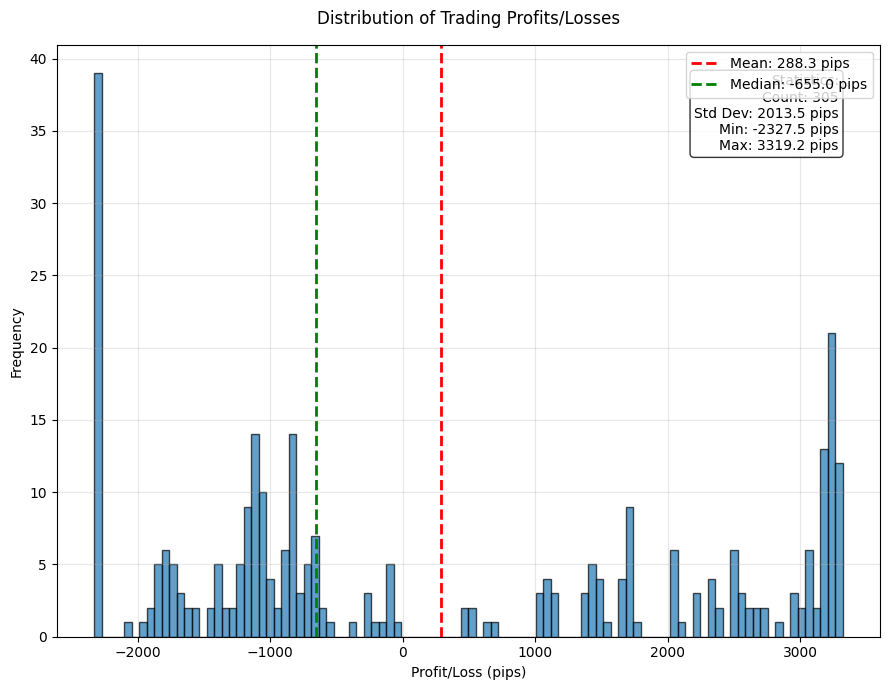

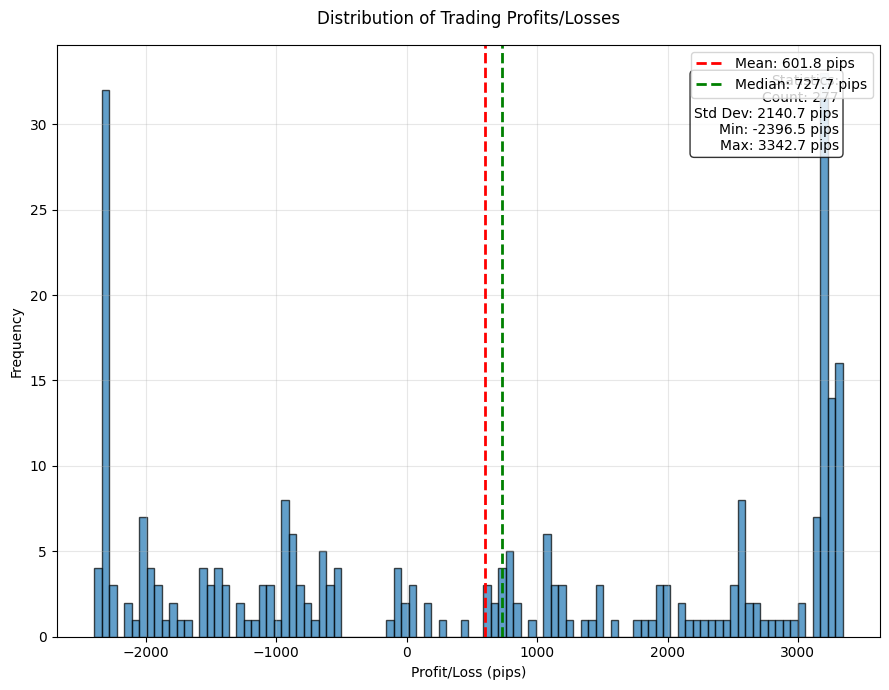

  dataset  K  f1_score  precision  recall     TP     FP      TN     FN  \
0   train  0      0.39       0.41    0.37  28287  40825  333980  48820   
1   valid  0      0.21       0.26    0.18     78    227    2099    356   
2    test  0      0.21       0.29    0.16     80    197    2066    417   

             Min_date            Max_date train_duration  profit_percent  \
0 2017-05-02 07:55:00 2023-09-01 16:10:00     86.8 + 6.2             NaN   
1 2023-09-15 16:15:00 2023-09-29 16:10:00            5.8            3.25   
2 2023-09-29 16:15:00 2023-10-13 16:10:00            6.5            7.53   

   max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
0     NaN      NaN          NaN               NaN             NaN   
1   -2.77     0.21        43.93             -1.57           -0.11   
2   -1.92     0.53        54.87             -1.55           -0.10   

  n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
0          None            None           

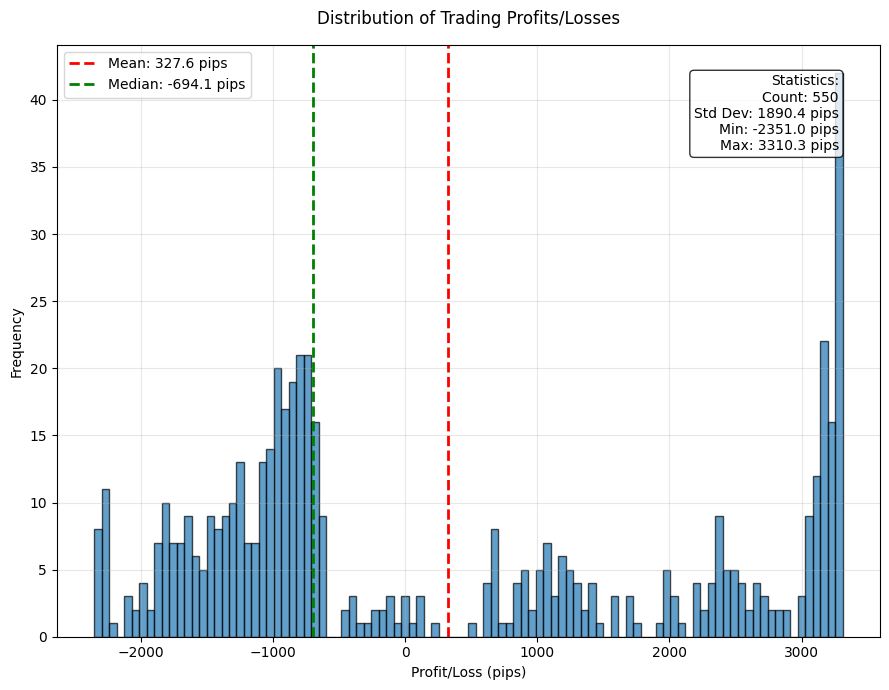

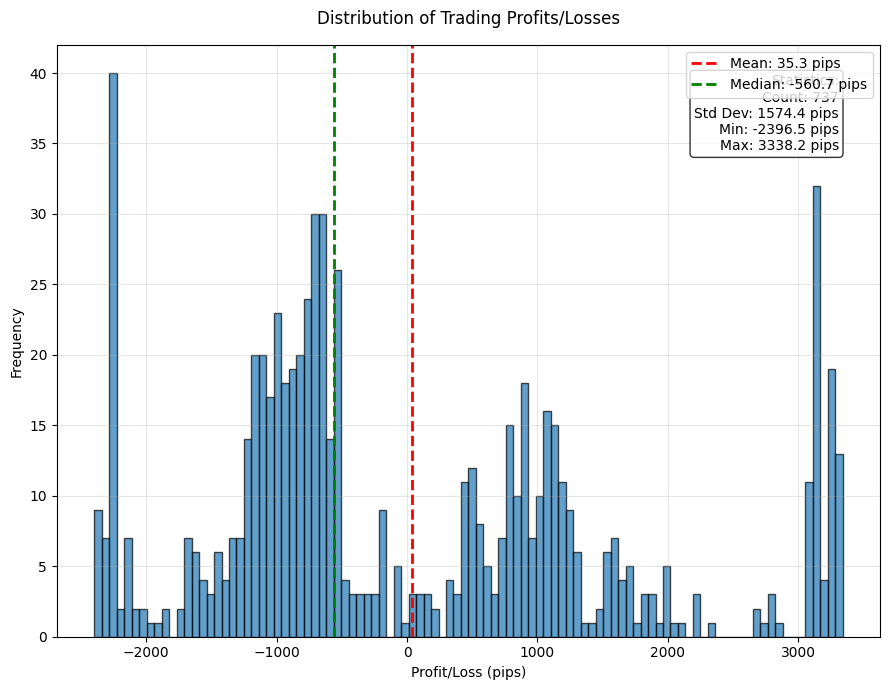

  dataset  K  f1_score  precision  recall     TP     FP      TN     FN  \
3   train  1      0.36       0.38    0.35  27256  44259  335144  50773   
4   valid  1      0.23       0.20    0.27    110    440    1915    295   
5    test  1      0.29       0.26    0.32    194    543    1617    406   

             Min_date            Max_date train_duration  profit_percent  \
3 2017-05-02 07:55:00 2023-09-29 16:10:00     81.6 + 6.3             NaN   
4 2023-10-13 16:15:00 2023-10-27 16:10:00            5.7            7.36   
5 2023-10-27 16:15:00 2023-11-10 16:10:00            5.4           -1.04   

   max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
3     NaN      NaN          NaN               NaN             NaN   
4   -2.65     0.31        43.09             -2.65           -0.06   
5   -3.67    -0.03        42.33             -1.90           -2.65   

  n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
3          None            None           

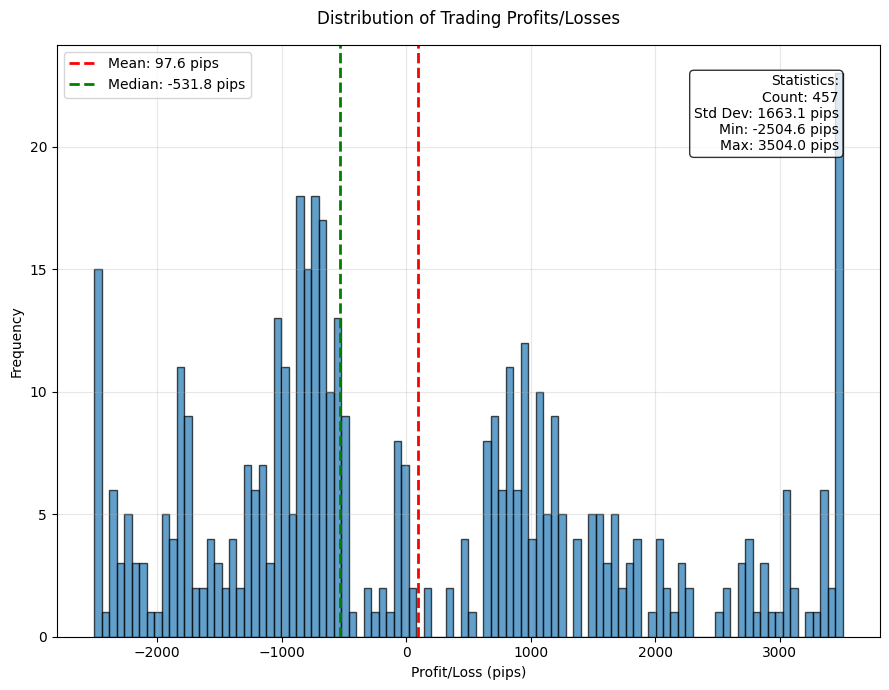

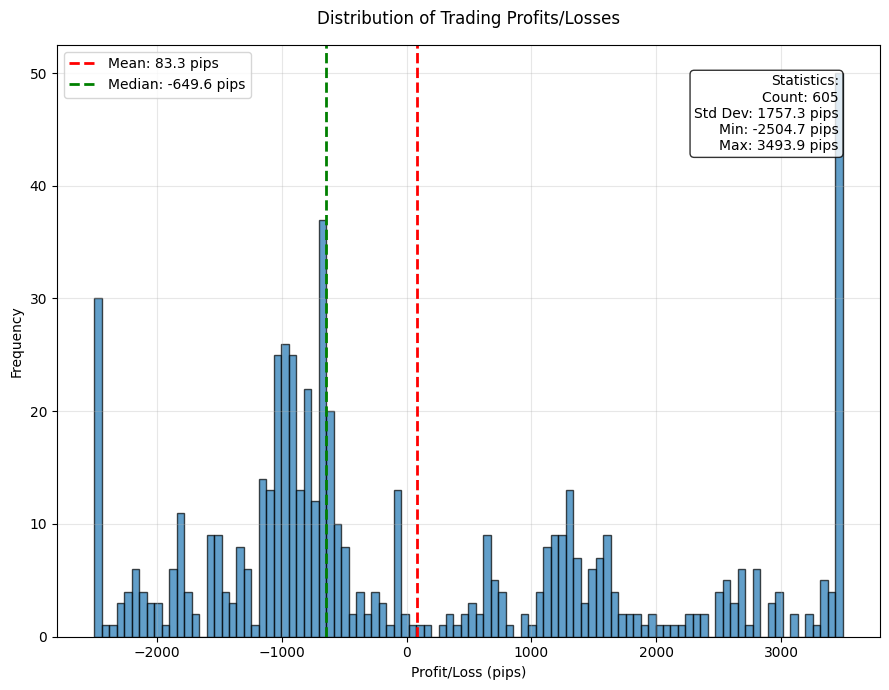

  dataset  K  f1_score  precision  recall     TP     FP      TN     FN  \
6   train  2      0.37       0.42    0.33  25822  34958  349063  53109   
7   valid  2      0.23       0.25    0.21    115    342    1859    444   
8    test  2      0.20       0.17    0.25    105    500    1837    318   

             Min_date            Max_date train_duration  profit_percent  \
6 2017-05-02 07:55:00 2023-10-27 16:10:00     83.4 + 6.4             NaN   
7 2023-11-10 16:15:00 2023-11-24 16:10:00            5.3            1.75   
8 2023-11-24 16:15:00 2023-12-08 16:10:00            5.2            2.51   

   max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
6     NaN      NaN          NaN               NaN             NaN   
7   -2.27     0.09        43.98             -1.19           -1.38   
8   -3.06     0.10        38.02             -2.75           -1.70   

  n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
6          None            None           

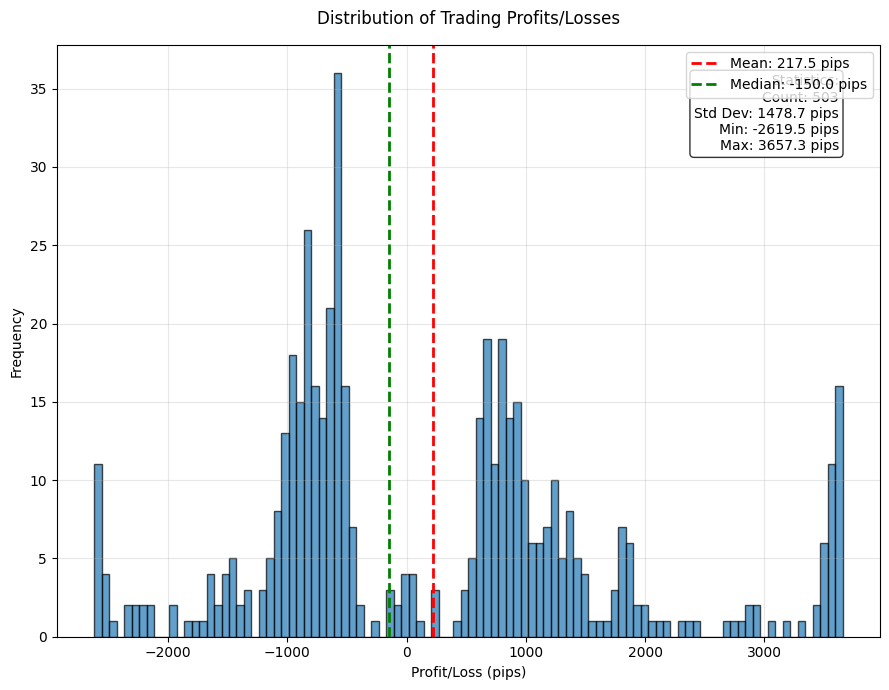

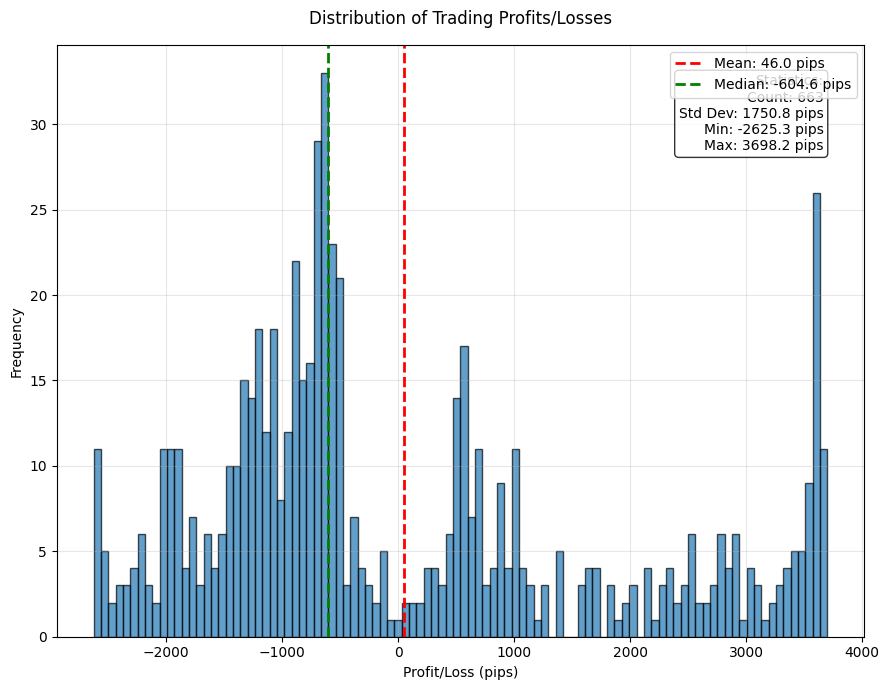

   dataset  K  f1_score  precision  recall     TP     FP      TN     FN  \
9    train  3      0.38       0.41    0.35  27874  40255  348127  52216   
10   valid  3      0.28       0.32    0.25    162    341    1764    493   
11    test  3      0.31       0.25    0.39    166    497    1838    259   

              Min_date            Max_date train_duration  profit_percent  \
9  2017-05-02 07:55:00 2023-11-24 16:10:00     84.1 + 6.2             NaN   
10 2023-12-08 16:15:00 2023-12-22 16:10:00            5.3            4.84   
11 2023-12-22 16:15:00 2024-01-09 16:10:00            5.2           -0.39   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
9      NaN      NaN          NaN               NaN             NaN   
10   -1.73     0.31        48.51             -1.85           -0.30   
11   -3.64    -0.01        39.06             -1.85           -3.49   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
9           None            N

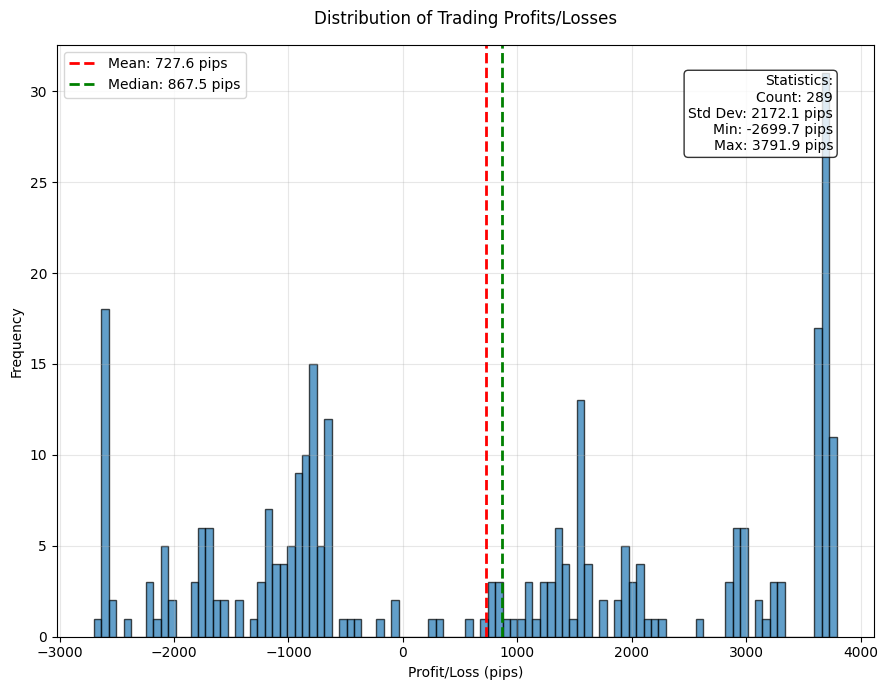

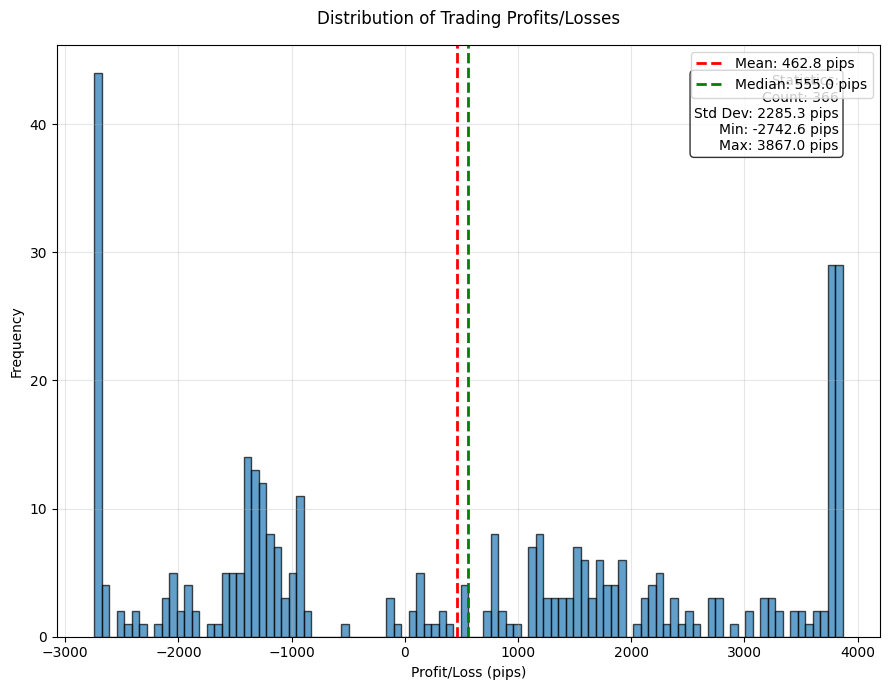

   dataset  K  f1_score  precision  recall     TP     FP      TN     FN  \
12   train  4      0.37       0.40    0.34  27994  41337  351487  53174   
13   valid  4      0.14       0.22    0.10     63    226    1905    566   
14    test  4      0.22       0.32    0.17    116    250    1819    575   

              Min_date            Max_date train_duration  profit_percent  \
12 2017-05-02 07:55:00 2023-12-22 16:10:00     84.7 + 6.3             NaN   
13 2024-01-09 16:15:00 2024-01-23 16:10:00            5.4            8.92   
14 2024-01-23 16:15:00 2024-02-06 16:10:00            5.4            6.17   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
12     NaN      NaN          NaN               NaN             NaN   
13   -1.25     0.65        53.29             -1.04           -1.25   
14   -2.62     0.33        54.10             -1.04            0.14   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
12          None            N

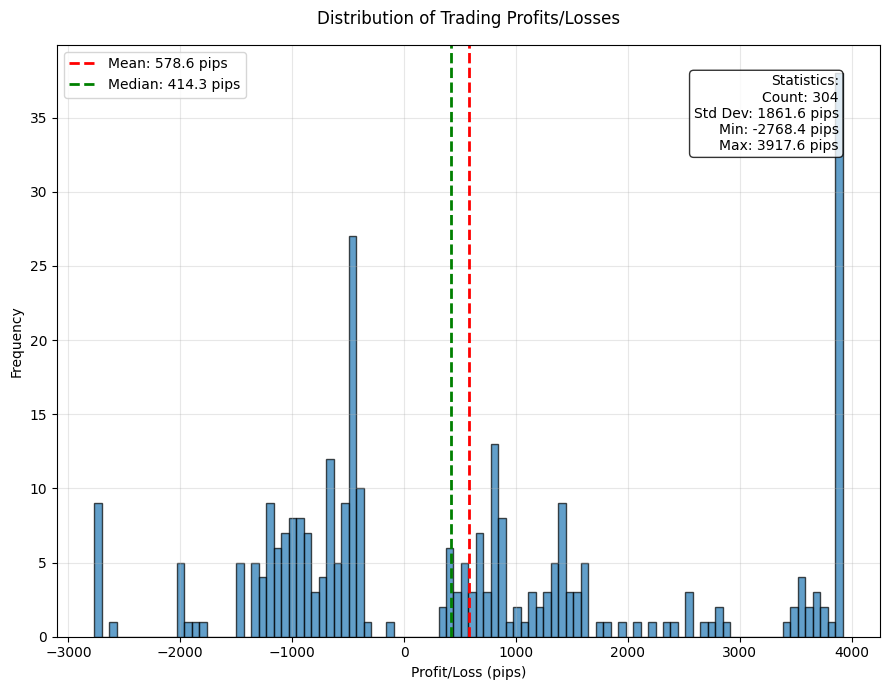

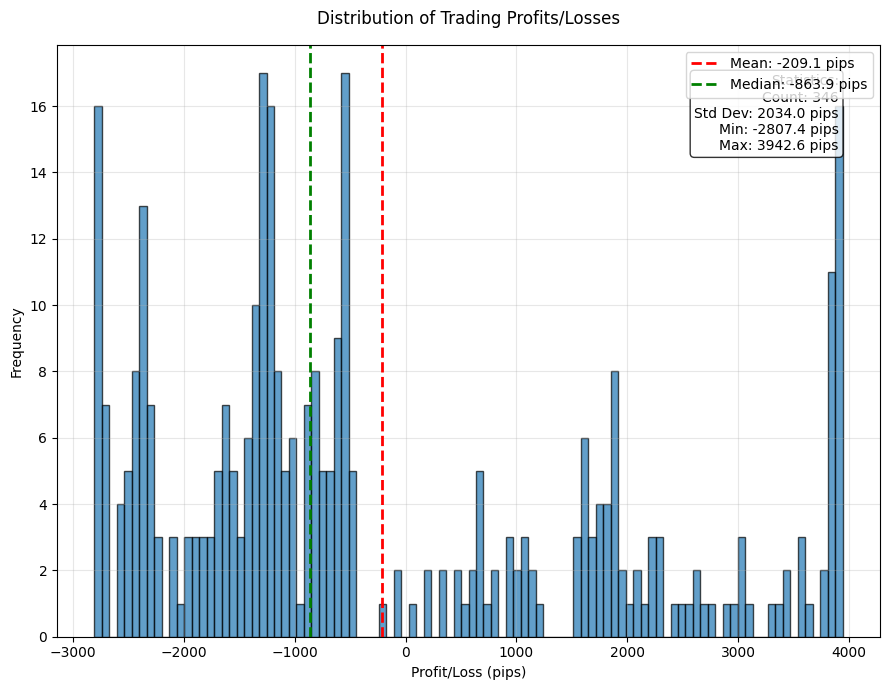

   dataset  K  f1_score  precision  recall     TP     FP      TN     FN  \
15   train  5      0.35       0.39    0.31  25325  38883  358407  56897   
16   valid  5      0.25       0.37    0.19    113    191    1968    488   
17    test  5      0.14       0.18    0.12     63    283    1949    465   

              Min_date            Max_date train_duration  profit_percent  \
15 2017-05-02 07:55:00 2024-01-23 16:10:00     85.9 + 6.3             NaN   
16 2024-02-06 16:15:00 2024-02-20 16:10:00            5.6            7.84   
17 2024-02-20 16:15:00 2024-03-05 16:10:00            5.3           -2.19   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
15     NaN      NaN          NaN               NaN             NaN   
16   -1.16     0.80        50.99             -0.66           -0.73   
17   -3.98    -0.14        34.39             -2.27           -2.36   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
15          None            N

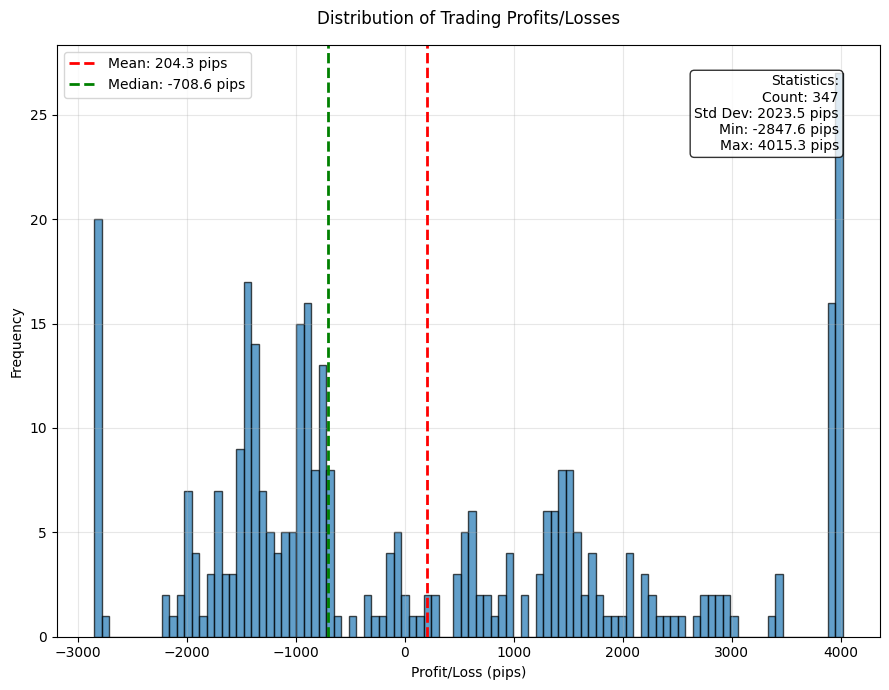

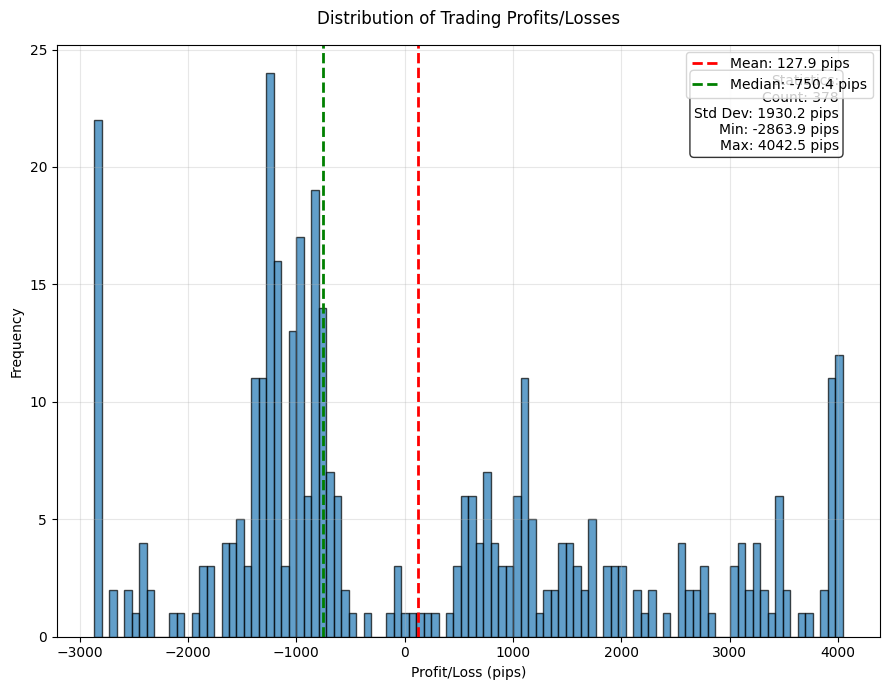

   dataset  K  f1_score  precision  recall     TP     FP      TN     FN  \
18   train  6      0.36       0.42    0.32  26459  35982  365536  57055   
19   valid  6      0.21       0.31    0.16    107    240    1858    555   
20    test  6      0.19       0.23    0.17     86    292    1962    420   

              Min_date            Max_date train_duration  profit_percent  \
18 2017-05-02 07:55:00 2024-02-20 16:10:00     87.0 + 6.3             NaN   
19 2024-03-05 16:15:00 2024-03-19 16:10:00            5.4            2.15   
20 2024-03-19 16:15:00 2024-04-03 16:10:00            5.3            1.43   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
18     NaN      NaN          NaN               NaN             NaN   
19   -1.44     0.16        43.52             -1.02           -0.47   
20   -3.13     0.08        43.39             -1.30           -0.10   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
18          None            N

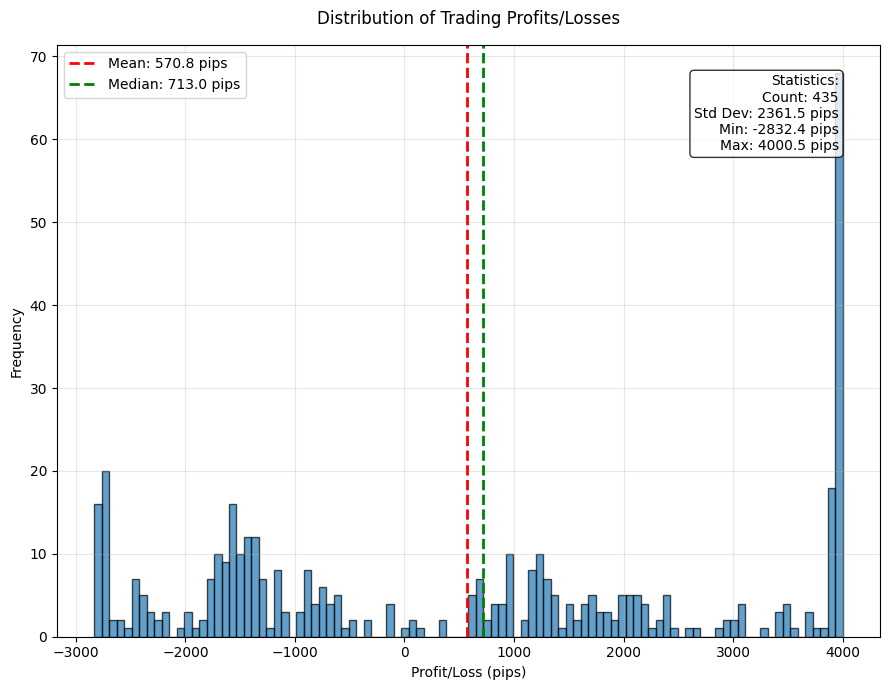

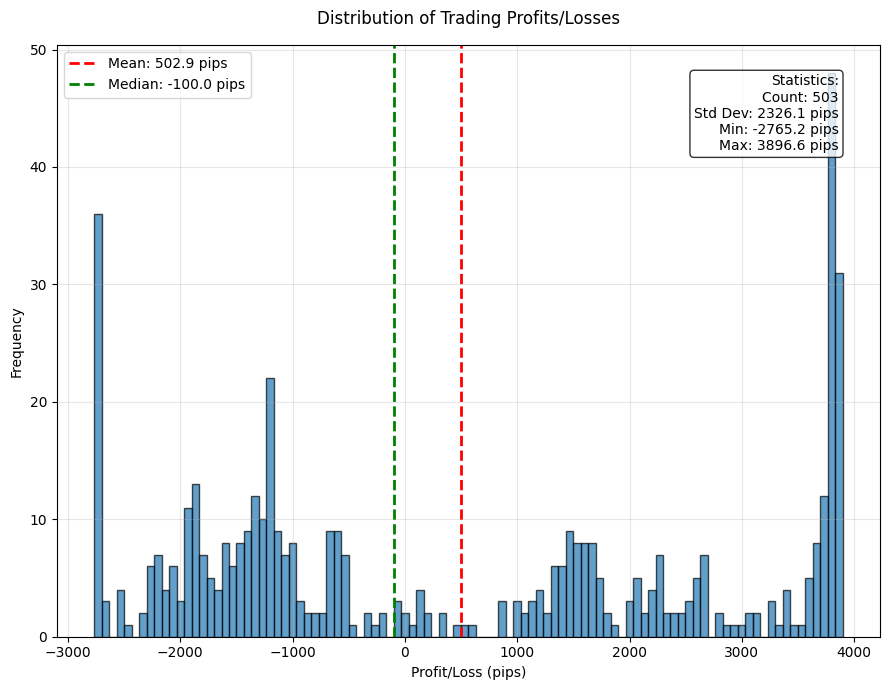

   dataset  K  f1_score  precision  recall     TP     FP      TN     FN  \
21   train  7      0.36       0.40    0.32  27409  40806  365042  57295   
22   valid  7      0.28       0.30    0.26    129    306    1955    370   
23    test  7      0.29       0.29    0.29    148    355    1902    355   

              Min_date            Max_date train_duration  profit_percent  \
21 2017-05-02 07:55:00 2024-03-19 16:10:00     87.6 + 6.5             NaN   
22 2024-04-03 16:15:00 2024-04-17 16:10:00            5.1           11.31   
23 2024-04-17 16:15:00 2024-05-01 16:10:00            5.7            7.79   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
21     NaN      NaN          NaN               NaN             NaN   
22   -2.99     0.54        53.33             -2.38           -0.10   
23   -2.64     0.32        49.11             -2.11           -0.06   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
21          None            N

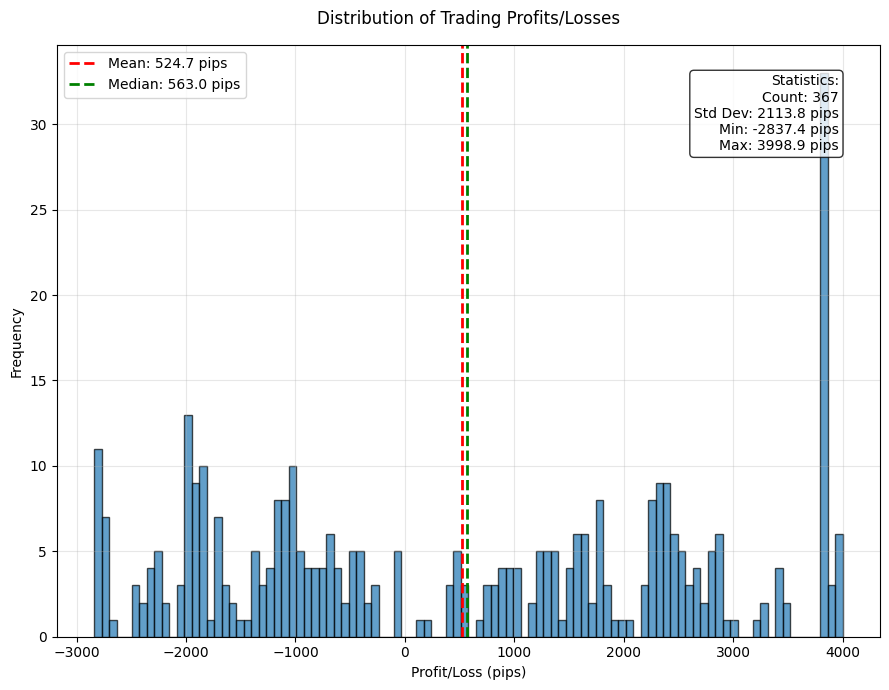

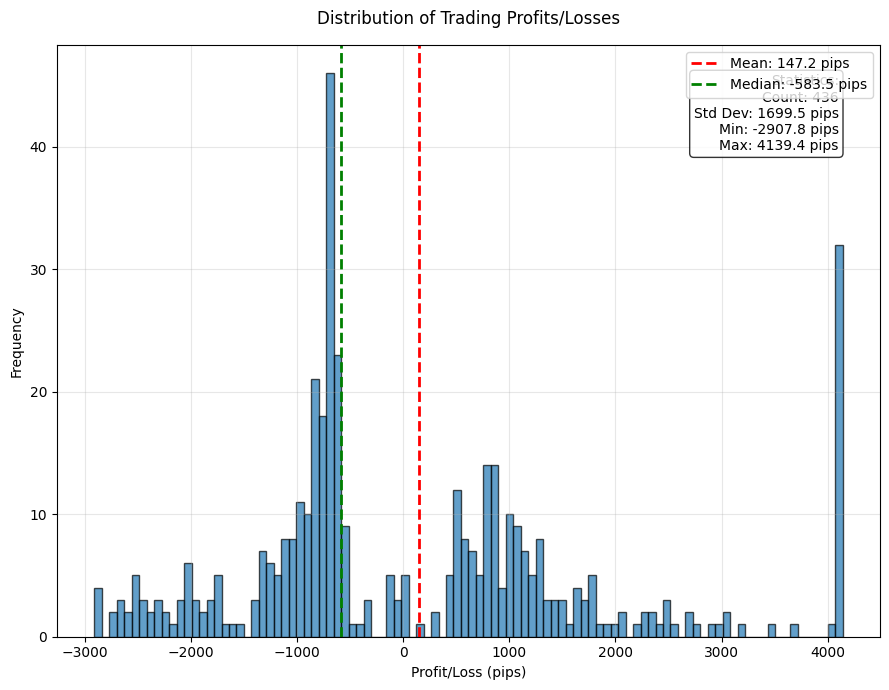

   dataset  K  f1_score  precision  recall     TP     FP      TN     FN  \
24   train  8      0.34       0.40    0.30  25646  38076  372287  60063   
25   valid  8      0.29       0.34    0.25    124    243    2018    375   
26    test  8      0.28       0.29    0.27    128    308    1979    345   

              Min_date            Max_date train_duration  profit_percent  \
24 2017-05-02 07:55:00 2024-04-17 16:10:00     87.8 + 6.5             NaN   
25 2024-05-01 16:15:00 2024-05-15 16:10:00            5.5            9.34   
26 2024-05-15 16:15:00 2024-05-29 16:10:00            5.3            2.25   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
24     NaN      NaN          NaN               NaN             NaN   
25   -1.55     0.53        53.13             -0.80           -0.02   
26   -1.73     0.13        44.27             -1.29           -0.23   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
24          None            N

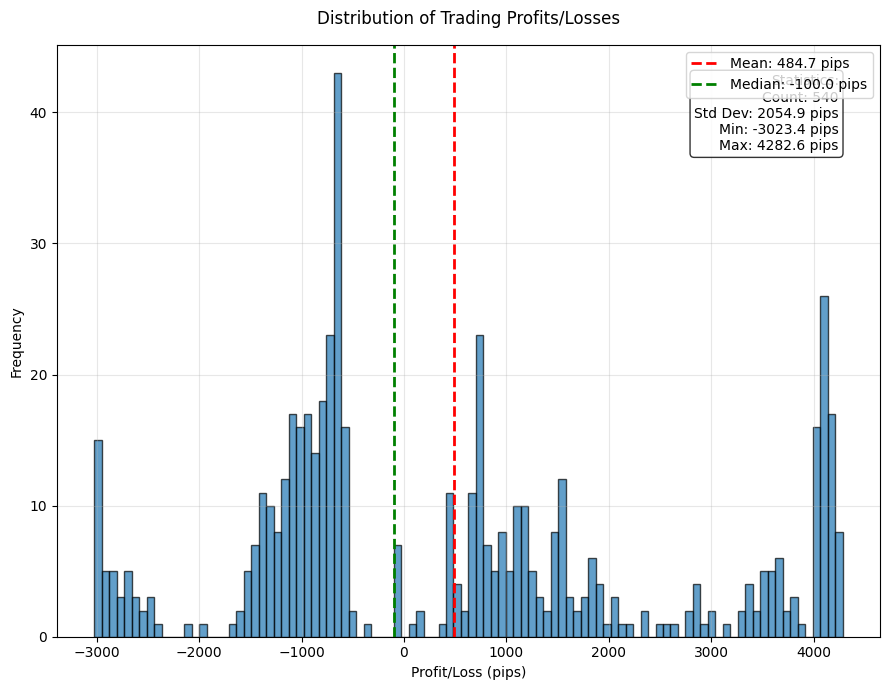

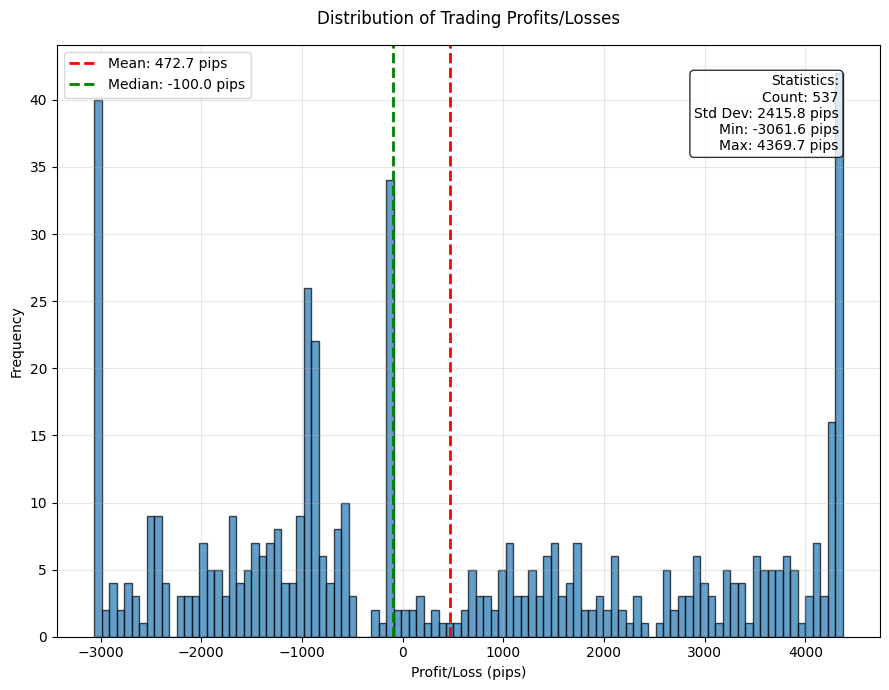

   dataset  K  f1_score  precision  recall     TP     FP      TN     FN  \
27   train  9      0.35       0.41    0.30  26328  38108  376773  60383   
28   valid  9      0.22       0.21    0.23    111    429    1850    370   
29    test  9      0.28       0.32    0.25    171    366    1715    508   

              Min_date            Max_date train_duration  profit_percent  \
27 2017-05-02 07:55:00 2024-05-15 16:10:00     88.9 + 6.5             NaN   
28 2024-05-29 16:15:00 2024-06-12 16:10:00            5.4            9.41   
29 2024-06-12 16:15:00 2024-06-26 16:10:00            5.2            7.40   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
27     NaN      NaN          NaN               NaN             NaN   
28   -1.88     0.45        49.26             -0.79           -0.52   
29   -2.42     0.26        46.00             -2.33           -2.52   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
27          None            N

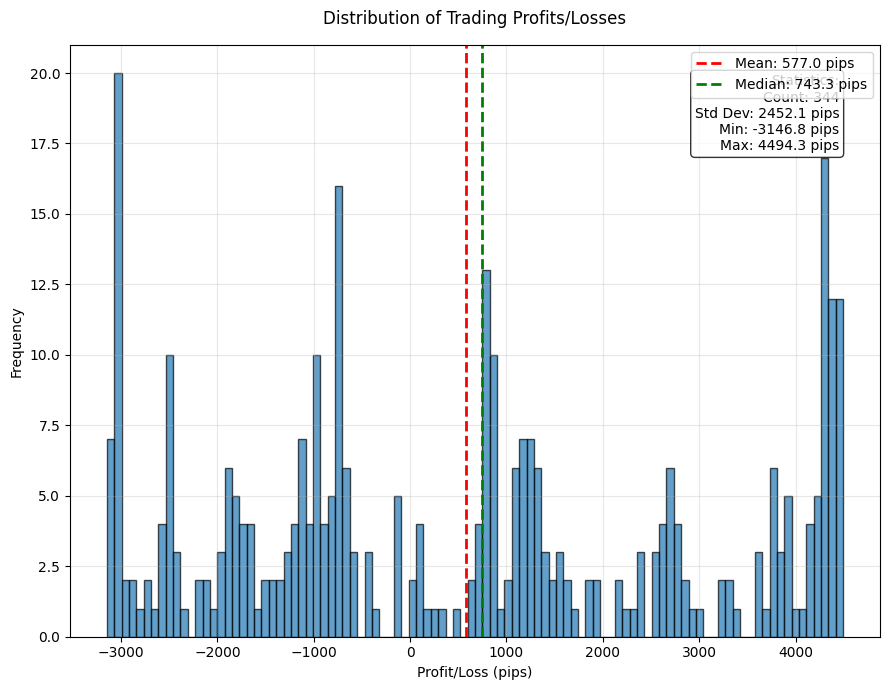

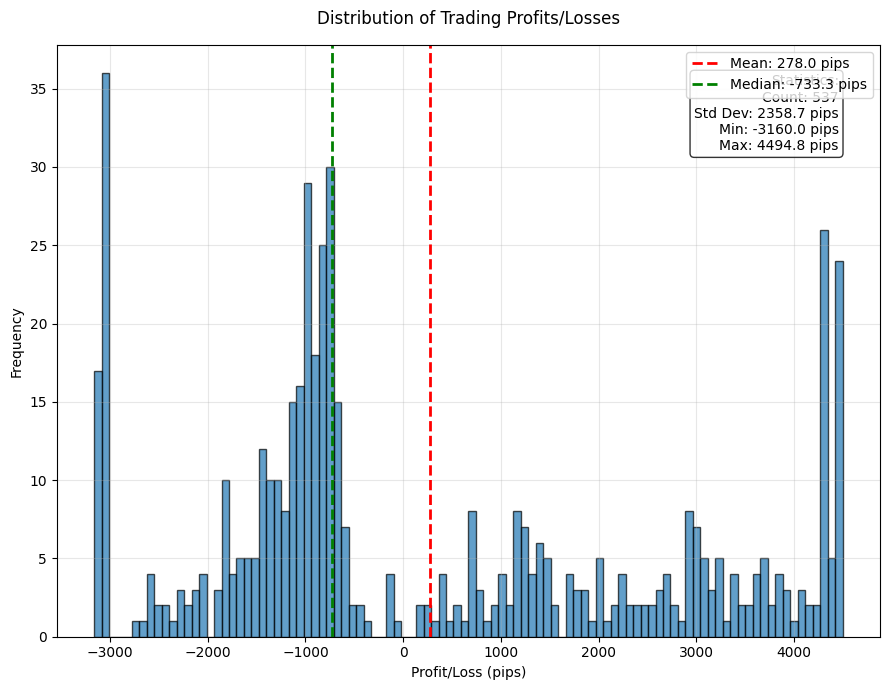

   dataset   K  f1_score  precision  recall     TP     FP      TN     FN  \
30   train  10      0.35       0.40    0.31  27409  41619  377828  60256   
31   valid  10      0.26       0.34    0.21    117    227    1982    434   
32    test  10      0.21       0.19    0.23    104    433    1873    350   

              Min_date            Max_date train_duration  profit_percent  \
30 2017-05-02 07:55:00 2024-06-12 16:10:00     89.1 + 6.4             NaN   
31 2024-06-26 16:15:00 2024-07-10 16:10:00            5.4            6.68   
32 2024-07-10 16:15:00 2024-07-24 16:10:00            5.3            4.57   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
30     NaN      NaN          NaN               NaN             NaN   
31   -1.63     0.44        54.07             -1.34           -0.62   
32   -3.60     0.19        41.71             -1.93           -0.33   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
30          None         

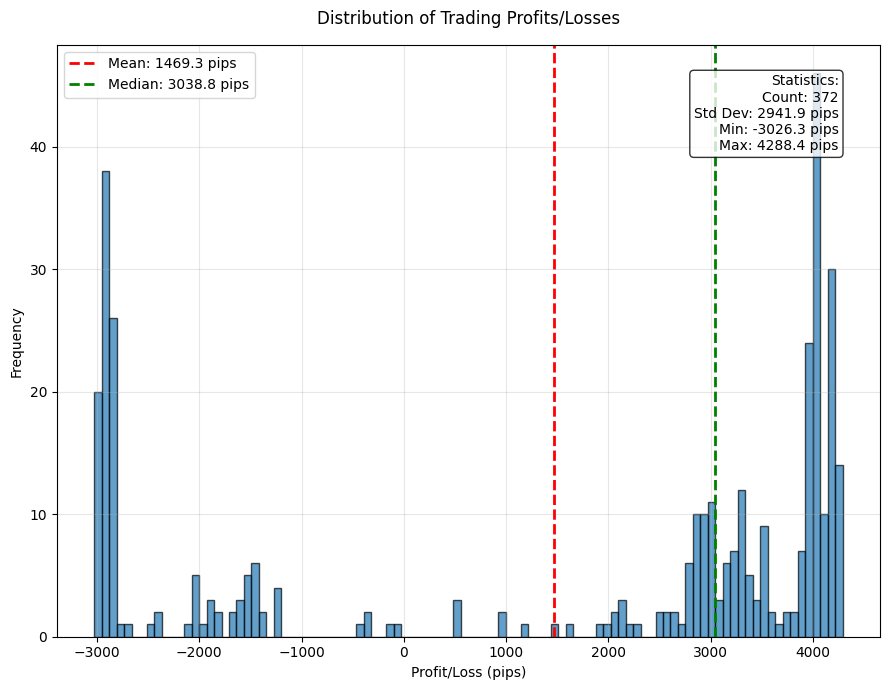

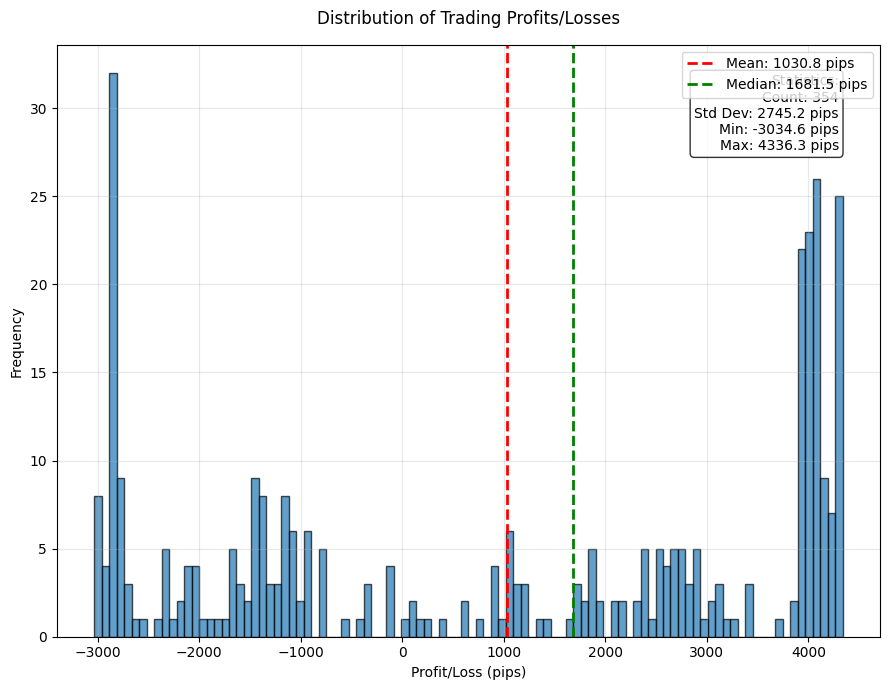

   dataset   K  f1_score  precision  recall     TP     FP      TN     FN  \
33   train  11      0.34       0.41    0.29  25963  37052  386685  62932   
34   valid  11      0.31       0.40    0.26    148    224    1968    420   
35    test  11      0.25       0.33    0.21    116    238    1963    443   

              Min_date            Max_date train_duration  profit_percent  \
33 2017-05-02 07:55:00 2024-07-10 16:10:00     90.3 + 6.5             NaN   
34 2024-07-24 16:15:00 2024-08-07 16:10:00            5.2           29.05   
35 2024-08-07 16:15:00 2024-08-21 16:10:00            5.1           15.71   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
33     NaN      NaN          NaN               NaN             NaN   
34   -1.52     1.08        65.59             -1.05           -0.66   
35   -2.82     0.64        57.91             -1.27            0.14   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
33          None         

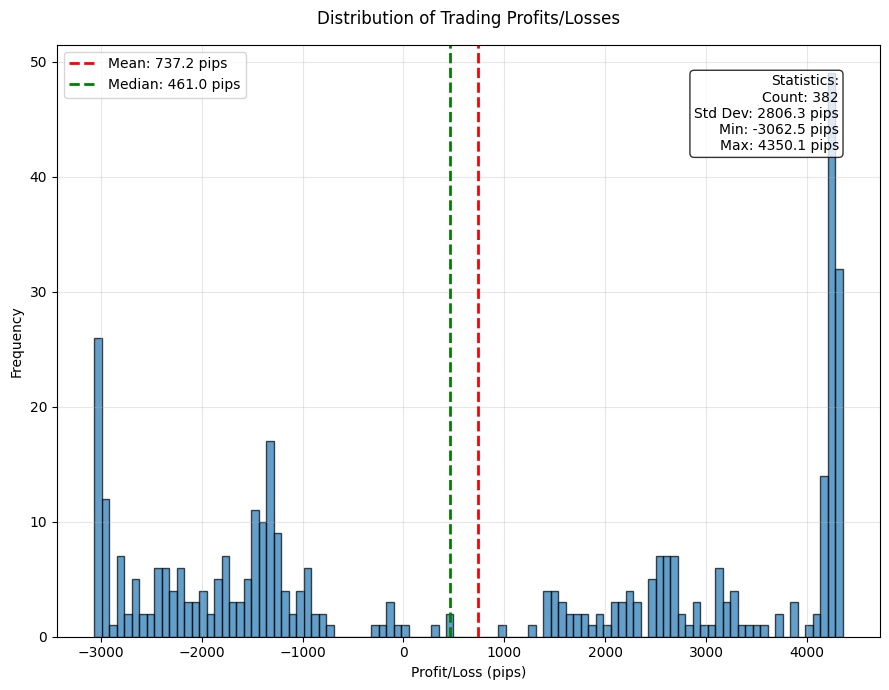

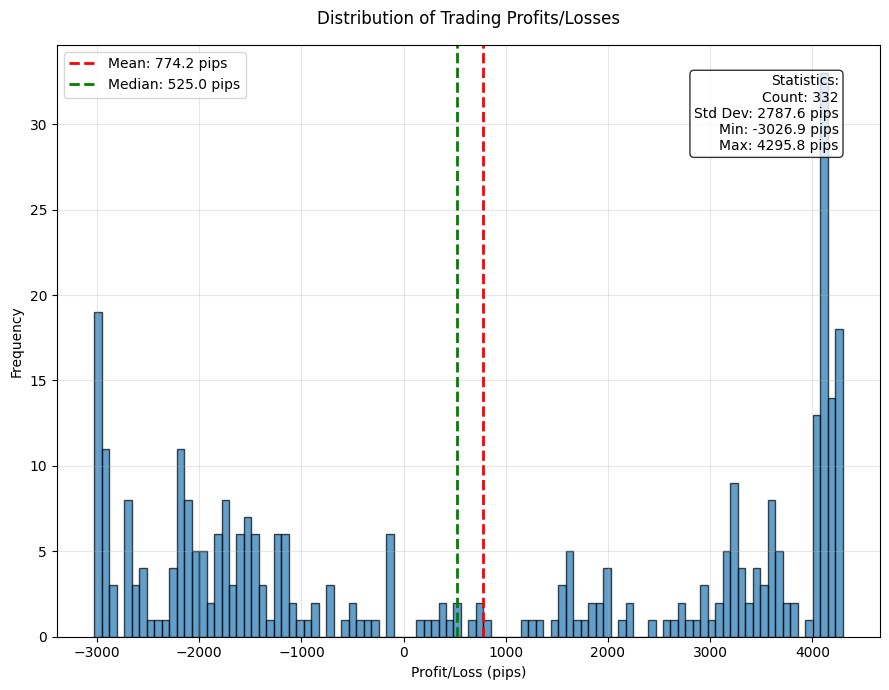

   dataset   K  f1_score  precision  recall     TP     FP      TN     FN  \
36   train  12      0.35       0.41    0.30  27246  38553  389682  62671   
37   valid  12      0.23       0.30    0.19    115    267    1896    482   
38    test  12      0.22       0.27    0.18     91    241    2014    414   

              Min_date            Max_date train_duration  profit_percent  \
36 2017-05-02 07:55:00 2024-08-07 16:10:00     91.0 + 6.6             NaN   
37 2024-08-21 16:15:00 2024-09-04 16:10:00            5.4           21.48   
38 2024-09-04 16:15:00 2024-09-18 16:10:00            5.2           10.61   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
36     NaN      NaN          NaN               NaN             NaN   
37   -2.32     0.70        50.79             -1.91            0.14   
38   -3.47     0.56        52.11             -1.18           -0.55   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
36          None         

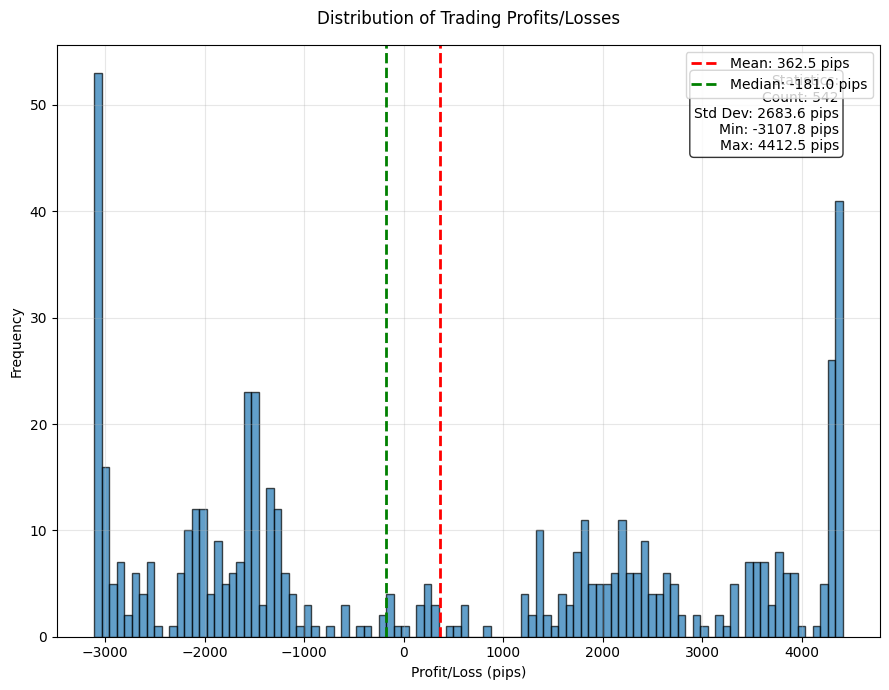

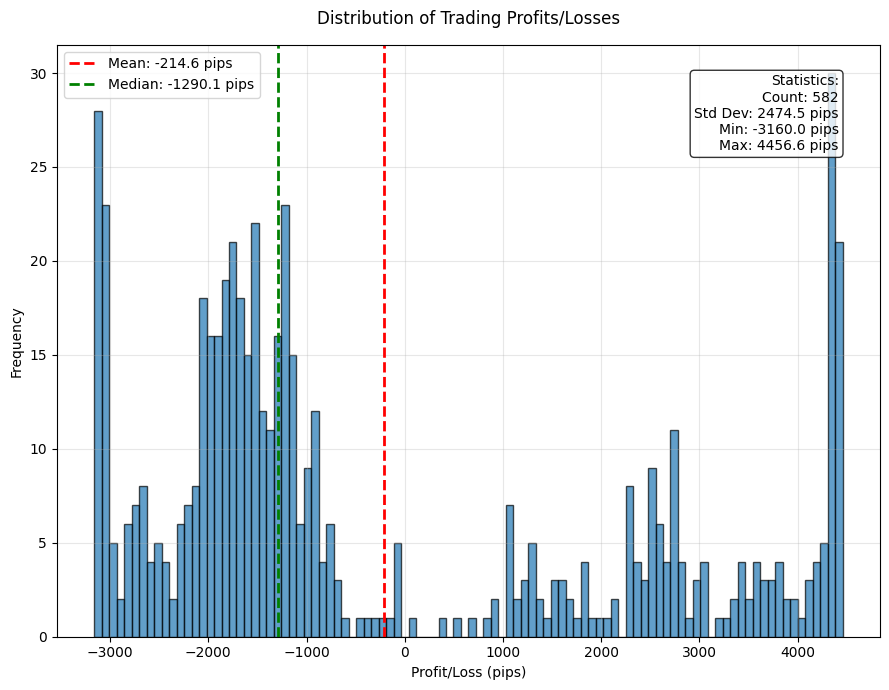

   dataset   K  f1_score  precision  recall     TP     FP      TN     FN  \
39   train  13      0.35       0.43    0.30  27464  36646  395953  63609   
40   valid  13      0.26       0.27    0.25    144    398    1785    433   
41    test  13      0.16       0.15    0.19     85    497    1812    366   

              Min_date            Max_date train_duration  profit_percent  \
39 2017-05-02 07:55:00 2024-09-04 16:10:00     91.5 + 6.7             NaN   
40 2024-09-18 16:15:00 2024-10-02 16:10:00            5.1            6.72   
41 2024-10-02 16:15:00 2024-10-16 16:10:00            5.1           -6.15   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
39     NaN      NaN          NaN               NaN             NaN   
40   -4.07     0.24        49.08             -2.46           -1.67   
41   -9.20    -0.22        33.33             -2.53           -7.92   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
39          None         

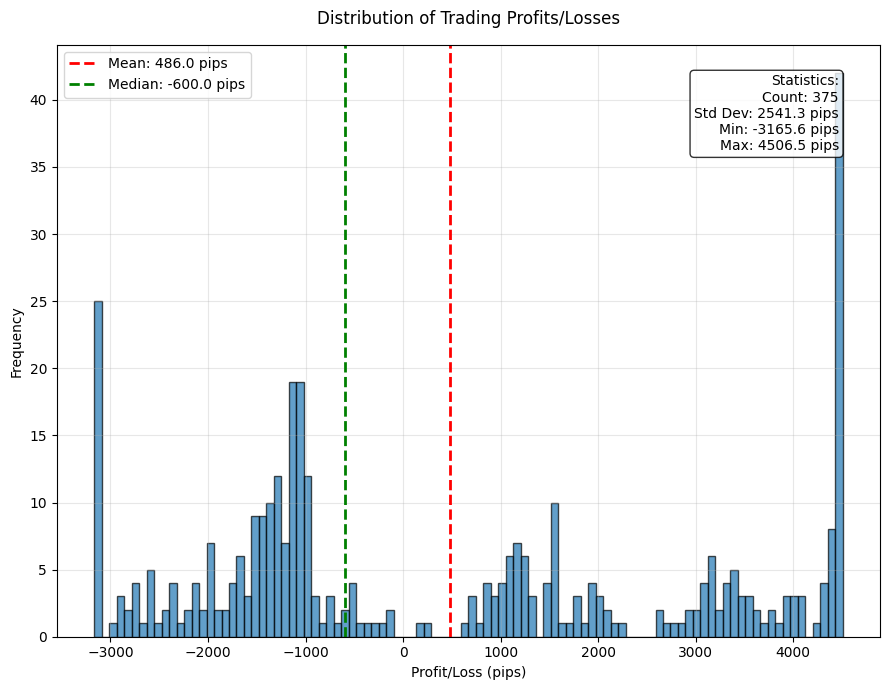

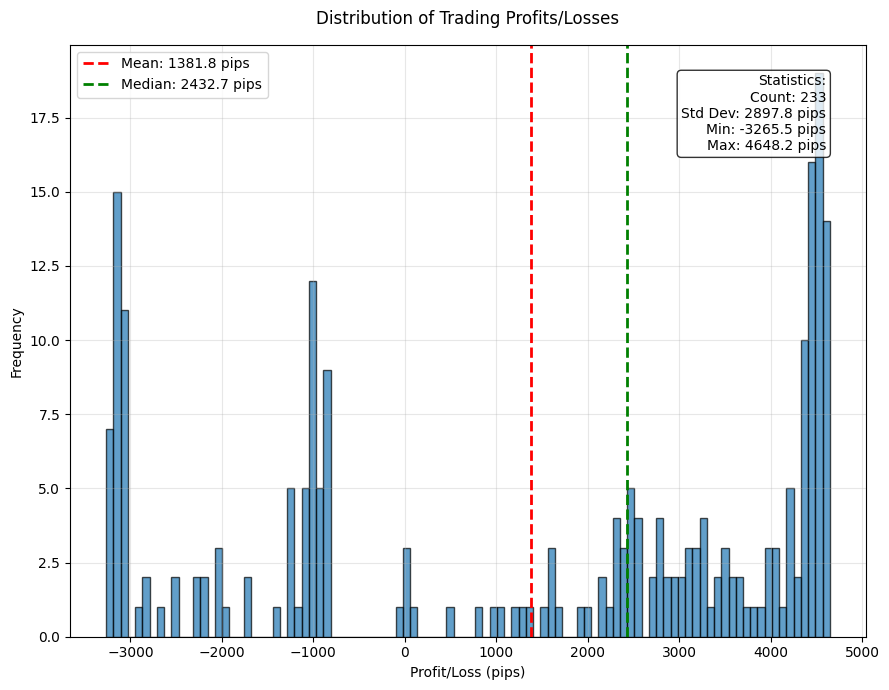

   dataset   K  f1_score  precision  recall     TP     FP      TN     FN  \
42   train  14      0.34       0.42    0.29  26153  35514  397435  65298   
43   valid  14      0.26       0.31    0.22    117    258    1965    420   
44    test  14      0.21       0.36    0.15     83    150    2065    462   

              Min_date            Max_date train_duration  profit_percent  \
42 2017-05-25 16:15:00 2024-10-02 16:10:00     91.5 + 6.7             NaN   
43 2024-10-16 16:15:00 2024-10-30 16:10:00            5.2            5.55   
44 2024-10-30 16:15:00 2024-11-13 16:10:00            5.0           13.60   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
42     NaN      NaN          NaN               NaN             NaN   
43   -2.87     0.32         47.2             -1.61            0.08   
44   -1.11     1.02         61.8             -0.96           -0.30   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
42          None         

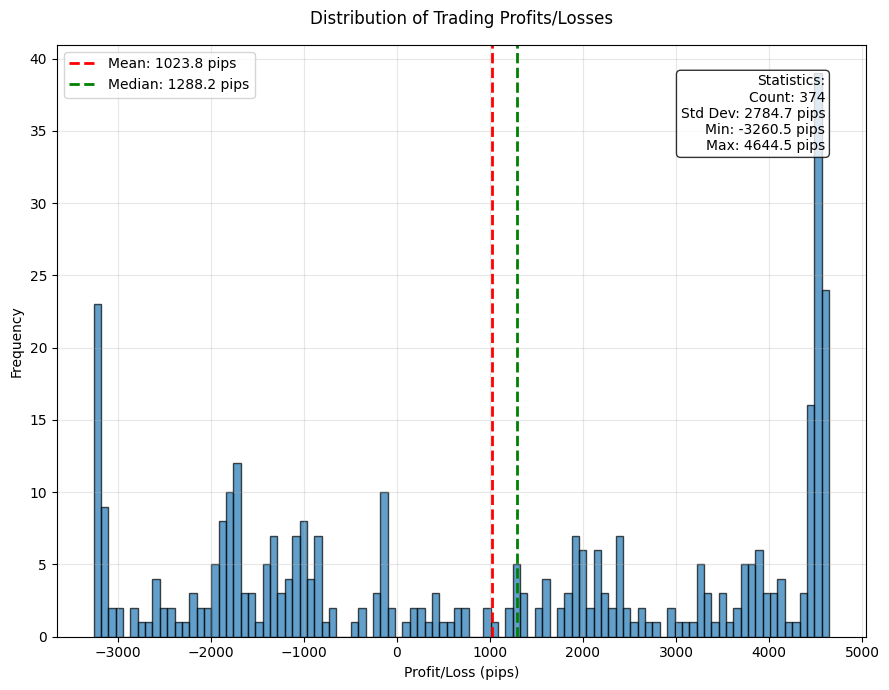

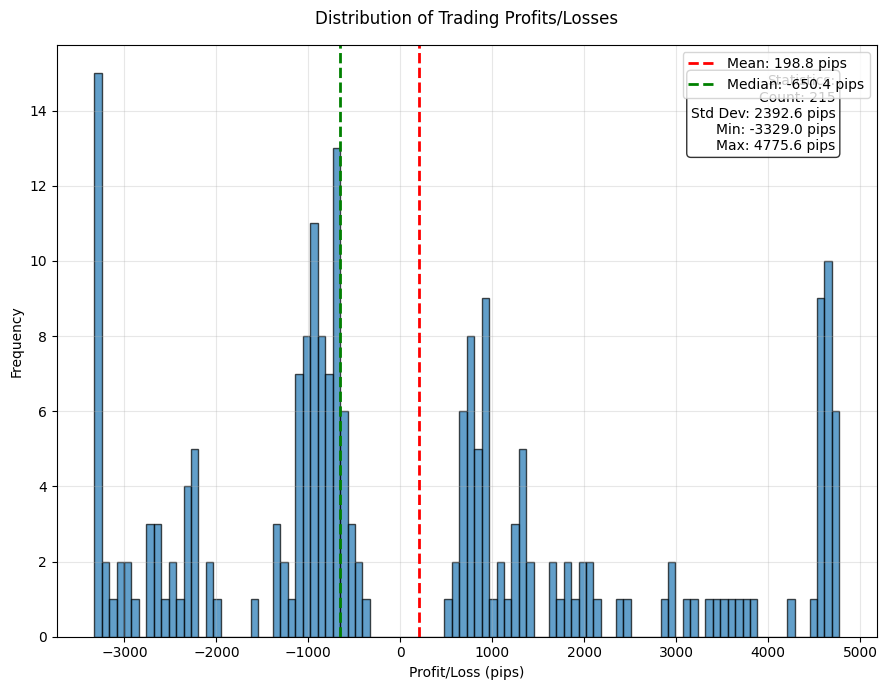

   dataset   K  f1_score  precision  recall     TP     FP      TN     FN  \
45   train  15      0.35       0.41    0.31  27963  39940  392873  63624   
46   valid  15      0.22       0.24    0.20     90    284    2026    360   
47    test  15      0.14       0.25    0.10     54    161    2061    484   

              Min_date            Max_date train_duration  profit_percent  \
45 2017-06-22 16:15:00 2024-10-30 16:10:00     91.7 + 6.8             NaN   
46 2024-11-13 16:15:00 2024-11-27 16:10:00            5.2           13.82   
47 2024-11-27 16:15:00 2024-12-11 16:10:00            5.1            1.50   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
45     NaN      NaN          NaN               NaN             NaN   
46   -1.50     0.70        55.88             -1.03            0.14   
47   -2.34     0.15        45.12             -1.31            0.12   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
45          None         

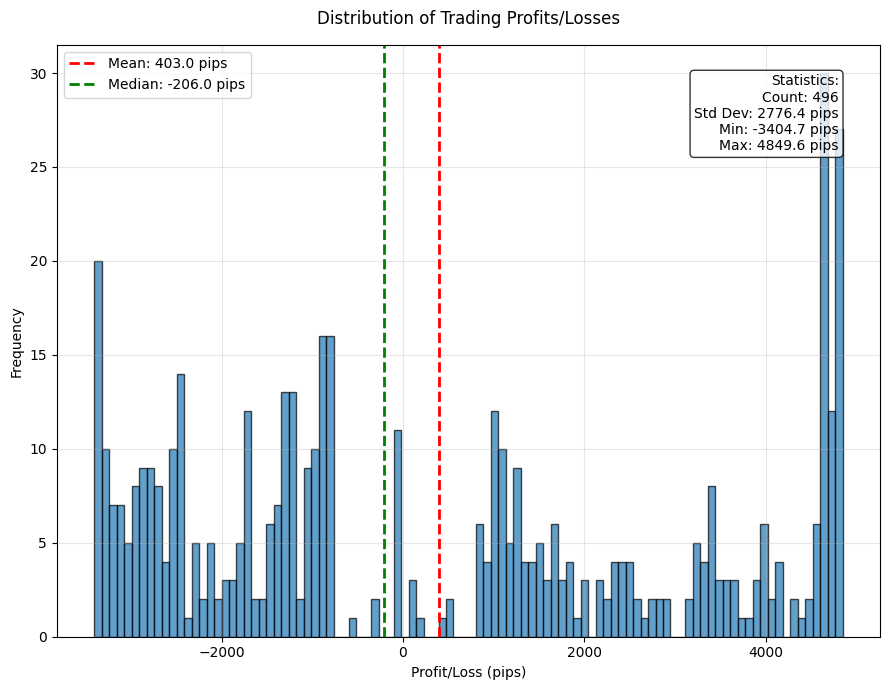

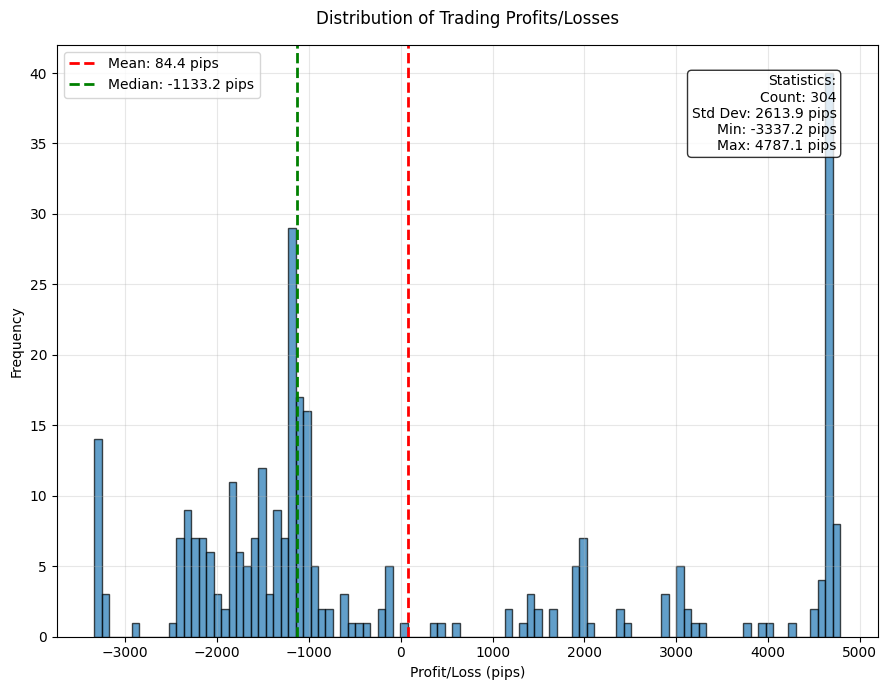

   dataset   K  f1_score  precision  recall     TP     FP      TN     FN  \
48   train  16      0.35       0.42    0.30  27121  37102  395617  64560   
49   valid  16      0.27       0.28    0.26    139    357    1875    389   
50    test  16      0.15       0.19    0.12     59    245    2030    426   

              Min_date            Max_date train_duration  profit_percent  \
48 2017-07-20 16:15:00 2024-11-27 16:10:00     91.8 + 6.8             NaN   
49 2024-12-11 16:15:00 2024-12-26 16:10:00            5.2            8.36   
50 2024-12-26 16:15:00 2025-01-10 16:10:00            5.1            0.99   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
48     NaN      NaN          NaN               NaN             NaN   
49   -4.18     0.32        47.78             -2.71           -3.76   
50   -5.04     0.06        32.89             -2.00           -4.22   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
48          None         

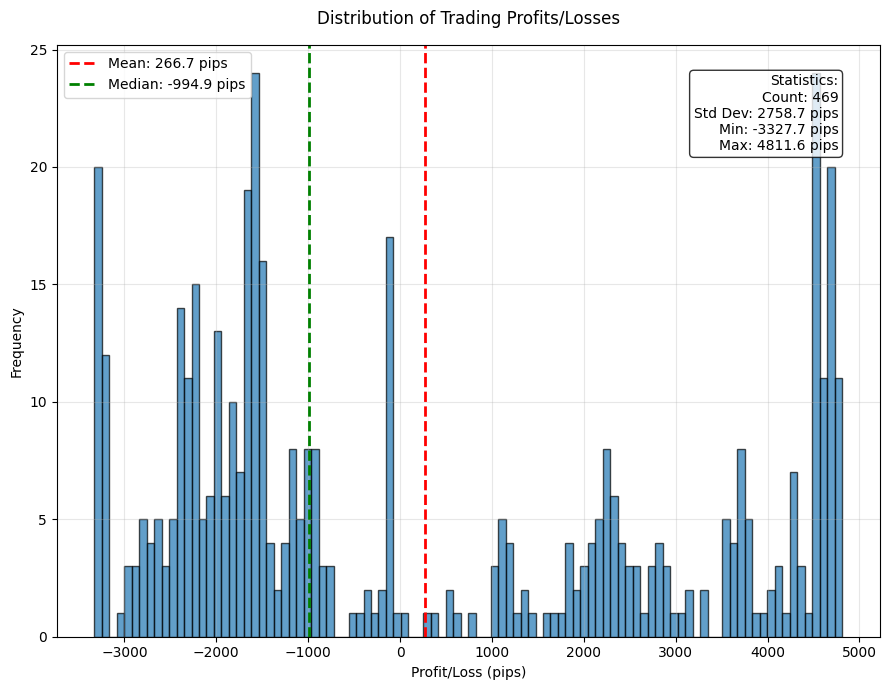

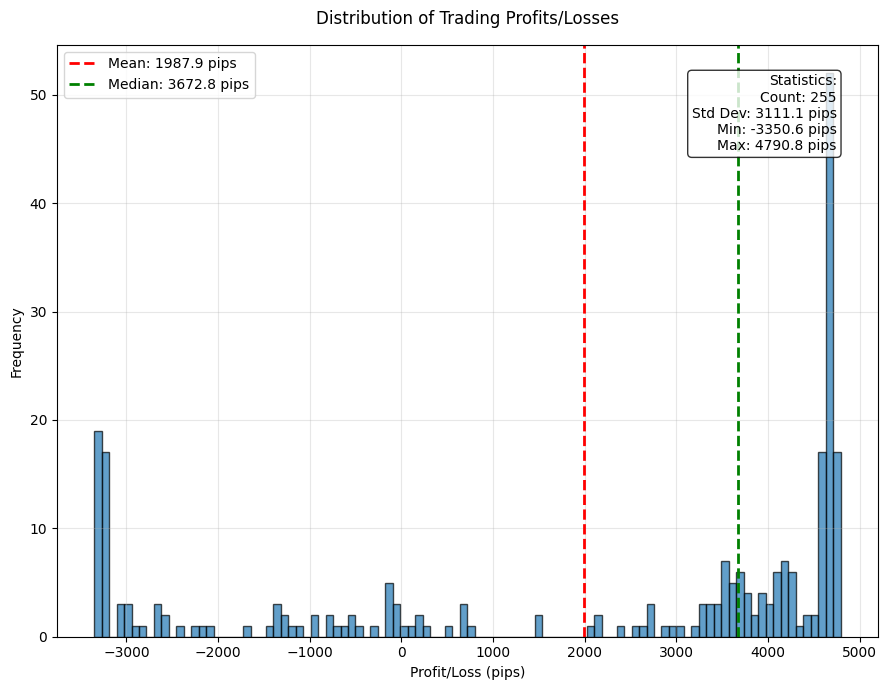

   dataset   K  f1_score  precision  recall     TP     FP      TN     FN  \
51   train  17      0.35       0.42    0.30  27877  38167  394332  64024   
52   valid  17      0.23       0.26    0.20    120    349    1820    471   
53    test  17      0.24       0.33    0.19     84    171    2146    359   

              Min_date            Max_date train_duration  profit_percent  \
51 2017-08-17 16:15:00 2024-12-26 16:10:00     91.9 + 6.8             NaN   
52 2025-01-10 16:15:00 2025-01-24 16:10:00            5.2            2.88   
53 2025-01-24 16:15:00 2025-02-07 16:10:00            5.1           20.83   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
51     NaN      NaN          NaN               NaN             NaN   
52   -3.12     0.13        40.94             -2.07           -0.83   
53   -0.64     1.34        68.63             -0.21            0.14   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
51          None         

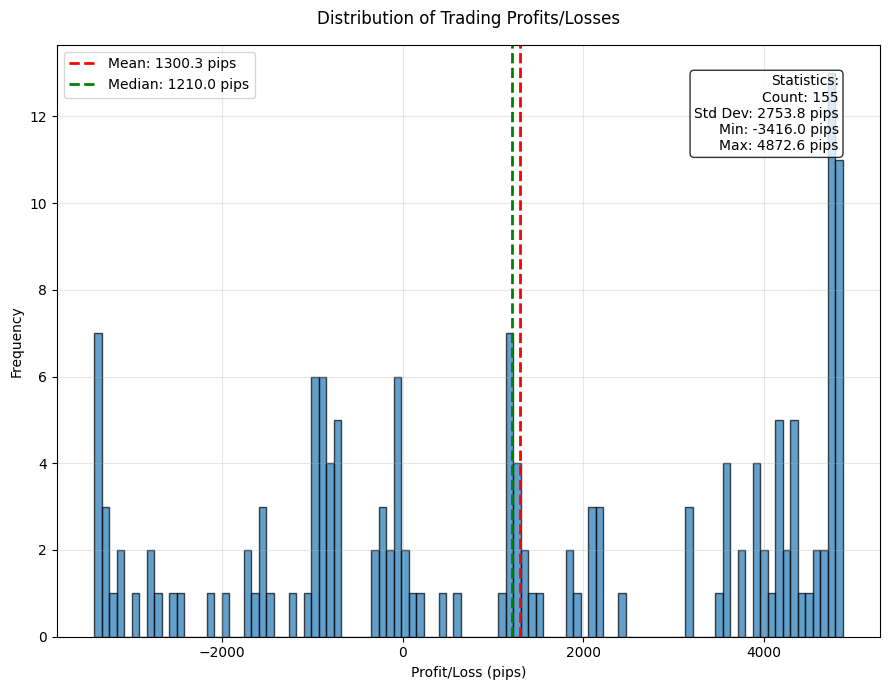

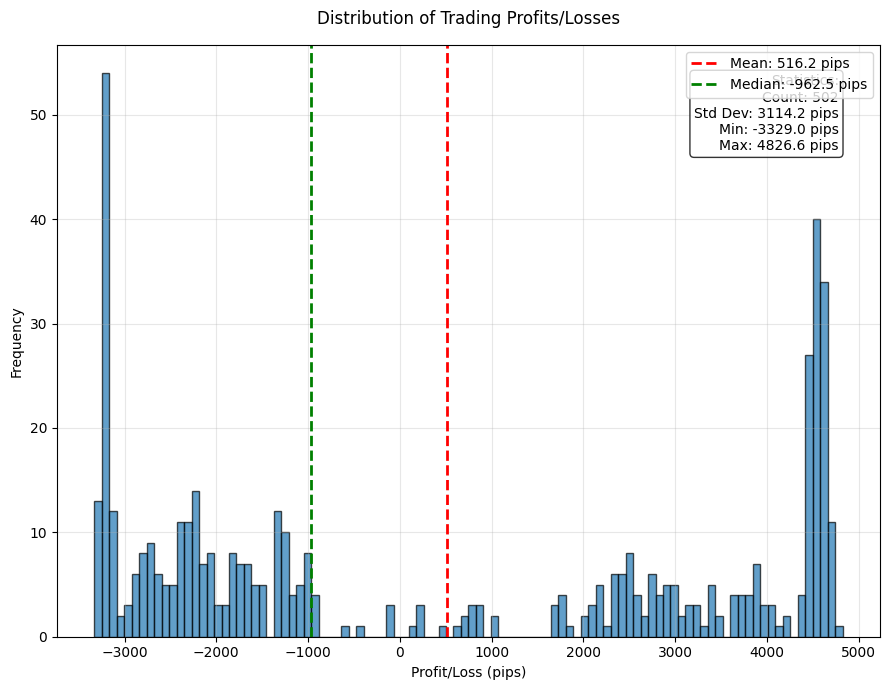

   dataset   K  f1_score  precision  recall     TP     FP      TN     FN  \
54   train  18      0.35       0.43    0.30  27511  36142  396067  64680   
55   valid  18      0.12       0.25    0.08     39    116    2151    454   
56    test  18      0.31       0.28    0.33    142    360    1973    285   

              Min_date            Max_date train_duration  profit_percent  \
54 2017-09-14 16:15:00 2025-01-24 16:10:00     91.8 + 6.8             NaN   
55 2025-02-07 16:15:00 2025-02-21 16:10:00            5.1            6.42   
56 2025-02-21 16:15:00 2025-03-07 16:10:00            5.2            9.41   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
54     NaN      NaN          NaN               NaN             NaN   
55   -0.34     1.04        58.71             -0.26           -0.05   
56   -2.64     0.33        48.21             -2.70           -1.48   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
54          None         

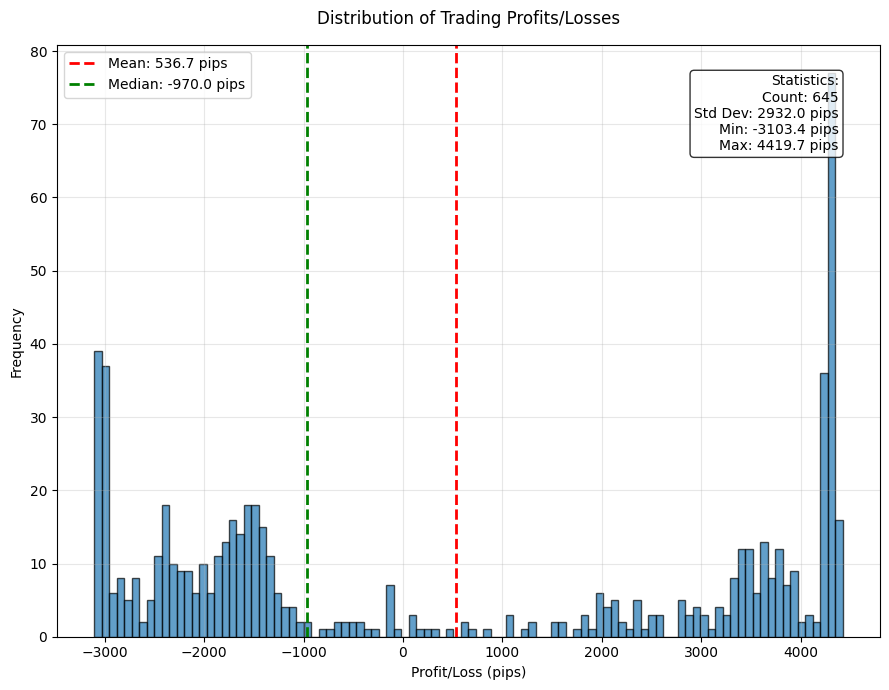

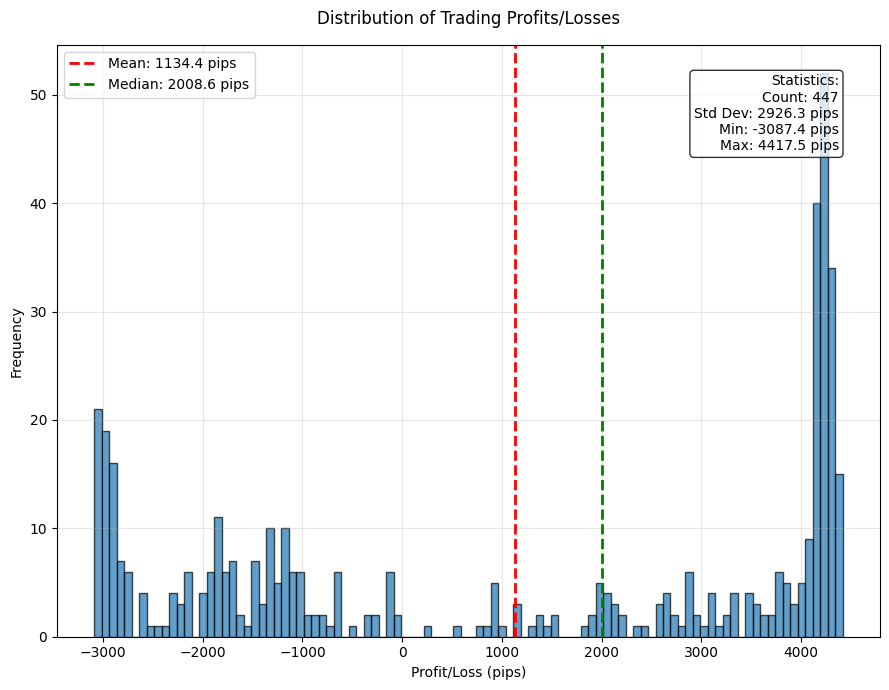

   dataset   K  f1_score  precision  recall     TP     FP      TN     FN  \
57   train  19      0.35       0.42    0.30  27714  37607  394445  64634   
58   valid  19      0.29       0.24    0.36    154    491    1843    272   
59    test  19      0.26       0.28    0.25    125    322    1937    376   

              Min_date            Max_date train_duration  profit_percent  \
57 2017-10-12 16:15:00 2025-02-21 16:10:00     92.2 + 6.8             NaN   
58 2025-03-07 16:15:00 2025-03-21 16:10:00            5.3            9.71   
59 2025-03-21 16:15:00 2025-04-04 16:10:00            5.2           23.04   

    max_dd  sortino  win_rate(%)  max_exp_daily_dd  max_overall_dd  \
57     NaN      NaN          NaN               NaN             NaN   
58   -5.17     0.24        46.82             -2.68            0.14   
59   -1.20     0.79        55.48             -0.98           -0.20   

   n_unique_days n_max_daily_sig max_n_open_position  max_vol_open_positions  \
57          None         

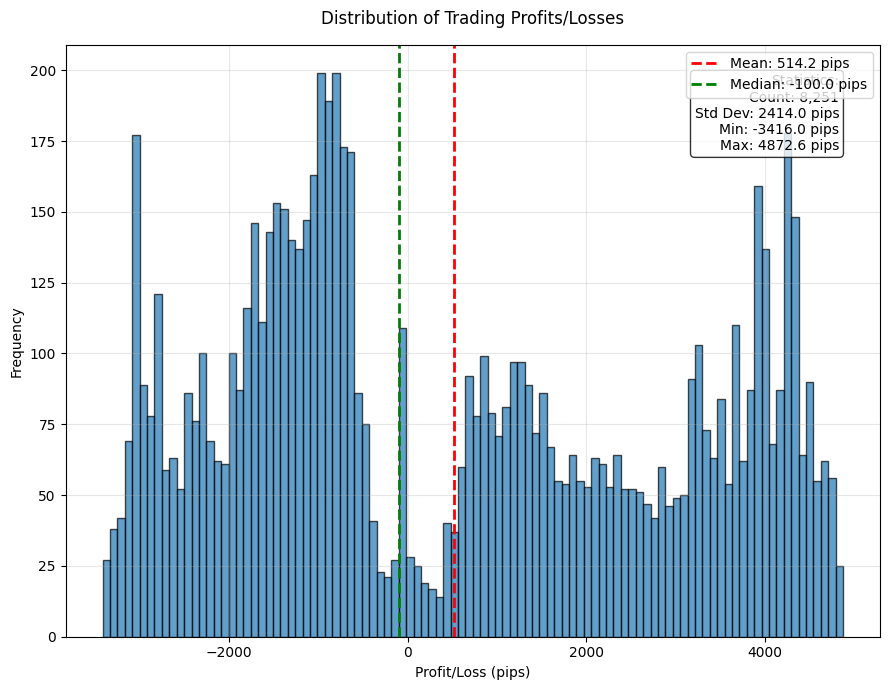

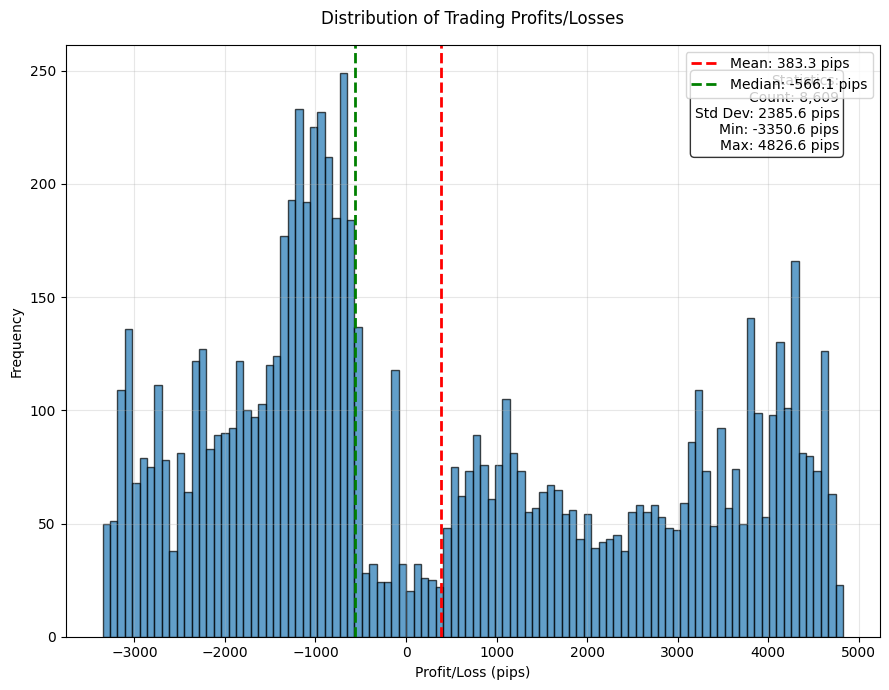

CV loop ends
{'profit_percent_val': 322.07, 'max_dd_val': -4.08, 'profit_percent_test': 163.42, 'max_dd_test': -8.4}
Final Parameters of the Model: {'stacked_model': 'XGB', 'stacked_models_params': {'tree_method': 'hist', 'device': 'cuda', 'objective': 'binary:logistic', 'max_depth': 7, 'learning_rate': 0.15, 'n_estimators': 30, 'nthread': -1, 'early_stopping_rounds': None, 'gamma': 7, 'min_child_weight': 13, 'subsample': 0.7, 'colsample_bytree': 0.8, 'reg_lambda': 2.0, 'reg_alpha': 0.1, 'scale_pos_weight': 3, 'random_state': 0}, 'stacked_model_n_top_features': 430, 'use_pca_stacked_model': True, 'pca_n_components': 3, 'bootstrap': True, 'n_estimators': 40, 'max_samples': 0.5, 'class_weight': 'balanced_subsample', 'n_jobs': 1, 'tree_method': 'hist', 'device': 'cuda', 'objective': 'binary:logistic', 'max_depth': 7, 'learning_rate': 0.15, 'xgb_n_estimators': 30, 'nthread': -1, 'early_stopping_rounds': None, 'min_child_weight': 12, 'subsample': 0.5, 'colsample_bytree': 0.8, 'reg_lambda': 

In [105]:
if MANUAL_EXP:
    exp_obj, exp_metadata, artifact_name, general_backtest_df = main(
        manual = True,
        man_params = man_params[model_type],
    )

In [106]:
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
import numpy as np

# For demonstration, we use FigureWidget to enable event callbacks
fig = go.FigureWidget()

def plot_candlestick_charts(
    fold_number: int,
    subset: str,
    general_backtest_df=general_backtest_df,
    target_symbol=man_params[model_type]['target_symbol'],
    trade_mode=man_params[model_type]['trade_mode'],
    path_stage_one="/kaggle/working/ML-Algotrading-Project/dataset/data/stage_one_data/",
):
    df = pd.read_parquet(f"{path_stage_one}/{target_symbol}_stage_one.parquet")
    test_date = exp_obj.folds[fold_number]['test_dates']
    valid_date = exp_obj.folds[fold_number]['valid_dates']

    df_bt_test = general_backtest_df[f'bt_df_fold{fold_number}_test_dates']
    df_bt_test = df_bt_test[df_bt_test['volume'] > 0]

    df_bt_valid = general_backtest_df[f'bt_df_fold{fold_number}_valid_dates']
    df_bt_valid = df_bt_valid[df_bt_valid['volume'] > 0]

    df_dict = {
        'test': {
            'bt_df': df_bt_test,
            'df': df[df['_time'].isin(test_date)],
        },
        'valid': {
            'bt_df': df_bt_valid,
            'df': df[df['_time'].isin(valid_date)],
        }
    }

    name = subset
    df_subset = df_dict[name]

    df_plot = df_subset['df']
    df_bt = df_subset['bt_df']

    # Clear any existing data/shapes
    fig.data = []
    fig.layout.shapes = []

    # Add the candlestick trace
    fig.add_trace(go.Candlestick(
        x=df_plot['_time'],
        open=df_plot['open'],
        high=df_plot['high'],
        low=df_plot['low'],
        close=df_plot['close'],
        name=name
    ))

    # Create a list to hold trade marker customdata
    # We will store stop_losses and take_profits so they can be used in the callback
    trade_customdata = []
    marker_x = []
    marker_y = []
    marker_colors = []
    marker_symbols = []
    hover_texts = []

    # Loop over each trade and prepare data for the trade markers
    for idx, trade in df_bt.iterrows():
        trade_date = trade['_time']
        net_profit = trade['net_profit']
        profits_n_losses = trade["profits_n_losses"]
        volume = trade['volume']
        volume_open_position = trade["volume_open_position"]
        balance = trade['balance']
        stop_losses = trade["stop_losses"]
        take_profits = trade["take_profits"]
        start_day_balances = trade["start_day_balances"]
        floating_balances = trade["floating_balances"]
        daily_dds = trade["daily_dds"]
        daily_dd_exp = trade["daily_dd_exp"]
        used_balances = trade["used_balances"]
        remaining_positions = trade["remaining_positions"]
        used_dd_budgets = trade["used_dd_budgets"]
        # confidence_levels = trade['confidence_levels']
        # label_position = trade['label_position']

        if trade_mode == 'long':
            trade_price = df_plot.loc[df_plot['_time'] == trade_date, 'close'].values[0]
            symbol = 'arrow-up'
        elif trade_mode == 'short':
            trade_price = df_plot.loc[df_plot['_time'] == trade_date, 'close'].values[0]
            symbol = 'arrow-down'

        # Build the hover text for the marker
        hovertext = (
            f"Volume: {volume}<br>Profit/Loss: {profits_n_losses}<br>"
            f"Current Balance: {floating_balances}<br>Balance After Trade: {balance}<br>"
            f"Open Volume: {volume_open_position}<br>Start Day Balance: {start_day_balances}<br>"
            f"Daily DD: {daily_dds}<br>Daily DD Exp: {daily_dd_exp}<br>"
            f"Used Balance: {used_balances}<br>Remaining Positions: {remaining_positions}<br>"
            f"Used DD Budget: {used_dd_budgets}<br>Stop Loss: {stop_losses}<br>Take Profit: {take_profits}"
        )

        marker_x.append(trade_date)
        marker_y.append(trade_price)
        marker_colors.append('green' if net_profit > 0 else 'red')
        marker_symbols.append(symbol)
        hover_texts.append(hovertext)
        # Save the stop loss and take profit as customdata for this marker
        trade_customdata.append([stop_losses, take_profits])

    # Add a Scatter trace for all trade markers
    # We use customdata to store SL and TP
    trade_scatter = go.Scatter(
        x=marker_x,
        y=marker_y,
        mode='markers',
        marker=dict(
            symbol=marker_symbols,
            size=15,
            color=marker_colors
        ),
        hovertext=hover_texts,
        hoverinfo="text",
        name='Trade',
        customdata=trade_customdata  # each element is [stop_loss, take_profit]
    )
    fig.add_trace(trade_scatter)

    fig.update_layout(
        title=f"{name}_Fold{fold_number} Candlestick Chart",
        xaxis_title="Time",
        yaxis_title="Price",
        xaxis_rangeslider_visible=False,
        height=600
    )

    # Define a callback for hover events on the trade markers
    def display_sl_tp(trace, points, state):
        # When hovering over a marker,
        # points.point_inds is the list of indices of points under the cursor
        if points.point_inds:
            ind = points.point_inds[0]
            sl, tp = trace.customdata[ind]
            # Create shapes for stop loss and take profit lines
            new_shapes = [
                dict(
                    type="line",
                    xref="paper",  x0=0, x1=1,
                    yref="y",      y0=sl, y1=sl,
                    line=dict(color="red", dash="dot"),
                    name="Stop Loss"
                ),
                dict(
                    type="line",
                    xref="paper",  x0=0, x1=1,
                    yref="y",      y0=tp, y1=tp,
                    line=dict(color="green", dash="dot"),
                    name="Take Profit"
                )
            ]
            # Update the figure layout to include these shapes
            fig.update_layout(shapes=new_shapes)
        else:
            # If not hovering over any marker, remove the shapes
            fig.update_layout(shapes=[])
    
    # Define a callback for unhover events to clear the shapes
    def clear_sl_tp(trace, points, state):
        fig.update_layout(shapes=[])

    # Attach the callbacks to the trade scatter trace
    trade_scatter.on_hover(display_sl_tp)
    trade_scatter.on_unhover(clear_sl_tp)

    fig.show()


In [108]:
plot_candlestick_charts(fold_number=19, subset='test')

In [39]:
imp_fe = list(exp_obj.feature_importance[exp_obj.feature_importance.cv<.5].feature_name)
exp_obj.feature_importance[exp_obj.feature_importance.cv<.5].feature_name

13                                          fe_time_hour
15                                 fe_time_isin_New_York
45              fe_leg_USDJPY_brsh_low_dist_M5_th_13_pct
44             fe_leg_USDJPY_brsh_high_dist_M5_th_13_pct
86                  fe_market_close_USDJPY_New_York_time
                             ...                        
305                          fe_WIN_argmin_USDJPY_W10_M5
14                                        fe_time_minute
301                           fe_WIN_argmin_USDJPY_W5_M5
325    fe_supertrend_USDJPY_trend_direction_tf15_w14_...
323    fe_supertrend_USDJPY_trend_direction_tf5_w14_m...
Name: feature_name, Length: 294, dtype: object

In [35]:
def plot_feature_importances_scatter(importance_df, top_n=10, figsize=(8, 6)):
    # Calculate mean importance and sort features
    mean_importance = importance_df['mean_importance']
    sorted_idx = mean_importance.argsort()[::-1]
    top_features = importance_df.iloc[sorted_idx[:top_n]]
    imp_cols = [f for f in importance_df if 'importance_fold' in f]
    # Prepare data for scatter plot
    feature_names = top_features['feature_name']
    importance_values = top_features[imp_cols].values.T  # Transpose for plotting

    # Calculate median importance
    median_importance = top_features['median_importance']

    # Create scatter plot
    fig, ax = plt.subplots(figsize=figsize)
    
    for i, feature in enumerate(feature_names):
        ax.scatter([i] * importance_values.shape[0], importance_values[:, i], 
                   alpha=0.6, label=feature)

    # Plot median line
    ax.plot(range(top_n), median_importance, color='red', linestyle='--', 
            linewidth=2, label='Median')
    
    # Add value labels on the median line
    for i, v in enumerate(median_importance):
        ax.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

    ax.set_xlabel('Features', fontsize=12)
    ax.set_ylabel('Feature Importance', fontsize=12)
    ax.set_title(f'Top {top_n} Feature Importances Across Folds with Median', fontsize=14)
    ax.set_xticks(range(top_n))
    ax.set_xticklabels(feature_names, rotation=45, ha='right')
#     ax.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

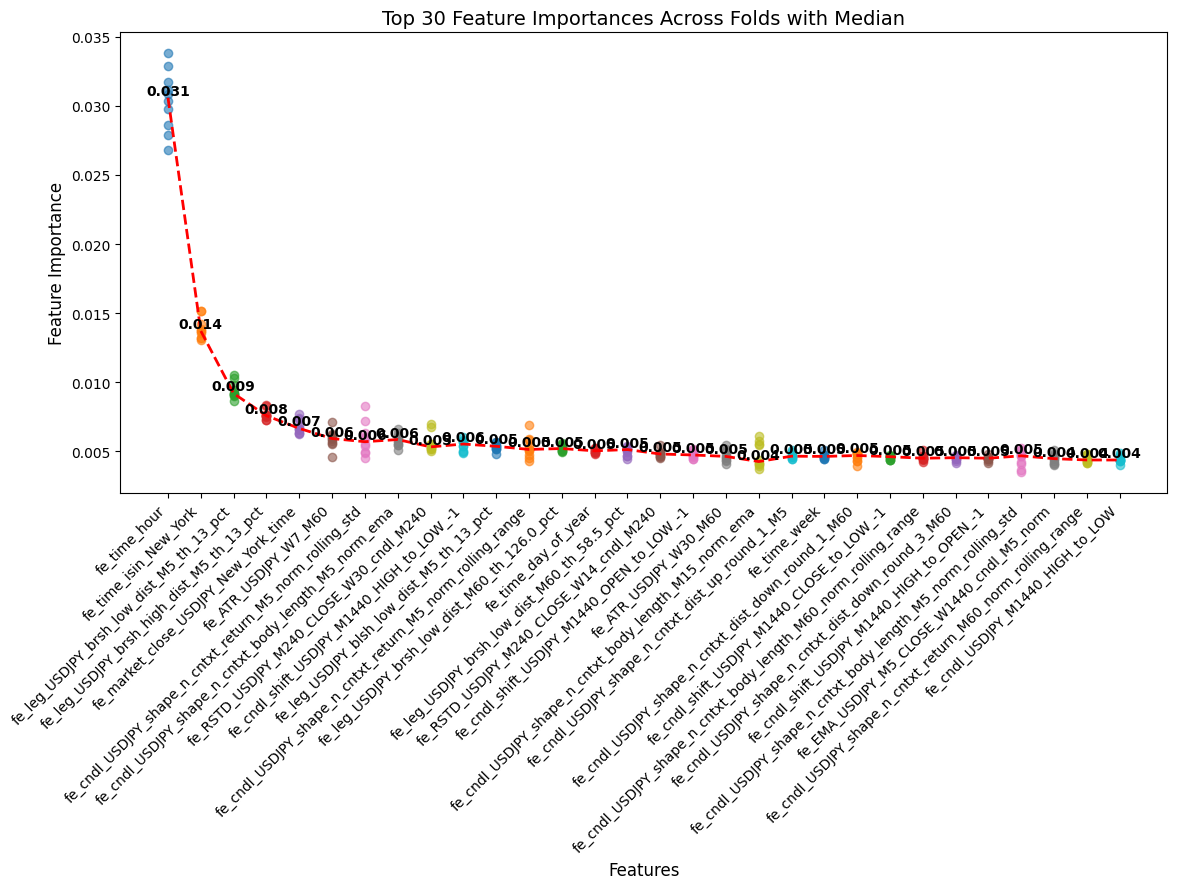

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_feature_importances_scatter(exp_obj.feature_importance, top_n=30, figsize=(12, 9))

### Save manual object on W&B as Artifact

In [ ]:
if MANUAL_EXP:
    wandb.init(entity = 'alpha-hunters', project = 'algotrading-project')
    obj_artifact = wandb.Artifact(artifact_name, 'manual_experiment', metadata = exp_metadata)
    obj_artifact.add_file(local_path=exp_obj.store_name+'.zip', name=exp_obj.store_name+'.zip')
    wandb.log_artifact(obj_artifact)

In [ ]:
if MANUAL_EXP:
    wandb.finish()

## Save imp_features (when we have RANDOM features)

In [ ]:
if MANUAL_EXP:
    upload_imp_features = True
    symbol = man_params[model_type]['target_symbol']
    trade_mode = man_params[model_type]['trade_mode']
    look_ahead = man_params[model_type]['trg_look_ahead']
    take_profit = man_params[model_type]['trg_take_profit']
    stop_loss = man_params[model_type]['trg_stop_loss']

In [ ]:
if MANUAL_EXP and upload_imp_features :
    print('save_imp_features ')
    import pickle as pkl
    the_name = f"df_feature_imp_{trade_mode}_{symbol}_M{look_ahead}_TP{take_profit}_SL{stop_loss}.pkl"
    file = open(the_name, 'wb')
    pkl.dump(exp_obj.feature_importance,file)
    file.close()
    
    imp_artifact_name = artifact_name + '_imp_features'
    wandb.init(entity = 'alpha-hunters', project = 'algotrading-project', job_type="feature_selection")
    imp_artifact = wandb.Artifact(imp_artifact_name, 'feature_selection', metadata = exp_metadata)
    imp_artifact.add_file(local_path = the_name,name = the_name)
    print(f"--> dataset size MB: {imp_artifact.size / 1000000}")
    wandb.log_artifact(imp_artifact)
    wandb.finish()

# 2. Sweep Experiment using W&B

In [ ]:
#? https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook
sweep_configs = {}
sweep_configs['RF'] = {
    "method": "grid",
#     "metric": {"name": "class 1 f0.03_score_train", "goal": "maximize"},
#     'description':description,
    "parameters": {
        'model_name' : {"values": ['RF']},
        
        'target_symbol' : {"values": ['EURUSD']},
        'trade_mode' : {"values": ['long']},
        "trg_look_ahead": {"values": [120]},
        "trg_take_profit": {"values": [12]},
        "trg_stop_loss": {"values": [5]},
        
        "strg_look_ahead": {"values": [120]},
        "strg_take_profit": {"values": [12]},
        "strg_stop_loss": {"values": [5]},
        
        'save_model_mode' : {"values": ['last_train_size']}, # None, 'sample_train_size', 'last_train_size', 'all_data',
        'imp_features' : {"values": [None]},  #  can be set to imp_features or None
        'n_rand_features': {"values": [None]},
        "early_stopping_rounds" :{"values": [None]},
        "n_splits" : {"values": [17]},
        "max_train_size": {"values": [500*288]},
        'test_size' : {"values": [30*288]},
        'train_test_gap' : {"values": [0]},

        
        'n_estimators' : {"values": [200]},
        'max_depth': {"values": [5,12]},
        'max_features' : {"values": [30, 50,80]},
        'max_samples' : {"values": [0.2,0.3,0.4]},
        'class_weight':{'values':[0.13,0.15, 0.18, 0.23]},
        'n_jobs': {"values": [-1]},
        'random_state' : {"values": [42]},
                       
#         "objective": {"values": ["binary:logistic"]},
        
#         "max_depth": {"values": [2, 5, 8, 15, 20, 30]},
#         "learning_rate": {"distribution": "uniform", "min": 0.005, "max": 0.01},
#         "n_estimators": {"distribution": "int_uniform", "min": 50, "max": 300},
#         "min_child_weight": {"distribution": "uniform", "min": 0, "max": 1}, # Used to control over-fitting.
#         "subsample": {"distribution": "uniform", "min": 0.3, "max": 0.5 } ,#Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.

        
#         "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
#         "early_stopping_rounds" :{"values": [40,200]},
#         "gamma": {"distribution": "uniform", "min": 0, "max": 15}, #? float
#         "max_delta_step": {"distribution": "uniform", "min": 0, "max": 15}, #?float
#         "colsample_bytree": {"distribution": "uniform", "min": 0.5, "max": 0.75}, 
#         "reg_lambda": {"distribution": "uniform", "min": 0, "max": 10},
#         "reg_alpha": {"distribution": "uniform", "min": 0, "max": 10},   
#         "train_data_precent": {"distribution": "uniform", "min": 0, "max": 0.98},
#         "train_data_precent": {"distribution": "uniform", "min": 0.5, "max": 0.95},
    },
}

In [ ]:
sweep_configs['XGB'] = {
    "method": "grid",
    
    "parameters": {
        'model_name' : {"values": ['XGB']},
        
        'target_symbol' : {"values": ['EURUSD']}, # ["EURUSD","USDCAD","USDJPY","EURJPY","GBPUSD","XAUUSD"]
        'trade_mode' : {"values": ['long']}, # "long", "short"
        "trg_look_ahead": {"values": [300]},
        "trg_take_profit": {"values": [35]},
        "trg_stop_loss": {"values": [5]},
        
        "strg_look_ahead": {"values": [480]},
        "strg_take_profit": {"values": [40]},
        "strg_stop_loss": {"values": [15]},
                
        'n_rand_features': {"values": [None]}, # None or Number
        'save_model_mode' : {"values": [None]}, # None, 'sample_train_size', 'last_train_size', 'all_data',

        "early_stopping_rounds" :{"values": [None]}, #None or Number
        'n_splits' : {"values":[3]},
        'max_train_size' : {"values":[400*288,300*288]},
        'test_size' : {"values":[30*288]},
        'train_test_gap' : {"values": [0]},
        
        "objective": {"values": ["binary:logistic"]},
        "max_depth": {"values": [4,5]},
        "learning_rate": {"values": [0.1,0.01,0.05]},
        'tree_method': {"values": [None]}, #'hist', None
        'device' : {"values": ["cpu"]}, # 'cuda', None
#         "learning_rate": {"distribution": "log_uniform", "min": 1e-5, "max": 5e-1},
        "n_estimators": {"values": [100]},
#         "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
#         "early_stopping_rounds" :{"values": [40,200]},
#         "gamma": {"distribution": "uniform", "min": 0, "max": 15}, #? float
        "min_child_weight": {"values": [1]}, # Used to control over-fitting.
#         "max_delta_step": {"distribution": "uniform", "min": 0, "max": 15}, #?float
        "subsample": {"values": [0.3,0.5,0.8]},#Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.
        "colsample_bytree": {"values": [0.5,0.8]},
        "reg_lambda": {"values": [0,0.02,0.1]},
#         "reg_alpha": {"distribution": "uniform", "min": 0, "max": 10},
        "scale_pos_weight" : {"values": [1]},#[1,0.95,1.1]
        'random_state': {"values":[42]},
        },
}

In [ ]:
%%time

sweep_id = wandb.sweep(
    sweep_configs[model_type],
    entity = 'alpha-hunters',
    project = 'algotrading-project'
)

#!!!!!!!!!!!! SWEEP ID !!!!!!!!!!!!!!!!!
wandb.agent(sweep_id = sweep_id, function = main, entity = 'alpha-hunters',project = 'algotrading-project')
wandb.finish()

In [ ]:
# Import necessary libraries
import wandb

# The sweep ID should be the same as the one you started with
# Resume the sweep
wandb.agent(sweep_id=sweep_id, function=main, entity='alpha-hunters', project='algotrading-project')

# Finish the sweep
wandb.finish()

In [ ]:
#STOP SWEEP
if not MANUAL_EXP:
    print('Finishing The SWEEP ...')
    print(f'{1/0}')

# Filter models from W&B

In [ ]:
runs_filter = {'path' : "alpha-hunters/algotrading-project",# /artifacts/experiment/trg_clf_long_EURUSD_M240_TP25_SL10
               "order": "+summary_metrics.profit_percent_test",
    'filters': {"$and": [  
#                         {"state":'finished'},
                        {"createdAt":{ '$gte': '2024-06-01' }},
                        {"sweep":'jmw8zpy9'},
        
                        ########### GENERAL CONFIG #############
                        {"config.target_symbol":'EURUSD'}, 
                        {"config.trade_mode": 'long'},
#                         {"config.look_ahead": 480},
#                         {"config.strg_take_profit": 40},
#                         {"config.strg_stop_loss": 15},
                        {"config.model_name":'XGB'},
#                         ########### MODEL CONFIG #############
#                         {"config.max_depth": 3 },
#                         {"config.n_estimators": { "$gte": 100 } },
#                         {"config.learning_rate": { "$lt": 1 }},
#                         {"config.random_state": 42 },
                        
                        ########### MODEL METRICS #############
                        {"summary_metrics.profit_percent_test" : { "$gte": 10}},
                        {"summary_metrics.profit_percent_val" : { "$gte": 10}},
                        
                        {"summary_metrics.profit_percent_median_test" : { "$gte": 5}},
                        {"summary_metrics.profit_percent_median_valid" : { "$gte": 5}},
        
                        {"summary_metrics.max_dd_min_test" : { "$gte":-40}},
                        {"summary_metrics.max_dd_min_valid" : { "$gte":-40}},

                        {"summary_metrics.max_dd_test" : { "$gte":-40}},
                        {"summary_metrics.max_dd_val" : { "$gte":-40}},

        

                                ]
            }
}
runs=api.runs(**runs_filter)
print(len(runs))

In [ ]:
# wandb.finish()

In [ ]:
import shutil
import os
if os.path.isdir("/kaggle/working/artifacts"):
    shutil.rmtree("/kaggle/working/artifacts")
meta_datas=fetch_artifacts(runs_filter)

In [ ]:
objects = read_tracker_objects("/kaggle/working/artifacts")

In [ ]:
# objects['XGB_long_USDJPY_M300_TP35_SL5_prof531.41_max_dd-56.54_median_sig9.00_date2024-07-08_21:24']['obj'].evals

## Selected Models' Config

In [ ]:
import pandas as pd
for i,k in enumerate(objects):
    if i == 0:
        df_config = pd.DataFrame(objects[k]['obj'].config, index = [0])
#         display(df_config)
    else:
        df_config = pd.concat([df_config,pd.DataFrame(objects[k]['obj'].config, index = [0])])
# df_config[['colsample_bytree',
#        'learning_rate', 'trg_look_ahead', 'max_depth', 'max_train_size',
#        'min_child_weight', 'model_name', 'n_estimators', 'save_model_mode', 'scale_pos_weight',
#        'subsample', 'trg_take_profit', 'target_symbol', 'tree_method']]
df_config

## Feature Importance

In [ ]:
for i,k in enumerate(objects):
    if i == 0:
        df_imp = objects[k]['obj'].feature_importance
        df_imp.rename(columns = {'importances': f'importances_{i}'}, inplace =True)
    else:
        
        df_imp = df_imp.merge(objects[k]['obj'].feature_importance.rename(columns = {'importances': f'importances_{i}'}),
                             on = 'feature_name')
imp_cols = [f for f in df_imp.columns if 'importances_' in f]
df_imp['imp_mean'] =df_imp[imp_cols].mean(axis = 1)
df_imp.sort_values('imp_mean', ascending = False)[:30]

## Models' Correlation

In [ ]:
import pandas as pd
def cal_corr_tar1_predictions(objects):
    '''Calculate corrilation between models Just for target==1'''
    corr_ls=[]
    for i,n in enumerate(objects):

        val_predictions = objects[n]['obj'].val_predictions
        val_predictions=val_predictions[val_predictions.target==1][['pred_as_val','target']].replace(0, -1)
        corr_ls.append((n,val_predictions))
    print("Total_model_count:", len(corr_ls))
        
    from sklearn.metrics import matthews_corrcoef
    corr_dict={}
    for i in range(0,len(corr_ls)):
        for j in range(i+1,len(corr_ls)):
            corr_dict[(corr_ls[i][0],corr_ls[j][0])]=matthews_corrcoef(corr_ls[i][1]['pred_as_val'], corr_ls[j][1]['pred_as_val'])
        
        
    corr_df=pd.DataFrame([k + (v,) for k, v in corr_dict.items()], columns=['model1', 'model2', 'M_corr'])
    print('combination checked:', corr_df.shape[0])
    corr_df.hist('M_corr')
    return corr_df

corr_df=cal_corr_tar1_predictions(objects)

In [ ]:
# corr_df[corr_df.M_corr<0.7]
corr_df